In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.2.3
seaborn version :  0.11.1


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_excel('churn rate.xlsx')
df.head()

Penerima  order     omzet  item  ongkir   diskon  diskon(%)  \
0            Nia Insyirah       1    115000     6    8500    11500         10   
1       Ratih Yusi Pratiwi      1    109500     6   73500    21900         20   
2                        [     37  53004500  2946  651240  6552150         12   
3                  99 Cell      1    175000    10   16000    17500         10   
4  A. Fidal Delima Dahyati      2    244000    11   66600    42000         17   

   omzet/order  omzet/bulan      jenjang  ...               smo promo  \
0       115000         9583  smart buyer  ...     Rini Rosmiati     0   
1       109500         9125  smart buyer  ...  MUKHIMATUL UMROH     0   
2      1432554      4417042       expert  ...   Adil Rifki Auli     1   
3       175000        14583  smart buyer  ...       Wulan Ratna     1   
4       122000        20333  smart buyer  ...       Wulan Ratna     0   

   numer_of_promo  gender usia  tenure         pekerjaan pendidikan   status  \
0               0  female   28      16  ibu rumah tangga        sma  menikah   
1               0  female   42      16  ibu rumah tangga        sma  menikah   
2               6    male   30      18         wirausaha         s1  menikah   
3               1  female   35      17         wirausaha        sma  menikah   
4               0  female   46       9  ibu rumah tangga        smp  menikah   

  churn  
0   yes  
1   yes  
2   yes  
3   yes  
4   yes  

[5 rows x 21 columns]

Dataset ini adalah dataset dari transaksi selama tahun 2020
Penjelasan feature
- Penerima : nama customer
- order : jumlah order
- omzet : total omzet selama 2020
- item : jumlah item yang dibeli oleh customer
- ongkir : jumlah biaya (ongkos) kirim yang dikenakan kepada customer
- diskon : jumlah diskon yang diperoleh customer selama 2020
- diskon(%) : rata-rata diskon dalam persentase (%) selama tahun 2020
- omzet/order : jumlah omzet dibagi jumlah order
- omzet/bulan : jumlah omzet dibagi 12 bulan
- jejang : jenjang masing-masing customer (segmentasi)
- kota : kota dari setiap customer
- smo : tim yang melakukan maintanance kepada customer
- promo : apakah customer tersebut pernah ikut promo atau tidak
- number_of_promo : jumlah promo yang di claim selama 2020
- gender : jenis kelamin
- usia : umur customer
- tenure : lama bergabung sejak pertama kali transaksi sampai saat ini
- pekerjaan : pekerjaan dari customer
- pendidikan : pendidikan terakhir dari customer
- status : status pernikahan dari customer
- churn : apakah customer churn atau tidak

# Exploratory Data Analysis

## Descriptive Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Penerima        4505 non-null   object
 1   order           4505 non-null   int64 
 2   omzet           4505 non-null   int64 
 3   item            4505 non-null   int64 
 4   ongkir          4505 non-null   int64 
 5   diskon          4505 non-null   int64 
 6   diskon(%)       4505 non-null   int64 
 7   omzet/order     4505 non-null   int64 
 8   omzet/bulan     4505 non-null   int64 
 9   jenjang         4505 non-null   object
 10  kota            4505 non-null   object
 11  smo             1708 non-null   object
 12  promo           4505 non-null   int64 
 13  numer_of_promo  4505 non-null   int64 
 14  gender          4505 non-null   object
 15  usia            4505 non-null   int64 
 16  tenure          4505 non-null   int64 
 17  pekerjaan       4505 non-null   object
 18  pendidik

Pada dataset kali ini akan membuat prediksi customer churn pada CV Kunikita. CV Kunikita adalah sebuah perusahaan pada industri makanan yang menjual produknya dengan sistem reseller. Dataset ini adalah dataset customer/reseller Kunikita yang berbelanja selama tahun 2020

Dapat dilihat dataset ini memiliki 24 kolom yang terdiri dari 20 kolom feature sedangkan 1 lainnya adalah kolom target yaitu kolom `churn`

Deskripsi menggunakan fungsi `info()` untuk mengetahui kondisi dari dataset (tipe data, adanya nilai null, hingga jumlah baris)
- Terdapat 4505 rows
- Terdapat nilai null pada kolom `smo`

### Null Values

In [ ]:
df.isnull().sum()

Penerima             0
order                0
omzet                0
item                 0
ongkir               0
diskon               0
diskon(%)            0
omzet/order          0
omzet/bulan          0
jenjang              0
kota                 0
smo               2797
promo                0
numer_of_promo       0
gender               0
usia                 0
tenure               0
pekerjaan            0
pendidikan           0
status               0
churn                0
dtype: int64

Dari check Null Value dapat dilihat bahwa
- Kolom smo memiliki null value yang cukup banyak dan akan drop pada saat data preprocessing

## Variabel Numeric

In [ ]:
df.describe()

order         omzet          item        ongkir        diskon  \
count  4505.000000  4.505000e+03   4505.000000  4.505000e+03  4.505000e+03   
mean      3.400000  1.544657e+06     84.049723  1.462496e+05  2.708219e+05   
std      10.097517  1.102771e+07    609.633382  6.919203e+05  1.837922e+06   
min       1.000000  1.100000e+04      1.000000  0.000000e+00  0.000000e+00   
25%       1.000000  1.110000e+05      6.000000  1.800000e+04  1.730000e+04   
50%       1.000000  3.115000e+05     16.000000  3.645000e+04  4.500000e+04   
75%       2.000000  7.455000e+05     40.000000  8.595000e+04  1.162560e+05   
max     372.000000  4.860475e+08  28124.000000  2.518200e+07  8.691392e+07   

         diskon(%)   omzet/order   omzet/bulan        promo  numer_of_promo  \
count  4505.000000  4.505000e+03  4.505000e+03  4505.000000     4505.000000   
mean     16.687014  3.213624e+05  1.287214e+05     0.490788        0.729412   
std      19.626840  8.257510e+05  9.189761e+05     0.499971        1.007868   
min       0.000000  1.100000e+04  9.170000e+02     0.000000        0.000000   
25%      10.000000  1.075000e+05  9.250000e+03     0.000000        0.000000   
50%      15.000000  1.884000e+05  2.595800e+04     0.000000        0.000000   
75%      18.000000  3.457500e+05  6.212500e+04     1.000000        1.000000   
max     791.000000  4.676875e+07  4.050396e+07     1.000000        6.000000   

              usia       tenure  
count  4505.000000  4505.000000  
mean     34.595339    13.127858  
std       7.496318     3.379371  
min      22.000000     7.000000  
25%      28.000000    10.000000  
50%      35.000000    14.000000  
75%      41.000000    16.000000  
max      47.000000    18.000000

Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
- Pada feature numeric memiliki nilai outlier dilihat dari nilai mean dan median yang memiliki jarak cukup jauh terhadap nilai maxkecuali pada feature `tenure` dan `usia`
- Distribusi pada feature `order`, `omzet`, `item`, `ongkir`, `diskon`, `diskon(%)`, `omzet/order`,`omzet/bulan` memiliki distribusi positive skewed dilihat dari mean dan median yang memiliki jarak cukup jauh

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [ ]:
cats = ['Penerima','jenjang','kota','smo','gender','pekerjaan','pendidikan','status','churn']
nums = ['order','omzet','item','ongkir','diskon','diskon(%)','omzet/order','omzet/bulan','promo','numer_of_promo','usia','tenure']

In [ ]:
df[cats].describe()

Penerima      jenjang             kota   smo  gender  \
count                 4505         4505             4505  1708    4505   
unique                4504            4              296    30       2   
top     Ratih Yusi Pratiwi  smart buyer  Kabupaten Bogor   ANI  female   
freq                     2         4271              227   290    4219   

               pekerjaan pendidikan   status churn  
count               4505       4505     4505  4505  
unique                 4          4        2     2  
top     ibu rumah tangga        sma  menikah   yes  
freq                3516       1965     3991  4137

Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Penerima adalah nama customer perlu mengganti nama kolom menjadi customer
* Feature jenjang memiliki 4 nilai unique dengan smart buyer memiliki frequensi terbanyak yaitu 4271
* Feature kota dengan Kota Kabupaten Bogor menjadi kota dengan customer terbanyak yaitu sebanayk 227 customer
* Kolom smo memiliki 30 nilai unique dengan ANI menjadi smo dengan maintanance customer terbanyak yaitu sebanyak 290
* Kolom gender didominasi oleh wanita dengan jumlah 4219
* Kolom pekerjaan didominasi oleh ibu rumah tangga dengan jumalh 3516 customer
* Kolom pendidikan didominasi oleh customer dengan pendidikan s1 sebanyak 1578
* Kolom status didominasi dengan customer yang sudah menikah sebanyak 3991 customer

## Value Counting

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Penerima:
Ratih Yusi Pratiwi    2
Dede Suhartini        1
Nurul Arisyah         1
Ai Nurhaeni           1
Bunda Faiz            1
                     ..
Herawati              1
Sukkma Dwi            1
Suci Wahyuningsih     1
Frisiska Dwiyanti     1
Lia Ruliati           1
Name: Penerima, Length: 4504, dtype: int64

Value count kolom jenjang:
smart buyer    4271
newbe           208
expert           16
berprestasi      10
Name: jenjang, dtype: int64

Value count kolom kota:
Kabupaten Bogor                      227
Kabupaten Bekasi                     215
Kota Bekasi                          199
Kota Jakarta Timur                   155
Kota Jakarta Selatan                 137
                                    ... 
Kabupaten Kepahiang                    1
Kabupaten Bombana                      1
Kabupaten Lombok Tengah                1
Kabupaten Bolaang Mongondow Timur      1
Kota Singkawang                        1
Name: kota, Length: 296, dtype: int64

Value count ko

## Univariate Analysis

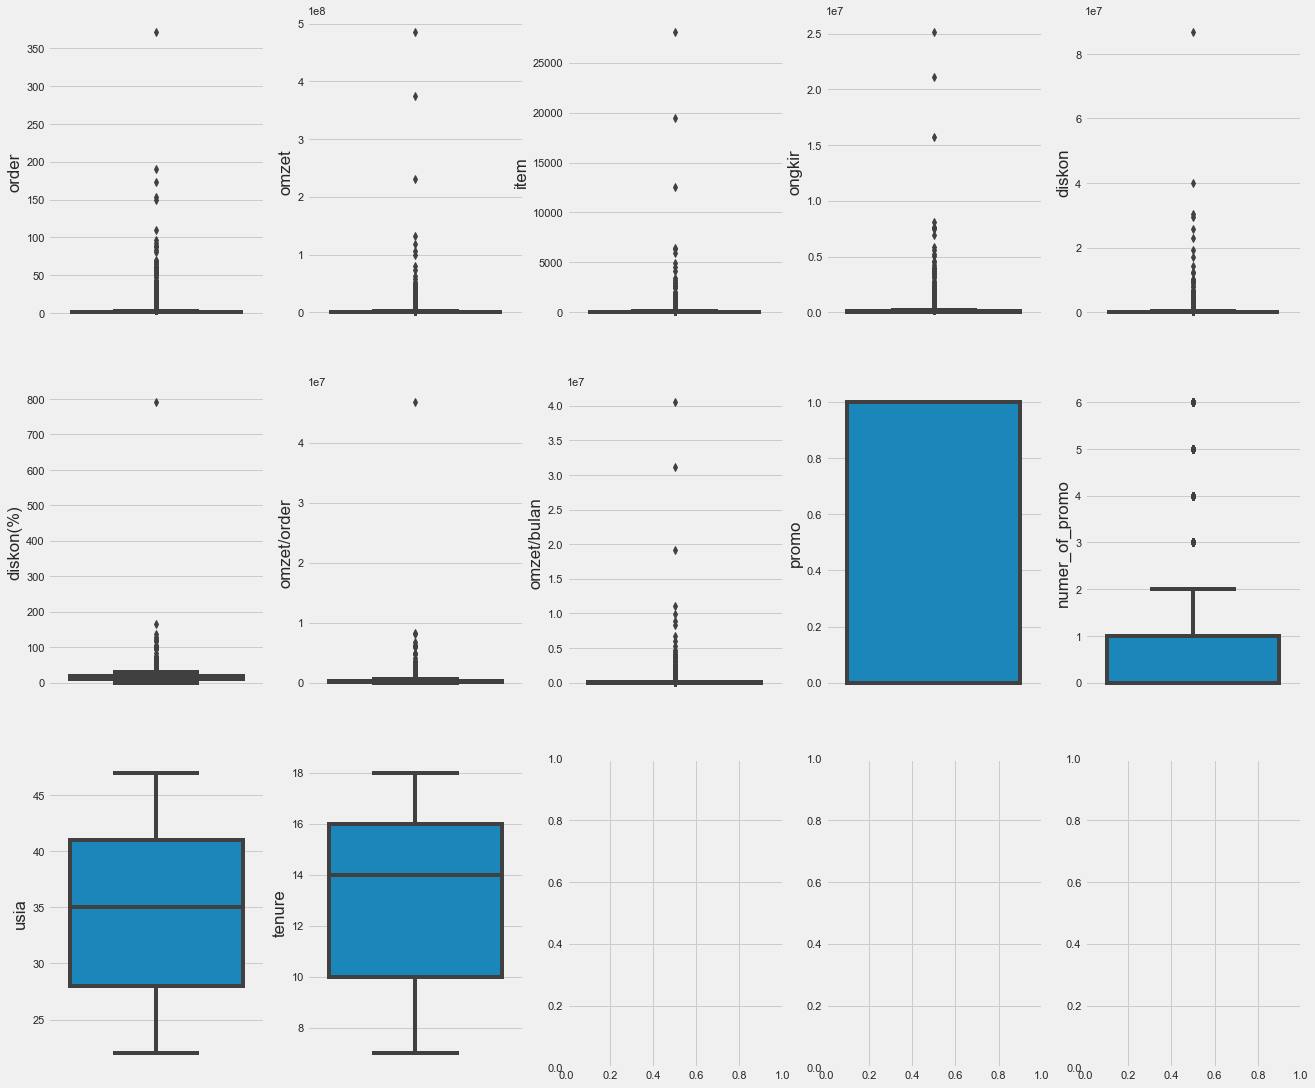

In [ ]:
#using boxplot
features = df.select_dtypes(["float64", "int64", "boolean"]).columns

fig, ax = plt.subplots(3, 5, figsize=(20, 18))
rows    = [0]*5 + [1]*5 + [2]*5
cols    = [0, 1, 2, 3, 4] * 3
for row, col, feature in zip(rows, cols, features):
    sns.boxplot(y=feature, data=df[features], ax=ax[row, col])

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `order`,`omzet`,`item`,`ongkir`,`diskon`,`diskon(%)`,`omzet/order`,`omzet/bulan` dan `number_of_promo`
* Kolom yang memiliki outlier akan memiliki distribusi yang skewed

## Displot

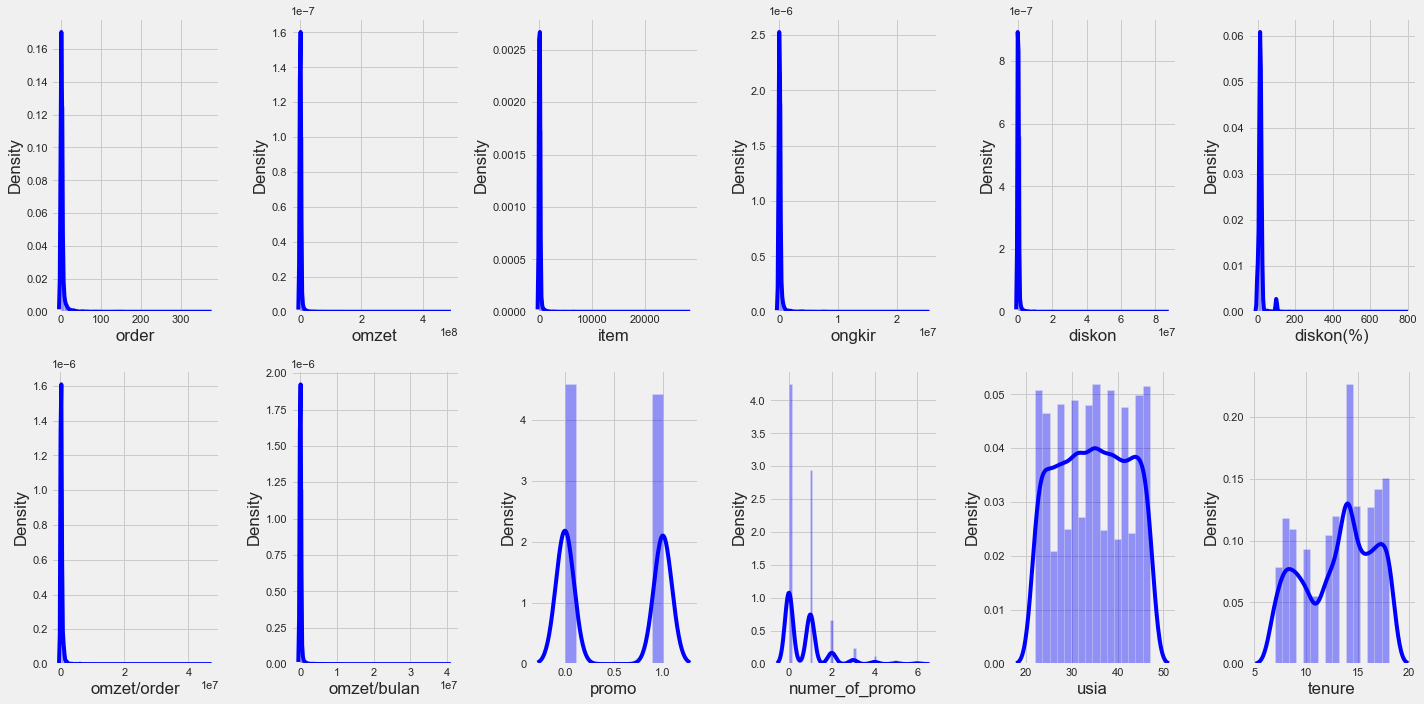

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `order`,`omzet`,`item`,`ongkir`,`diskon`,`diskon(%)`,`omzet/order`,`omzet/bulan` dan `number_of_promo` *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja

## Bivariate Analysis

In [ ]:
churn_mapping = {"yes": 1,"no": 0 }
df['churn']  = df['churn'].map(churn_mapping)

df.head()

Penerima  order     omzet  item  ongkir   diskon  diskon(%)  \
0            Nia Insyirah       1    115000     6    8500    11500         10   
1       Ratih Yusi Pratiwi      1    109500     6   73500    21900         20   
2                        [     37  53004500  2946  651240  6552150         12   
3                  99 Cell      1    175000    10   16000    17500         10   
4  A. Fidal Delima Dahyati      2    244000    11   66600    42000         17   

   omzet/order  omzet/bulan      jenjang  ...               smo promo  \
0       115000         9583  smart buyer  ...     Rini Rosmiati     0   
1       109500         9125  smart buyer  ...  MUKHIMATUL UMROH     0   
2      1432554      4417042       expert  ...   Adil Rifki Auli     1   
3       175000        14583  smart buyer  ...       Wulan Ratna     1   
4       122000        20333  smart buyer  ...       Wulan Ratna     0   

   numer_of_promo  gender usia  tenure         pekerjaan pendidikan   status  \
0               0  female   28      16  ibu rumah tangga        sma  menikah   
1               0  female   42      16  ibu rumah tangga        sma  menikah   
2               6    male   30      18         wirausaha         s1  menikah   
3               1  female   35      17         wirausaha        sma  menikah   
4               0  female   46       9  ibu rumah tangga        smp  menikah   

  churn  
0     1  
1     1  
2     1  
3     1  
4     1  

[5 rows x 21 columns]

<AxesSubplot:>

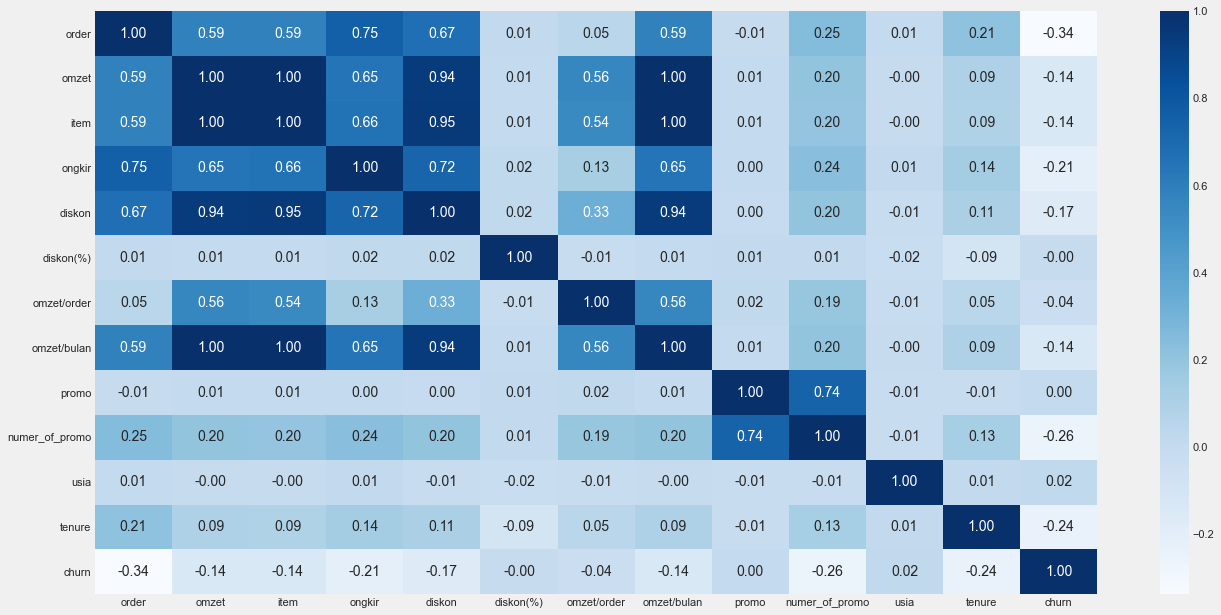

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Kolom `omzet`,`item`,`ongkir`,`diskon`,`omzet/bulan` dan `omzet/order` memiliki korelasi yang cukup kuat
* Kolom `promo` dan `number_of_promo` memiliki korelasi positif yang kuat
* Ada kemungkinan kolom dengan korelasi kuat akan redundan sehingga akan dipilih 1 kolom saja dan sisanya akan di drop

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan
* Namun masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan

In [ ]:
no = []

for index, kolom in df.iterrows():
    no_urut = index+1
    no.append(no_urut)

df['no'] = no

df.head()

Penerima  order     omzet  item  ongkir   diskon  diskon(%)  \
0            Nia Insyirah       1    115000     6    8500    11500         10   
1       Ratih Yusi Pratiwi      1    109500     6   73500    21900         20   
2                        [     37  53004500  2946  651240  6552150         12   
3                  99 Cell      1    175000    10   16000    17500         10   
4  A. Fidal Delima Dahyati      2    244000    11   66600    42000         17   

   omzet/order  omzet/bulan      jenjang  ... promo numer_of_promo  gender  \
0       115000         9583  smart buyer  ...     0              0  female   
1       109500         9125  smart buyer  ...     0              0  female   
2      1432554      4417042       expert  ...     1              6    male   
3       175000        14583  smart buyer  ...     1              1  female   
4       122000        20333  smart buyer  ...     0              0  female   

   usia tenure         pekerjaan  pendidikan   status churn no  
0    28     16  ibu rumah tangga         sma  menikah   yes  1  
1    42     16  ibu rumah tangga         sma  menikah   yes  2  
2    30     18         wirausaha          s1  menikah   yes  3  
3    35     17         wirausaha         sma  menikah   yes  4  
4    46      9  ibu rumah tangga         smp  menikah   yes  5  

[5 rows x 22 columns]

# Explore Feature Terhadap Target

In [ ]:
churn = df.groupby(['churn'])['no'].count().reset_index()
churn['total'] = churn['no'].sum()
churn['percentage'] = churn['no']/churn['total']*100
churn

churn    no  total  percentage
0      0   368   4505    8.168701
1      1  4137   4505   91.831299

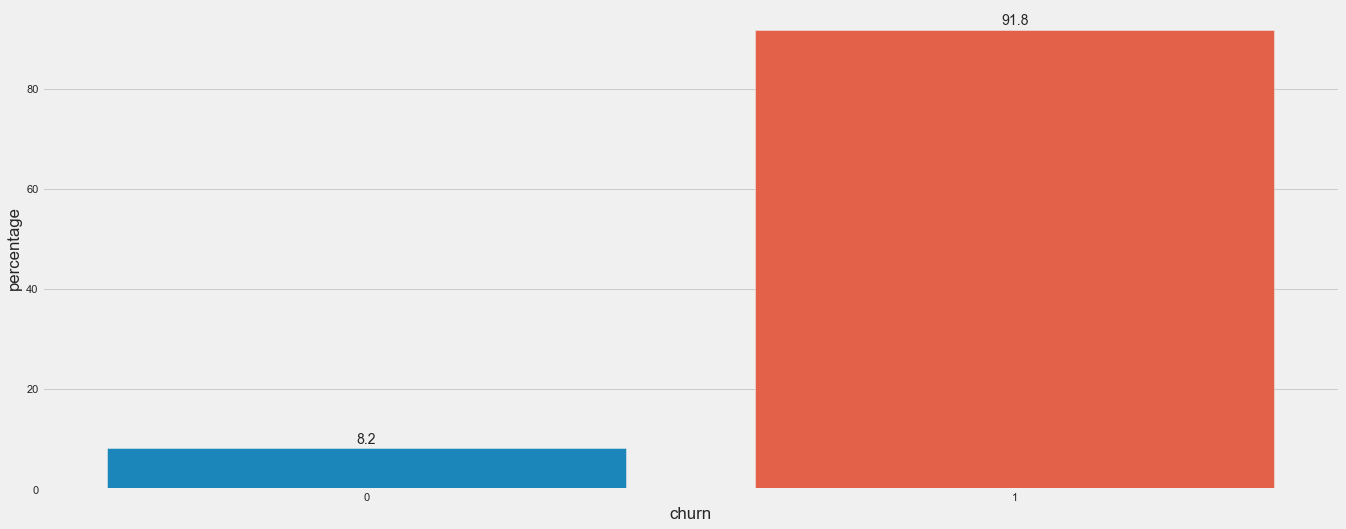

In [ ]:
splot = sns.barplot(x='churn',y='percentage',data=churn)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Pada data target dapat disimpulkan bahwa Kunikita memiliki tingkat churn yang tinggi dimana 91.8% customer yang belanja tidak kembali lagi

### Gender terhadap Churn

In [ ]:
gender = df.groupby(['gender','churn'])['no'].count().reset_index()
gender['total'] = gender.groupby(['gender'])['no'].transform('sum')
gender.columns = ['gender','churn','jumlah','total']
gender['percentage'] = gender['jumlah']/gender['total']*100
gender

gender  churn  jumlah  total  percentage
0  female      0     355   4219    8.414316
1  female      1    3864   4219   91.585684
2    male      0      13    286    4.545455
3    male      1     273    286   95.454545

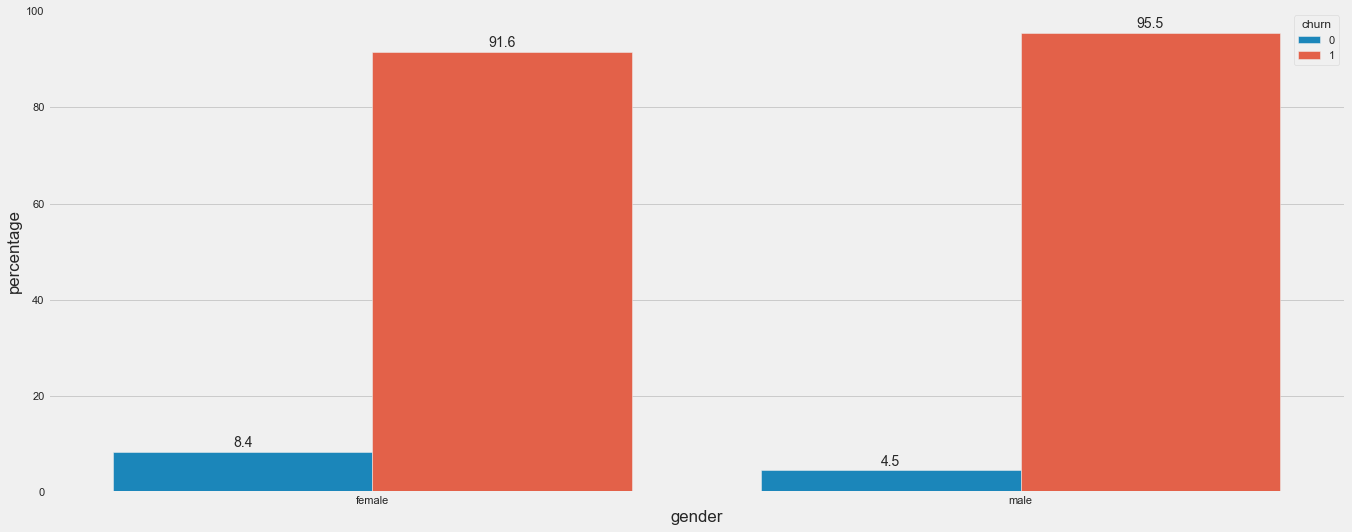

In [ ]:
splot = sns.barplot(x='gender',y='percentage',hue='churn',data=gender)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Dari grafik gender tidak memiliki perbedaan yang signifikan dimana baik laki-laki maupun perempuan memiliki tingkat churn yang tinggi

### Pekerjaan

In [ ]:
job = df.groupby(['pekerjaan','churn'])['no'].count().reset_index()
job['total'] = job.groupby(['pekerjaan'])['no'].transform('sum')
job.columns = ['pekerjaan','churn','jumlah','total']
job['percentage'] = job['jumlah']/job['total']*100
job

pekerjaan  churn  jumlah  total  percentage
0               PNS      0      13    174    7.471264
1               PNS      1     161    174   92.528736
2  ibu rumah tangga      0     293   3516    8.333333
3  ibu rumah tangga      1    3223   3516   91.666667
4          karyawan      0      20    263    7.604563
5          karyawan      1     243    263   92.395437
6         wirausaha      0      42    552    7.608696
7         wirausaha      1     510    552   92.391304

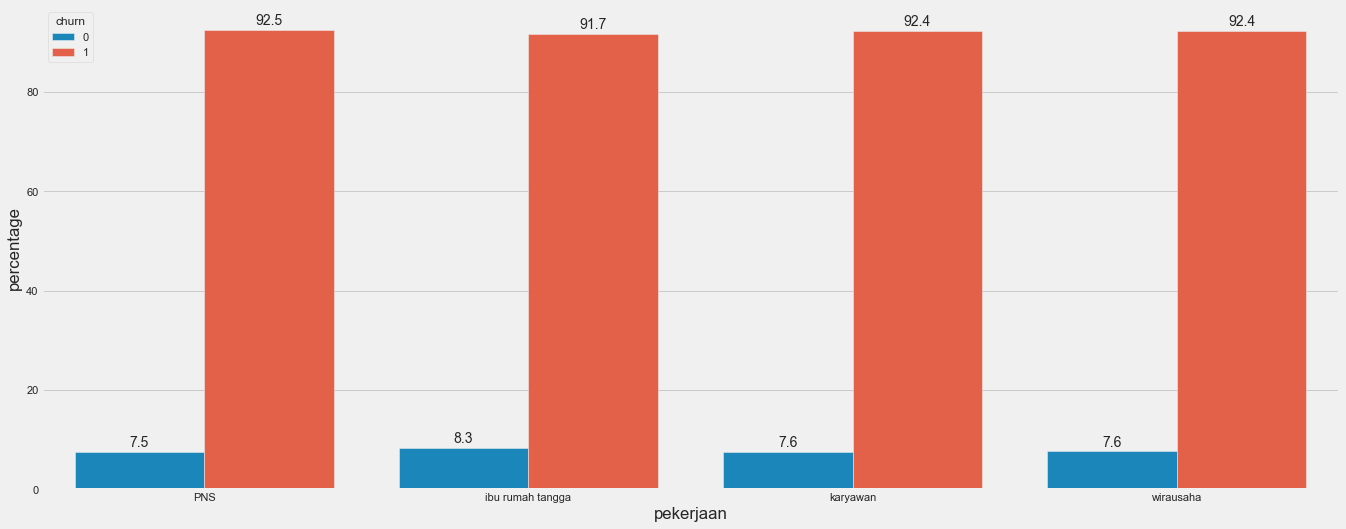

In [ ]:
splot = sns.barplot(x='pekerjaan',y='percentage',hue='churn',data=job)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Dari grafik di atas tidak ditemukan perbedaan pengaruh yang signikan antara 1 pekerjaan dengan targetnya

## Pendidikan

In [ ]:
sch = df.groupby(['pendidikan','churn'])['no'].count().reset_index()
sch['total'] = sch.groupby(['pendidikan'])['no'].transform('sum')
sch.columns = ['pendidikan','churn','jumlah','total']
sch['percentage'] = sch['jumlah']/sch['total']*100
sch

pendidikan  churn  jumlah  total  percentage
0         d3      0      97   1206    8.043118
1         d3      1    1109   1206   91.956882
2         s1      0      99   1281    7.728337
3         s1      1    1182   1281   92.271663
4        sma      0     165   1965    8.396947
5        sma      1    1800   1965   91.603053
6        smp      0       7     53   13.207547
7        smp      1      46     53   86.792453

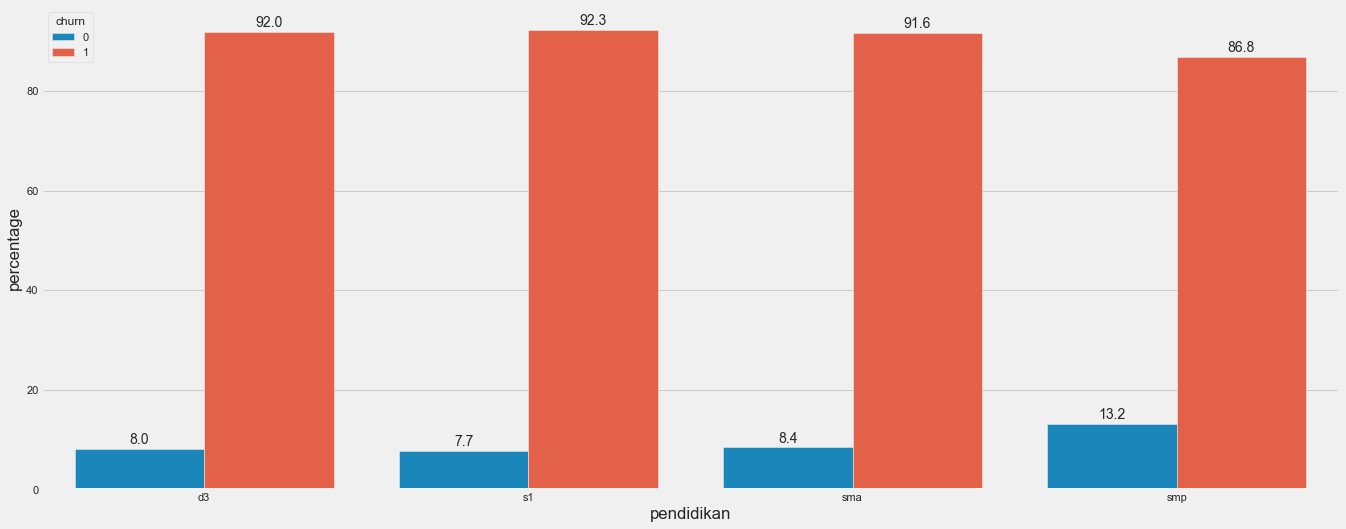

In [ ]:
splot = sns.barplot(x='pendidikan',y='percentage',hue='churn',data=sch)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Dari grafik di atas tidak ditemukan perbedaan pengaruh yang signikan antara 1 jenjang pendidikan dengan targetnya

## Status

In [ ]:
status = df.groupby(['status','churn'])['no'].count().reset_index()
status['total'] = status.groupby(['status'])['no'].transform('sum')
status.columns = ['status','churn','jumlah','total']
status['percentage'] = status['jumlah']/status['total']*100
status

status  churn  jumlah  total  percentage
0        menikah      0     324   3991    8.118266
1        menikah      1    3667   3991   91.881734
2  tidak menikah      0      44    514    8.560311
3  tidak menikah      1     470    514   91.439689

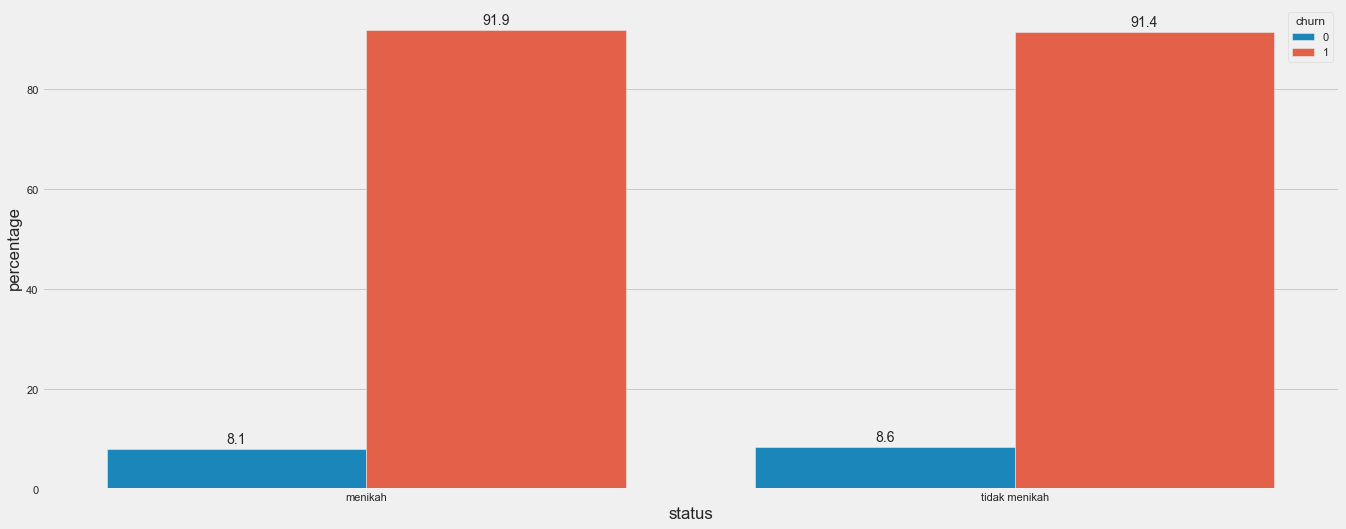

In [ ]:
splot = sns.barplot(x='status',y='percentage',hue='churn',data=status)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

## Jenjang

In [ ]:
jenjang = df.groupby(['jenjang','churn'])['no'].count().reset_index()
jenjang['total'] = jenjang.groupby(['jenjang'])['no'].transform('sum')
jenjang.columns = ['jenjang','churn','jumlah','total']
jenjang['percentage'] = jenjang['jumlah']/jenjang['total']*100
jenjang

jenjang  churn  jumlah  total  percentage
0  berprestasi      0       4     10   40.000000
1  berprestasi      1       6     10   60.000000
2       expert      0      10     16   62.500000
3       expert      1       6     16   37.500000
4        newbe      0     118    208   56.730769
5        newbe      1      90    208   43.269231
6  smart buyer      0     236   4271    5.525638
7  smart buyer      1    4035   4271   94.474362

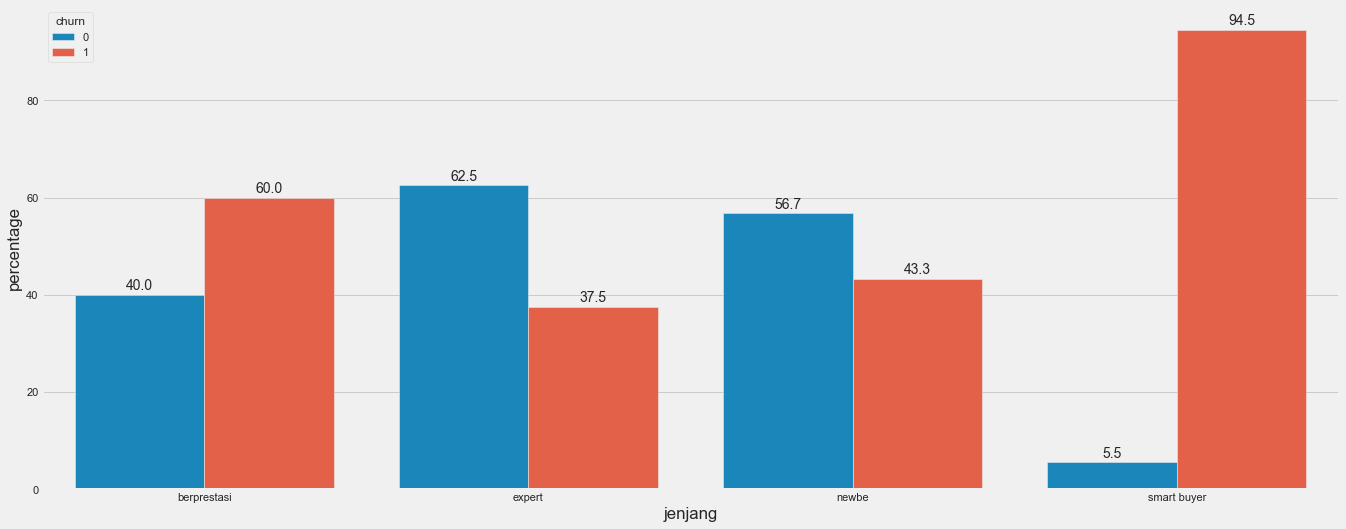

In [ ]:
splot = sns.barplot(x='jenjang',y='percentage',hue='churn',data=jenjang)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

- Dari grafik Jenjang dapat diilhat bahwa jenjang `smart buyer` adalah jenjang dengan persentase churn tertinggi
- Jenjang berprestasi juga memiliki tingkat churn lebih besar daripada tidak churn
- Sedangkan jenjang `expert` dan `newbe` memiliki tingkat churn lebih rendah

## Data Numeric Terhadap Churn

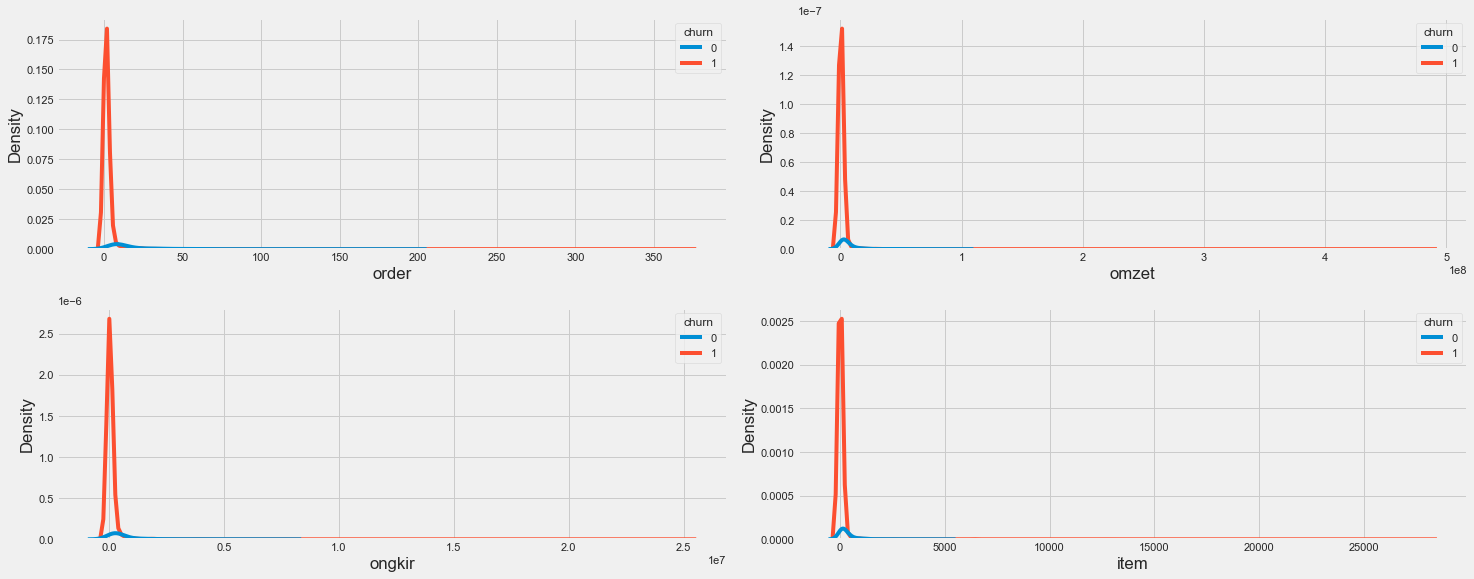

In [ ]:
# nominal data
nom = ["order",'omzet', 'ongkir', 'item']
for i in range(0, len(nom)):
    plt.subplot(2, len(nom)/2, i+1)
    sns.kdeplot(nom[i], hue = "churn", data=df)
    plt.tight_layout()

Dari grafik dapat disimpulkan bahwa:
- semakin sedikit customer order maka tingkat churn semakin tinggi

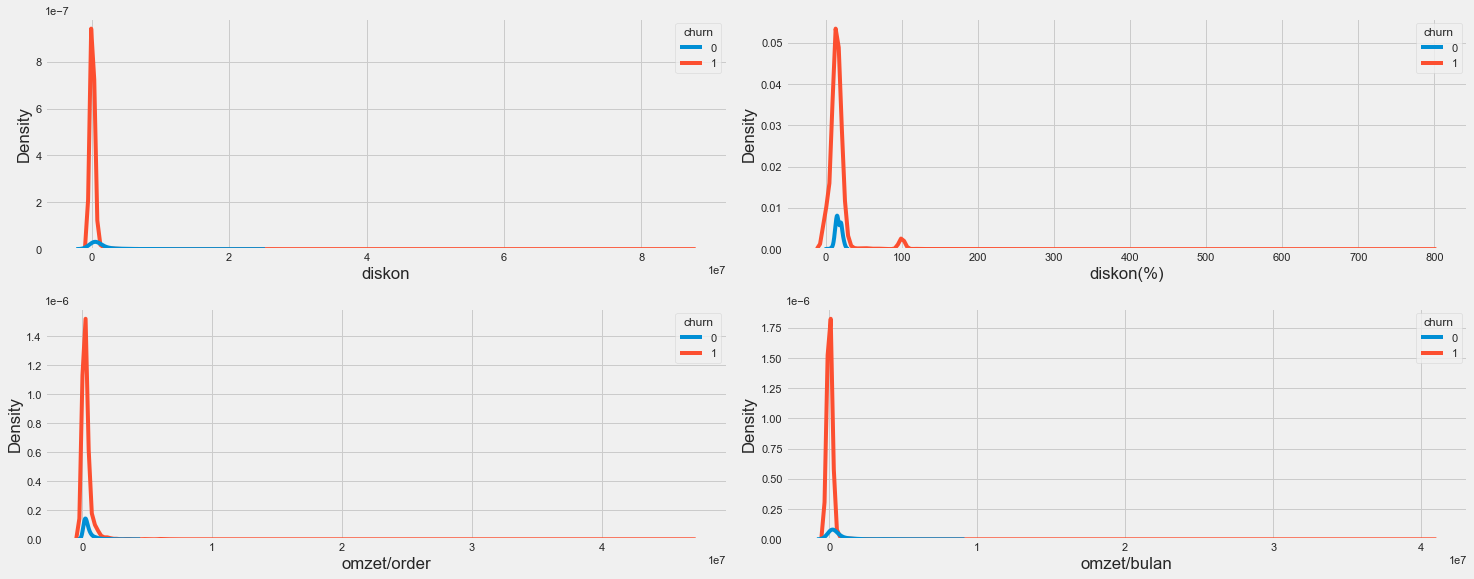

In [ ]:
# nominal data
nom = ["diskon",'diskon(%)', 'omzet/order', 'omzet/bulan']
for i in range(0, len(nom)):
    plt.subplot(2, len(nom)/2, i+1)
    sns.kdeplot(nom[i], hue = "churn", data=df)
    plt.tight_layout()

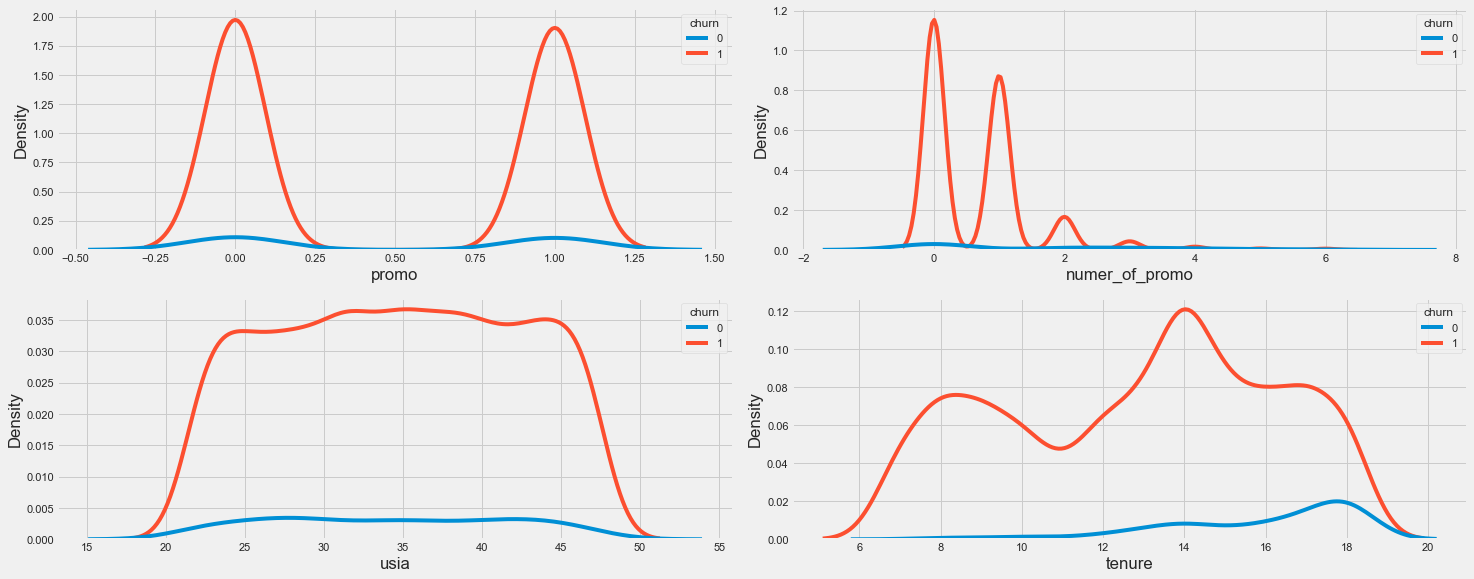

In [ ]:
# nominal data
nom = ["promo",'numer_of_promo','usia','tenure']
for i in range(0, len(nom)):
    plt.subplot(2, len(nom)/2, i+1)
    sns.kdeplot(nom[i], hue = "churn", data=df)
    plt.tight_layout()

Dari grafik diatas dapat insight sebagai berikut
- semakin banyak customer mendapat promo maka semakin rendah tingkat churn nya
- Usia tidak ditemukan kelompok usia yang tingkat churn nya tinggi atau rendah
- Semakin lama customer bertahan maka tingkat churn nya semakin rendah

## Feature Terhadap Order

### Gender

In [ ]:
gen = df.groupby(['gender'])['order'].sum().reset_index()
gen['total'] = gen['order'].sum()
gen.columns = ['gender','jumlah','total']
gen['percentage'] = gen['jumlah']/gen['total']*100
gen

gender  jumlah  total  percentage
0  female   14644  15317   95.606189
1    male     673  15317    4.393811

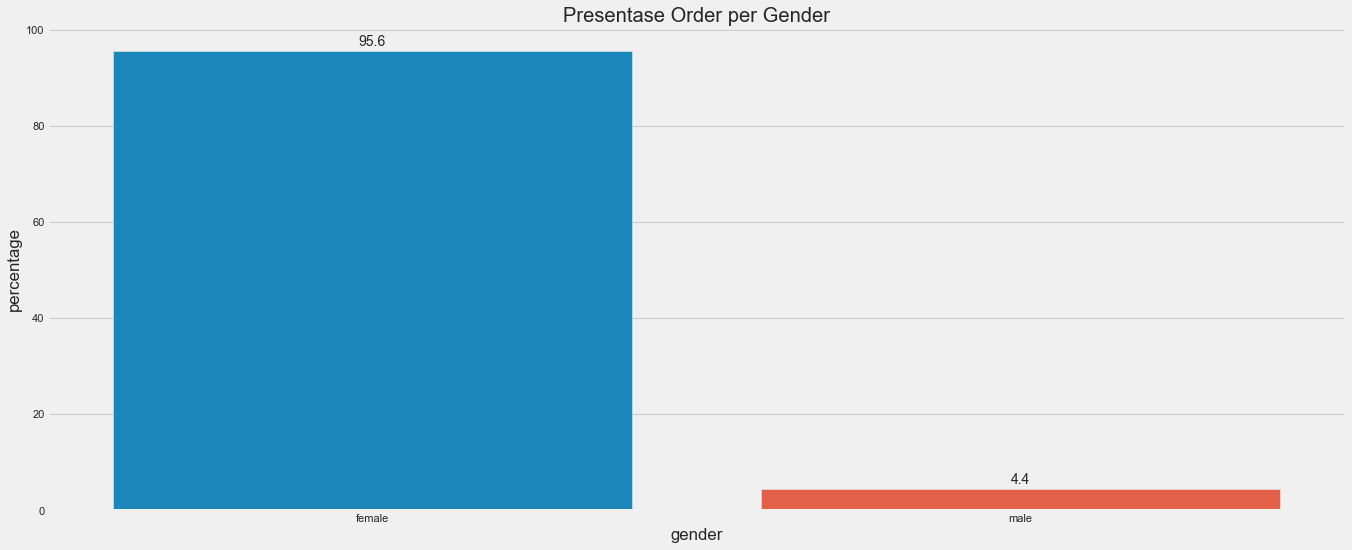

In [ ]:
splot = sns.barplot(x='gender',y='percentage',data=gen)
plt.title('Presentase Order per Gender')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Pekerjaan

In [ ]:
work = df.groupby(['pekerjaan'])['order'].sum().reset_index()
work['total'] = work['order'].sum()
work.columns = ['pekerjaan','jumlah','total']
work['percentage'] = work['jumlah']/work['total']*100
work

pekerjaan  jumlah  total  percentage
0               PNS     510  15317    3.329634
1  ibu rumah tangga   12151  15317   79.330156
2          karyawan     864  15317    5.640791
3         wirausaha    1792  15317   11.699419

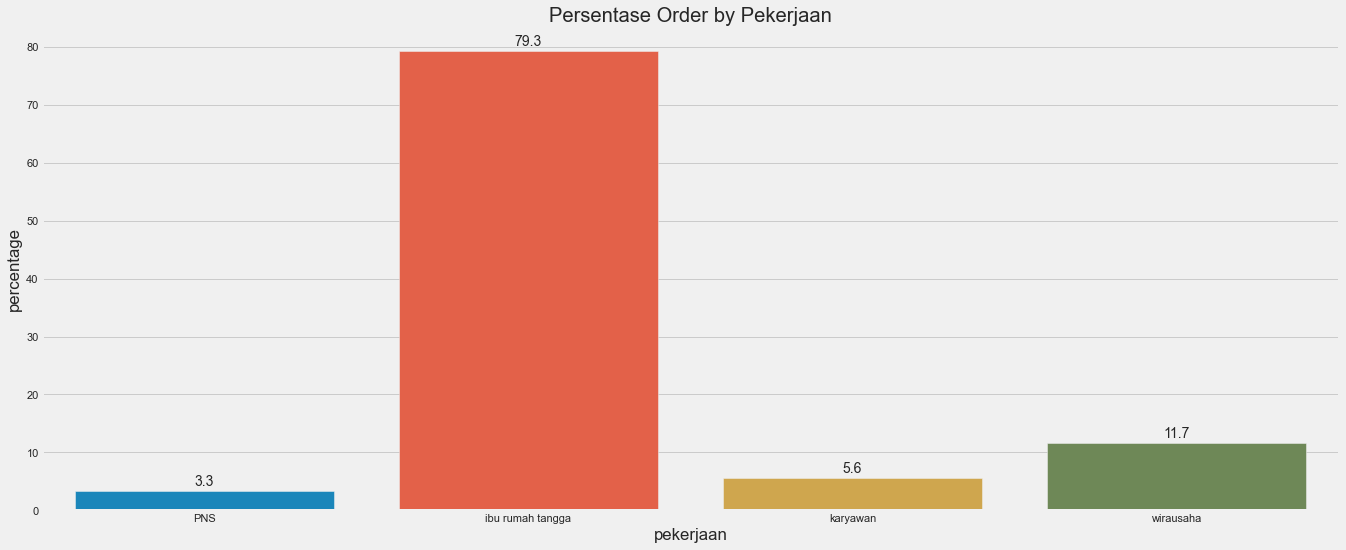

In [ ]:
splot = sns.barplot(x='pekerjaan',y='percentage',data=work)
plt.title('Persentase Order by Pekerjaan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Pendidikan

In [ ]:
pendidikan = df.groupby(['pendidikan'])['order'].sum().reset_index()
pendidikan['total'] = pendidikan['order'].sum()
pendidikan.columns = ['pendidikan','jumlah','total']
pendidikan['percentage'] = pendidikan['jumlah']/pendidikan['total']*100
pendidikan

pendidikan  jumlah  total  percentage
0         d3    3800  15317   24.809036
1         s1    4149  15317   27.087550
2        sma    7109  15317   46.412483
3        smp     259  15317    1.690932

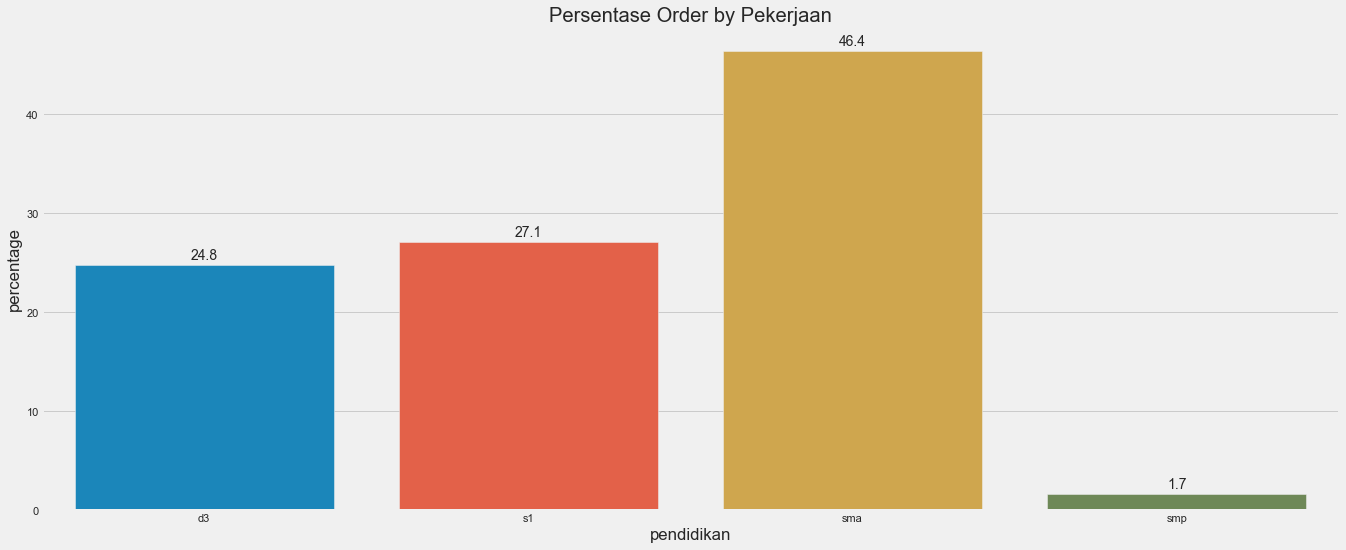

In [ ]:
splot = sns.barplot(x='pendidikan',y='percentage',data=pendidikan)
plt.title('Persentase Order by Pekerjaan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Status

In [ ]:
stts = df.groupby(['status'])['order'].sum().reset_index()
stts['total'] = stts['order'].sum()
stts.columns = ['status','jumlah','total']
stts['percentage'] = stts['jumlah']/stts['total']*100
stts

status  jumlah  total  percentage
0        menikah   13684  15317   89.338643
1  tidak menikah    1633  15317   10.661357

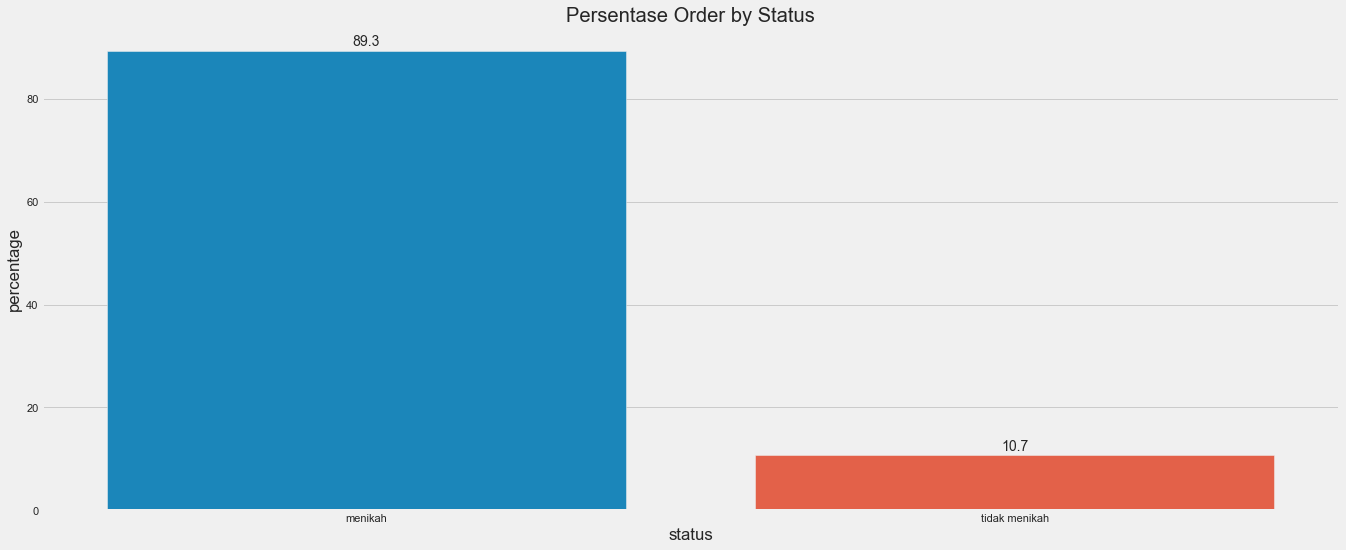

In [ ]:
splot = sns.barplot(x='status',y='percentage',data=stts)
plt.title('Persentase Order by Status')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Jenjang

In [ ]:
jnj = df.groupby(['jenjang'])['order'].sum().reset_index()
jnj['total'] = jnj['order'].sum()
jnj.columns = ['jenjang','jumlah','total']
jnj['percentage'] = jnj['jumlah']/jnj['total']*100
jnj

jenjang  jumlah  total  percentage
0  berprestasi     933  15317    6.091271
1       expert    1094  15317    7.142391
2        newbe    4182  15317   27.302997
3  smart buyer    9108  15317   59.463341

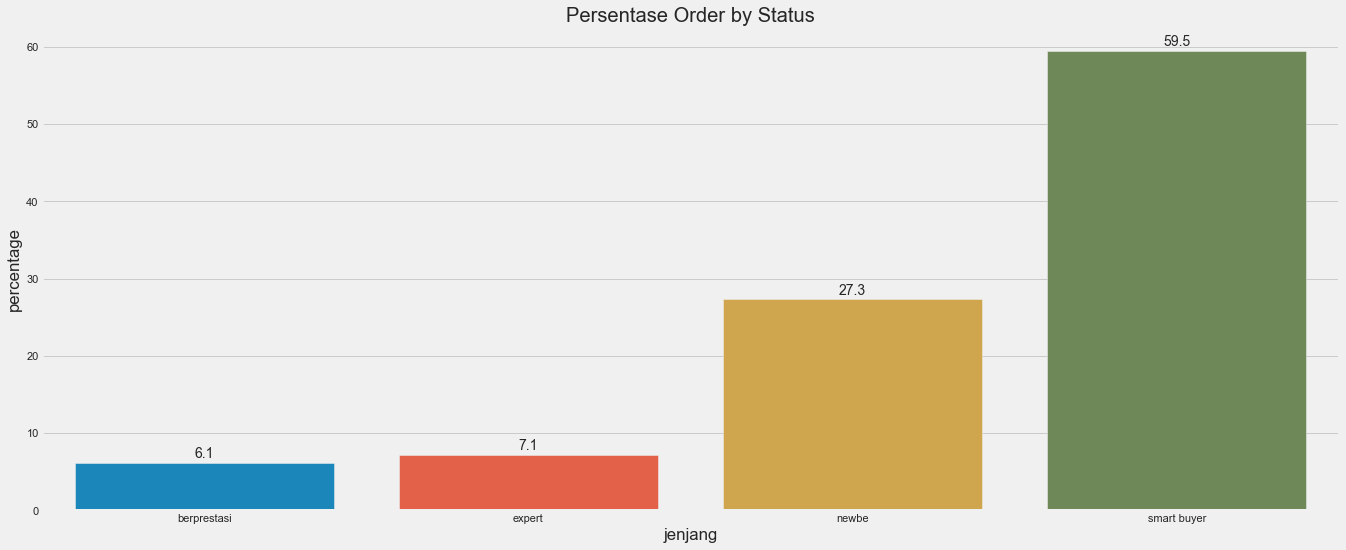

In [ ]:
splot = sns.barplot(x='jenjang',y='percentage',data=jnj)
plt.title('Persentase Order by Status')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Kota

In [ ]:
kota = df.groupby(['kota'])['order'].sum().reset_index()
kota['total'] = kota['order'].sum()
kota.columns = ['kota','jumlah','total']
kota['percentage'] = kota['jumlah']/kota['total']*100
kota = kota.sort_values('jumlah',ascending=False).reset_index()
kota

index                                 kota  jumlah  total  percentage
0       36                      Kabupaten Bogor    1430  15317    9.336032
1       27                     Kabupaten Bekasi    1081  15317    7.057518
2       10                    Kabupaten Bandung    1045  15317    6.822485
3       19                     Kabupaten Bantul     486  15317    3.172945
4      223                          Kota Bekasi     481  15317    3.140302
..     ...                                  ...     ...    ...         ...
291    159                       Kabupaten Poso       1  15317    0.006529
292     75                       Kabupaten Karo       1  15317    0.006529
293    259                  Kota Padang Panjang       1  15317    0.006529
294    260                Kota Padang Sidempuan       1  15317    0.006529
295    138  Kabupaten Ogan Komering Ulu Selatan       1  15317    0.006529

[296 rows x 5 columns]

## Feature Terhadap Omzet

### Gender

In [ ]:
gndr = df.groupby(['gender'])['omzet'].sum().reset_index()
gndr['total'] = gndr['omzet'].sum()
gndr.columns = ['gender','omzet','total']
gndr['percentage'] = gndr['omzet']/gndr['total']*100
gndr

gender       omzet       total  percentage
0  female  6539553896  6958678396   93.976953
1    male   419124500  6958678396    6.023047

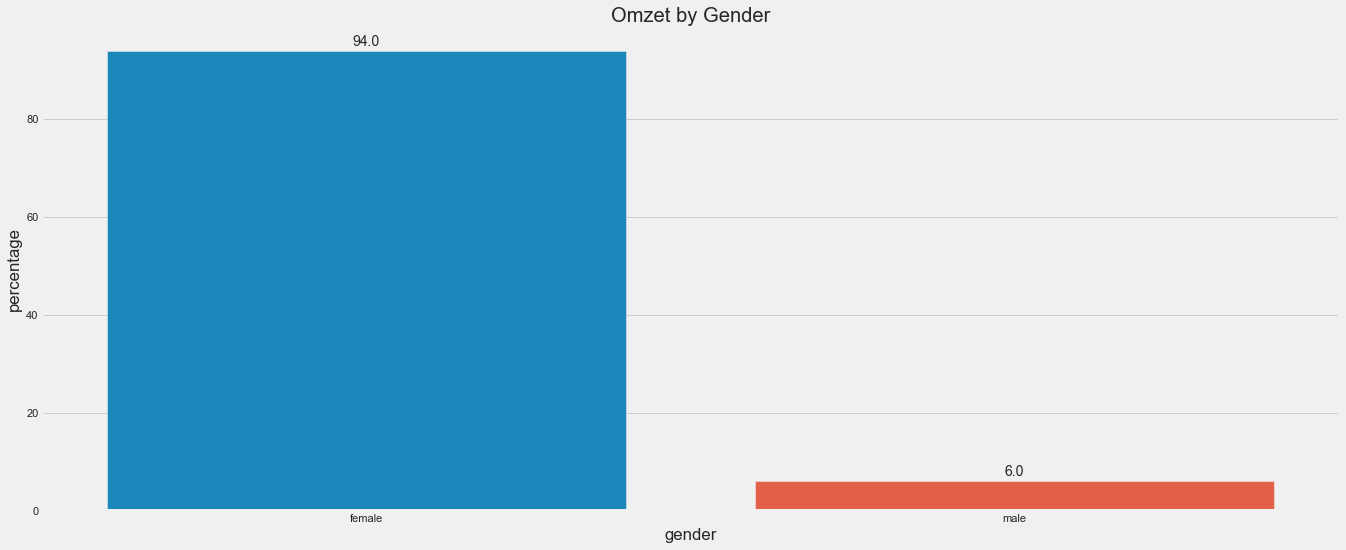

In [ ]:
splot = sns.barplot(x='gender',y='percentage',data=gndr)
plt.title('Omzet by Gender')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Pekerjaan

In [ ]:
pkr = df.groupby(['pekerjaan'])['omzet'].sum().reset_index()
pkr['total'] = pkr['omzet'].sum()
pkr.columns = ['pekerjaan','omzet','total']
pkr['percentage'] = pkr['omzet']/pkr['total']*100
pkr

pekerjaan       omzet       total  percentage
0               PNS   252552500  6958678396    3.629317
1  ibu rumah tangga  5612236325  6958678396   80.650894
2          karyawan   350933596  6958678396    5.043107
3         wirausaha   742955975  6958678396   10.676682

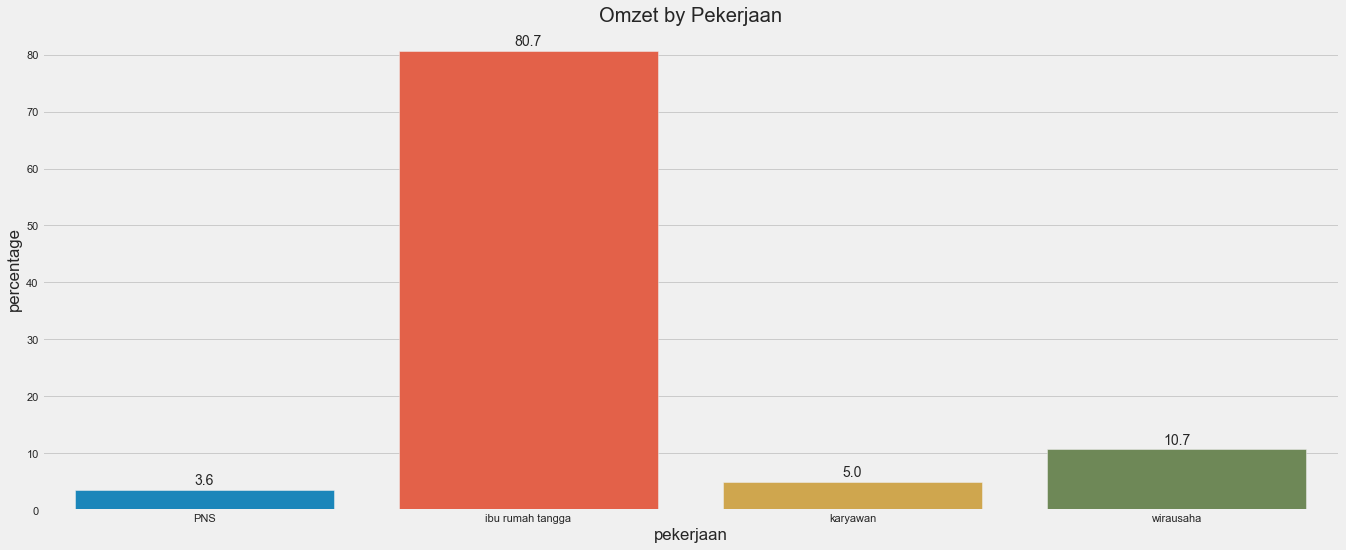

In [ ]:
splot = sns.barplot(x='pekerjaan',y='percentage',data=pkr)
plt.title('Omzet by Pekerjaan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Pendidikan

In [ ]:
pd = df.groupby(['pendidikan'])['omzet'].sum().reset_index()
pd['total'] = pd['omzet'].sum()
pd.columns = ['pendidikan','omzet','total']
pd['percentage'] = pd['omzet']/pd['total']*100
pd

pendidikan       omzet       total  percentage
0         d3  1981594025  6958678396   28.476586
1         s1  1483696000  6958678396   21.321520
2        sma  3365312071  6958678396   48.361368
3        smp   128076300  6958678396    1.840526

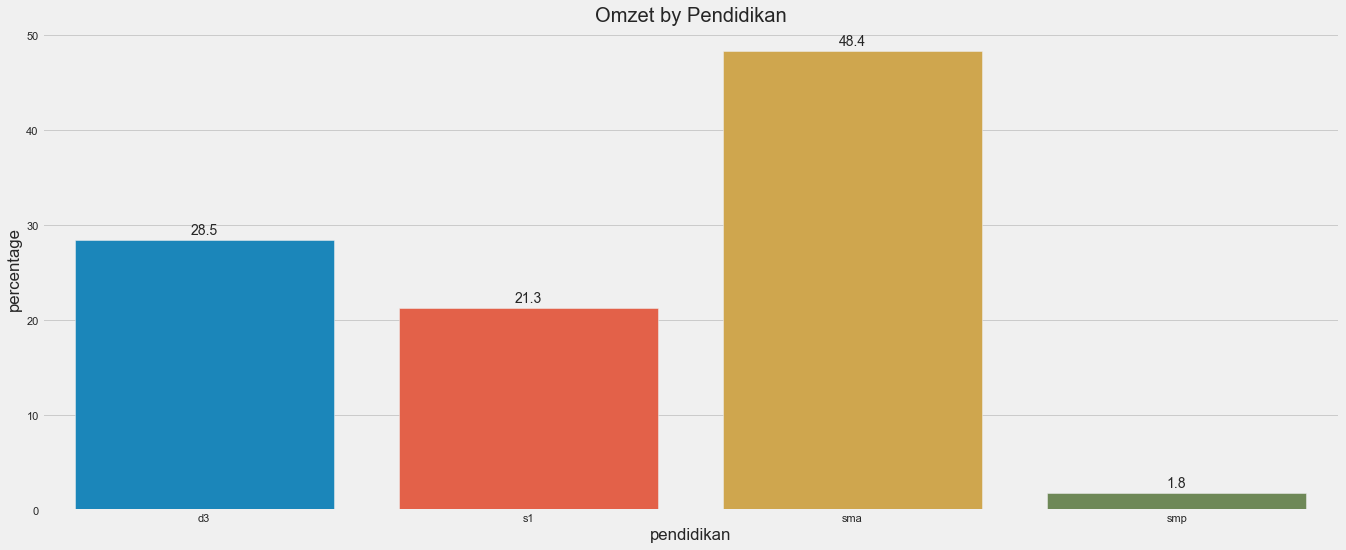

In [ ]:
splot = sns.barplot(x='pendidikan',y='percentage',data=pd)
plt.title('Omzet by Pendidikan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Status

In [ ]:
sts = df.groupby(['status'])['omzet'].sum().reset_index()
sts['total'] = sts['omzet'].sum()
sts.columns = ['status','omzet','total']
sts['percentage'] = sts['omzet']/sts['total']*100
sts

status       omzet       total  percentage
0        menikah  6129373296  6958678396   88.082434
1  tidak menikah   829305100  6958678396   11.917566

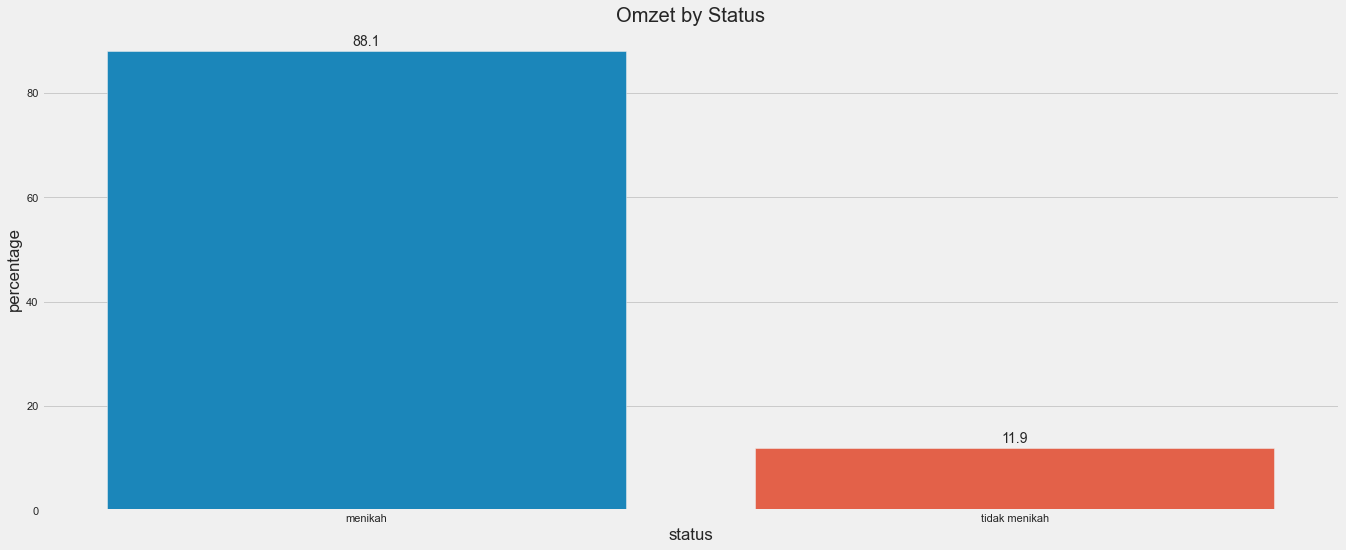

In [ ]:
splot = sns.barplot(x='status',y='percentage',data=sts)
plt.title('Omzet by Status')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Jenjang

In [ ]:
jn = df.groupby(['jenjang'])['omzet'].sum().reset_index()
jn['total'] = jn['omzet'].sum()
jn.columns = ['jenjang','omzet','total']
jn['percentage'] = jn['omzet']/jn['total']*100
jn

jenjang       omzet       total  percentage
0  berprestasi  1764219500  6958678396   25.352795
1       expert   663705500  6958678396    9.537810
2        newbe  2143967775  6958678396   30.809985
3  smart buyer  2386785621  6958678396   34.299410

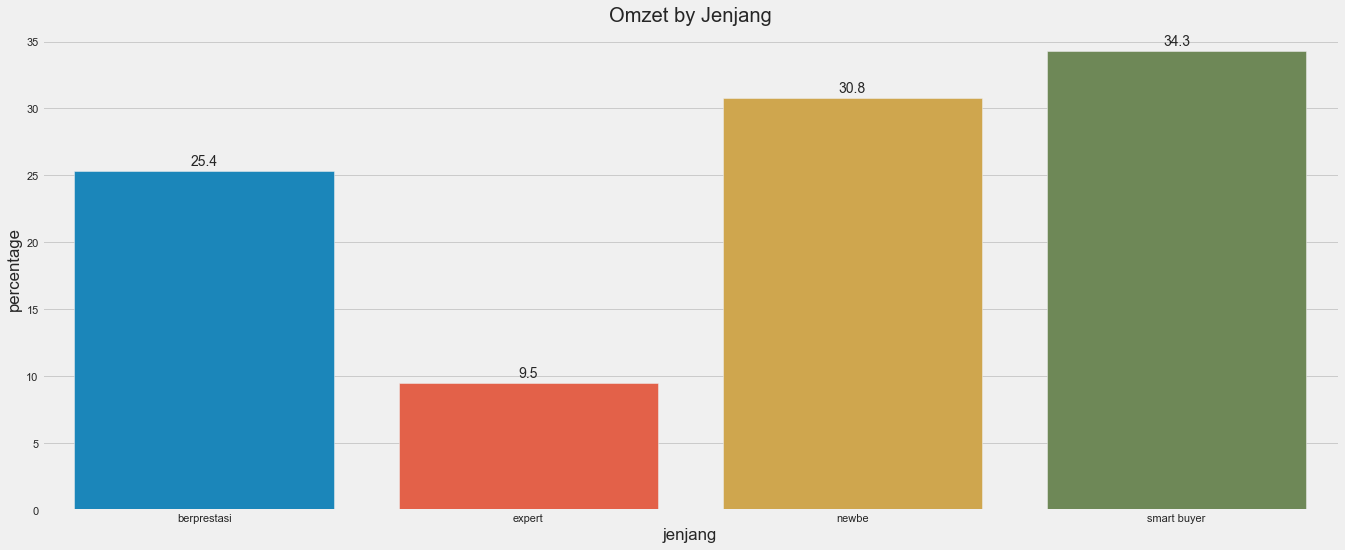

In [ ]:
splot = sns.barplot(x='jenjang',y='percentage',data=jn)
plt.title('Omzet by Jenjang')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

## Jenjang Terhadap Feature Lain

In [ ]:
jnjng = df.groupby(['jenjang','gender'])['no'].count().reset_index()
jnjng['total'] = jnjng.groupby(['jenjang'])['no'].transform('sum')
jnjng.columns = ['jenjang','gender','jumlah','total']
jnjng['percentage'] = jnjng['jumlah']/jnjng['total']*100
jnjng

jenjang  gender  jumlah  total  percentage
0  berprestasi  female      10     10  100.000000
1       expert  female      13     16   81.250000
2       expert    male       3     16   18.750000
3        newbe  female     195    208   93.750000
4        newbe    male      13    208    6.250000
5  smart buyer  female    4001   4271   93.678295
6  smart buyer    male     270   4271    6.321705

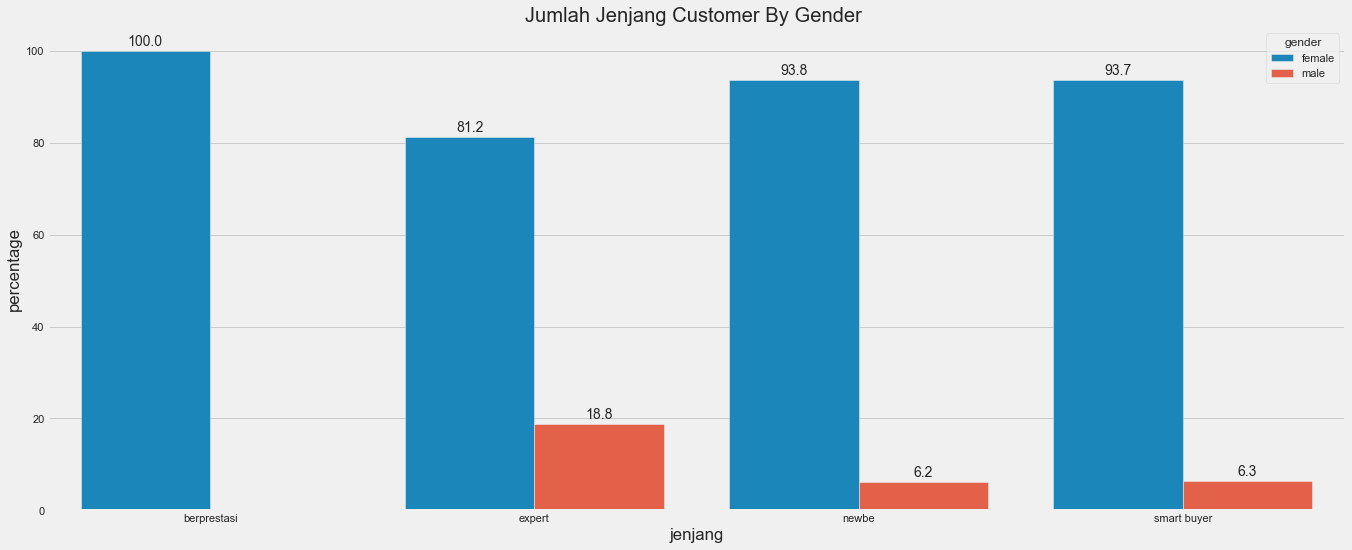

In [ ]:
splot = sns.barplot(x='jenjang',y='percentage',hue='gender',data=jnjng)
plt.title('Jumlah Jenjang Customer By Gender ')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [ ]:
j_pkr = df.groupby(['jenjang','pekerjaan'])['no'].count().reset_index()
j_pkr['total'] = j_pkr.groupby(['jenjang'])['no'].transform('sum')
j_pkr.columns = ['jenjang','pekerjaan','jumlah','total']
j_pkr['percentage'] = j_pkr['jumlah']/j_pkr['total']*100
j_pkr

jenjang         pekerjaan  jumlah  total  percentage
0   berprestasi  ibu rumah tangga       9     10   90.000000
1   berprestasi         wirausaha       1     10   10.000000
2        expert               PNS       1     16    6.250000
3        expert  ibu rumah tangga      11     16   68.750000
4        expert          karyawan       2     16   12.500000
5        expert         wirausaha       2     16   12.500000
6         newbe               PNS      10    208    4.807692
7         newbe  ibu rumah tangga     159    208   76.442308
8         newbe          karyawan      12    208    5.769231
9         newbe         wirausaha      27    208   12.980769
10  smart buyer               PNS     163   4271    3.816436
11  smart buyer  ibu rumah tangga    3337   4271   78.131585
12  smart buyer          karyawan     249   4271    5.830016
13  smart buyer         wirausaha     522   4271   12.221962

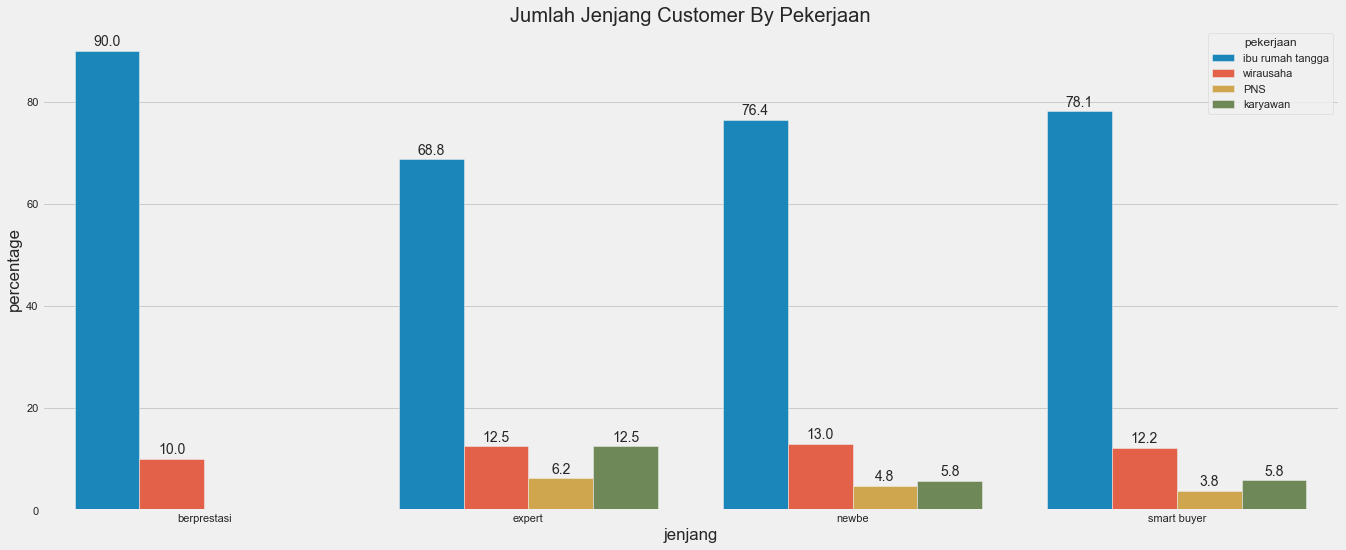

In [ ]:
splot = sns.barplot(x='jenjang',y='percentage',hue='pekerjaan',data=j_pkr)
plt.title('Jumlah Jenjang Customer By Pekerjaan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [ ]:
j_pnd = df.groupby(['jenjang','pendidikan'])['no'].count().reset_index()
j_pnd['total'] = j_pnd.groupby(['jenjang'])['no'].transform('sum')
j_pnd.columns = ['jenjang','pendidikan','jumlah','total']
j_pnd['percentage'] = j_pnd['jumlah']/j_pnd['total']*100
j_pnd

jenjang pendidikan  jumlah  total  percentage
0   berprestasi         d3       4     10   40.000000
1   berprestasi        sma       6     10   60.000000
2        expert         d3       2     16   12.500000
3        expert         s1       6     16   37.500000
4        expert        sma       6     16   37.500000
5        expert        smp       2     16   12.500000
6         newbe         d3      50    208   24.038462
7         newbe         s1      60    208   28.846154
8         newbe        sma      95    208   45.673077
9         newbe        smp       3    208    1.442308
10  smart buyer         d3    1150   4271   26.925779
11  smart buyer         s1    1215   4271   28.447670
12  smart buyer        sma    1858   4271   43.502693
13  smart buyer        smp      48   4271    1.123859

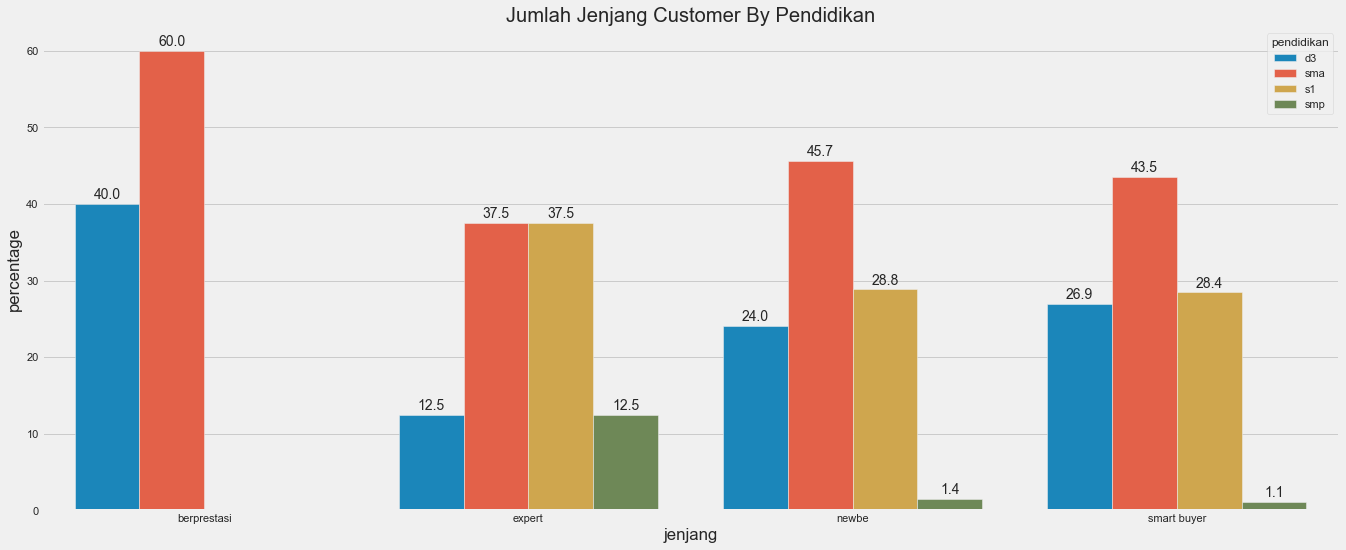

In [ ]:
splot = sns.barplot(x='jenjang',y='percentage',hue='pendidikan',data=j_pnd)
plt.title('Jumlah Jenjang Customer By Pendidikan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# Feature Terhadap Data Numeric

### Jenjang & Omzet

In [ ]:
j = df.groupby(['jenjang'])['omzet'].sum().reset_index()
j['total'] = j['omzet'].sum()
j.columns = ['jenjang','omzet','total']
j['percentage'] = j['omzet']/j['total']*100
j

jenjang       omzet       total  percentage
0  berprestasi  1764219500  6958678396   25.352795
1       expert   663705500  6958678396    9.537810
2        newbe  2143967775  6958678396   30.809985
3  smart buyer  2386785621  6958678396   34.299410

### Jenjang & Order

In [ ]:
jor = df.groupby(['jenjang'])['order'].mean().reset_index()
jor

jenjang      order
0  berprestasi  93.300000
1       expert  68.375000
2        newbe  20.105769
3  smart buyer   2.132522

### jenjang & item

In [ ]:
jit = df.groupby(['jenjang'])['item'].sum().reset_index()
jit['total'] = jit['item'].sum()
jit.columns = ['jenjang','item','total']
jit['percentage'] = jit['item']/jit['total']*100
jit

jenjang    item   total  percentage
0  berprestasi   95976  378644   25.347292
1       expert   36866  378644    9.736322
2        newbe  116584  378644   30.789871
3  smart buyer  129218  378644   34.126515

### Jenjang & diskon

In [ ]:
jdis= df.groupby(['jenjang'])['diskon'].sum().reset_index()
jdis['total'] = jdis['diskon'].sum()
jdis.columns = ['jenjang','diskon','total']
jdis['percentage'] = jdis['diskon']/jdis['total']*100
jdis

jenjang     diskon       total  percentage
0  berprestasi  286542556  1220052662   23.486081
1       expert  140437880  1220052662   11.510805
2        newbe  409578676  1220052662   33.570574
3  smart buyer  383493550  1220052662   31.432541

### Jenjang & Diskon (%)

In [ ]:
jdi= df.groupby(['jenjang'])['diskon(%)'].mean().reset_index()
jdi

jenjang  diskon(%)
0  berprestasi  18.200000
1       expert  21.250000
2        newbe  18.836538
3  smart buyer  16.561695

### Jenjang & Omzet/bulan

In [ ]:
jomb= df.groupby(['jenjang'])['omzet/order'].mean().reset_index()
jomb

jenjang   omzet/order
0  berprestasi  6.804533e+06
1       expert  1.247324e+06
2        newbe  1.048264e+06
3  smart buyer  2.673135e+05

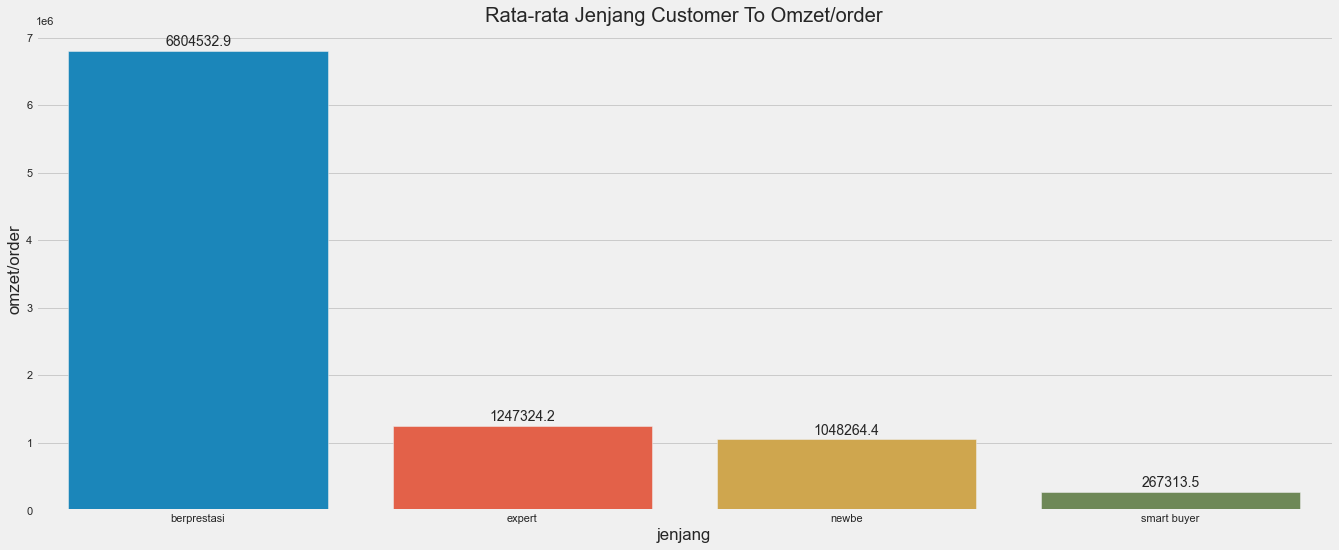

In [ ]:
splot = sns.barplot(x='jenjang',y='omzet/order',data=jomb)
plt.title('Rata-rata Jenjang Customer To Omzet/order')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

### Jenjang & Number Of Promo

In [ ]:
jnop= df.groupby(['jenjang'])['numer_of_promo'].mean().reset_index()
jnop['total'] = jnop['numer_of_promo'].sum()
jnop.columns = ['jenjang','promo','total']
jnop['percentage'] = jnop['promo']/jnop['total']*100
jnop

jenjang     promo      total  percentage
0  berprestasi  3.000000  10.436226   28.746024
1       expert  4.500000  10.436226   43.119037
2        newbe  2.302885  10.436226   22.066259
3  smart buyer  0.633341  10.436226    6.068680

In [ ]:
jnop= df.groupby(['jenjang'])['numer_of_promo'].sum().reset_index()
jnop['total'] = jnop['numer_of_promo'].sum()
jnop.columns = ['jenjang','promo','total']
jnop['percentage'] = jnop['promo']/jnop['total']*100
jnop

jenjang  promo  total  percentage
0  berprestasi     30   3286    0.912964
1       expert     72   3286    2.191114
2        newbe    479   3286   14.576993
3  smart buyer   2705   3286   82.318929

In [ ]:
jusia= df.groupby(['jenjang'])['usia'].mean().reset_index()
jusia

jenjang       usia
0  berprestasi  32.100000
1       expert  32.250000
2        newbe  34.062500
3  smart buyer  34.635917

In [ ]:
jtnr= df.groupby(['jenjang'])['tenure'].mean().reset_index()
jtnr

jenjang     tenure
0  berprestasi  15.100000
1       expert  16.687500
2        newbe  15.807692
3  smart buyer  12.979396

In [ ]:
jp = df.groupby(['jenjang','pendidikan'])['no'].count().reset_index()
jp['total'] = jp['no'].sum()
jp.columns = ['jenjang','pendidikan','jumlah','total']
jp['percentage'] = jp['jumlah']/jp['total']*100
jp

jenjang pendidikan  jumlah  total  percentage
0   berprestasi         d3       4   4505    0.088790
1   berprestasi        sma       6   4505    0.133185
2        expert         d3       2   4505    0.044395
3        expert         s1       6   4505    0.133185
4        expert        sma       6   4505    0.133185
5        expert        smp       2   4505    0.044395
6         newbe         d3      50   4505    1.109878
7         newbe         s1      60   4505    1.331853
8         newbe        sma      95   4505    2.108768
9         newbe        smp       3   4505    0.066593
10  smart buyer         d3    1150   4505   25.527192
11  smart buyer         s1    1215   4505   26.970033
12  smart buyer        sma    1858   4505   41.243063
13  smart buyer        smp      48   4505    1.065483

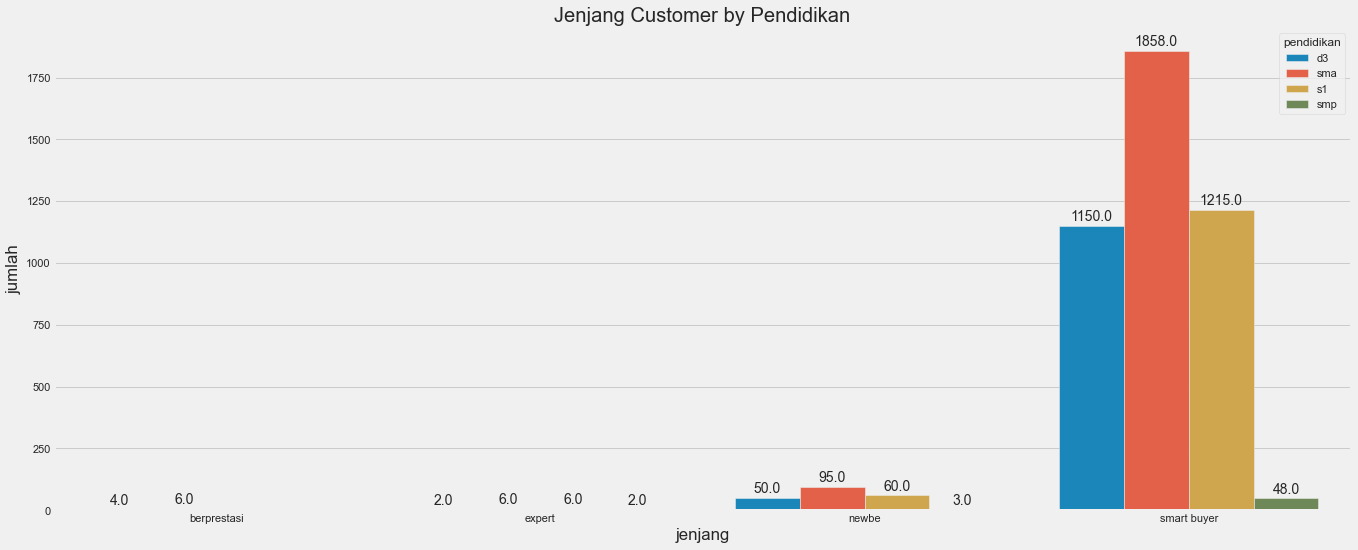

In [ ]:
splot = sns.barplot(x='jenjang',y='jumlah',hue='pendidikan',data=jp)
plt.title('Jenjang Customer by Pendidikan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [ ]:
jpo = df.groupby(['jenjang','pendidikan'])['omzet'].sum().reset_index()
jpo['total'] = jpo['omzet'].sum()
jpo.columns = ['jenjang','pendidikan','omzet','total']
jpo['percentage'] = jpo['omzet']/jpo['total']*100
jpo

jenjang pendidikan       omzet       total  percentage
0   berprestasi         d3   685887000  6958678396    9.856570
1   berprestasi        sma  1078332500  6958678396   15.496226
2        expert         d3    68345000  6958678396    0.982155
3        expert         s1   255765000  6958678396    3.675482
4        expert        sma   253969000  6958678396    3.649673
5        expert        smp    85626500  6958678396    1.230499
6         newbe         d3   568300225  6958678396    8.166784
7         newbe         s1   560127700  6958678396    8.049340
8         newbe        sma   992079850  6958678396   14.256728
9         newbe        smp    23460000  6958678396    0.337133
10  smart buyer         d3   659061800  6958678396    9.471077
11  smart buyer         s1   667803300  6958678396    9.596697
12  smart buyer        sma  1040930721  6958678396   14.958742
13  smart buyer        smp    18989800  6958678396    0.272894

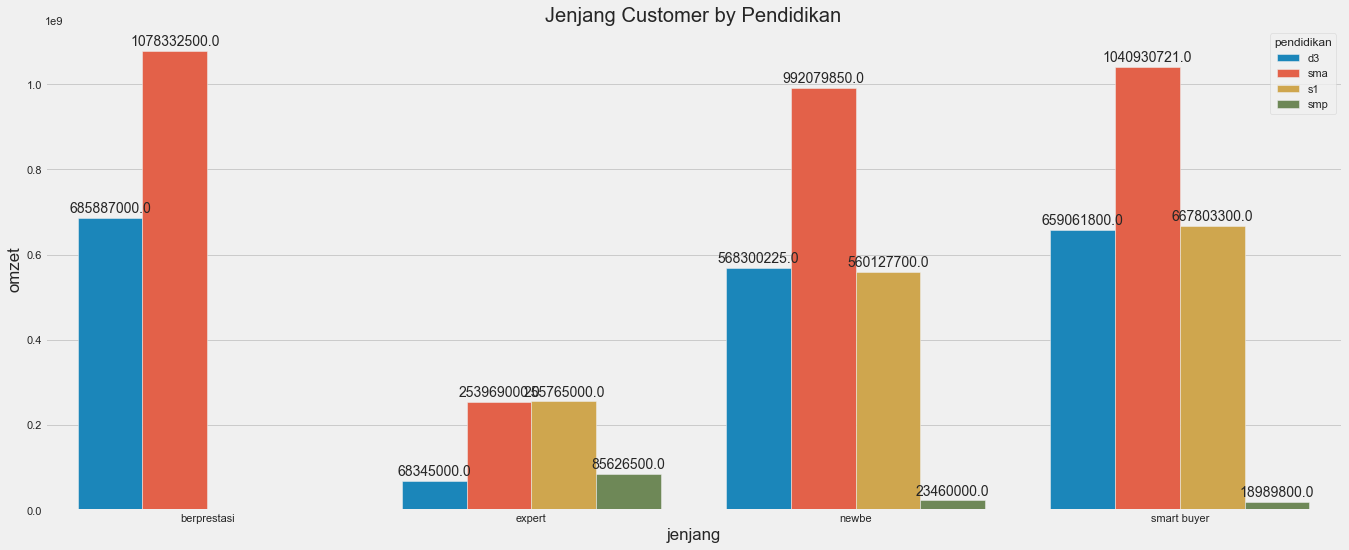

In [ ]:
splot = sns.barplot(x='jenjang',y='omzet',hue='pendidikan',data=jpo)
plt.title('Jenjang Customer by Pendidikan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [ ]:
jpko = df.groupby(['jenjang','pekerjaan'])['omzet'].sum().reset_index()
jpko['total'] = jpko['omzet'].sum()
jpko.columns = ['jenjang','pekerjaan','omzet','total']
jpko['percentage'] = jpko['omzet']/jpko['total']*100
jpko

jenjang         pekerjaan       omzet       total  percentage
0   berprestasi  ibu rumah tangga  1664695000  6958678396   23.922574
1   berprestasi         wirausaha    99524500  6958678396    1.430221
2        expert               PNS    30837000  6958678396    0.443144
3        expert  ibu rumah tangga   450495000  6958678396    6.473859
4        expert          karyawan    99162500  6958678396    1.425019
5        expert         wirausaha    83211000  6958678396    1.195787
6         newbe               PNS   131426500  6958678396    1.888670
7         newbe  ibu rumah tangga  1626349900  6958678396   23.371534
8         newbe          karyawan   123451500  6958678396    1.774065
9         newbe         wirausaha   262739875  6958678396    3.775715
10  smart buyer               PNS    90289000  6958678396    1.297502
11  smart buyer  ibu rumah tangga  1870696425  6958678396   26.882927
12  smart buyer          karyawan   128319596  6958678396    1.844023
13  smart buyer         wirausaha   297480600  6958678396    4.274958

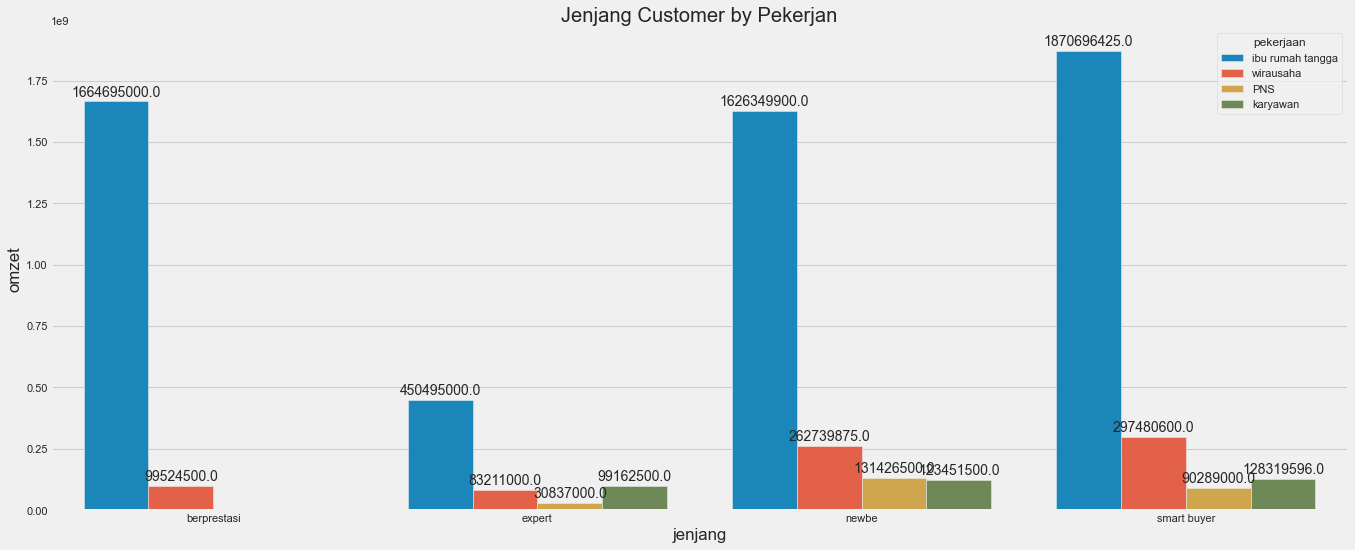

In [ ]:
splot = sns.barplot(x='jenjang',y='omzet',hue='pekerjaan',data=jpko)
plt.title('Jenjang Customer by Pekerjan')
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Penerima        4505 non-null   object
 1   order           4505 non-null   int64 
 2   omzet           4505 non-null   int64 
 3   item            4505 non-null   int64 
 4   ongkir          4505 non-null   int64 
 5   diskon          4505 non-null   int64 
 6   diskon(%)       4505 non-null   int64 
 7   omzet/order     4505 non-null   int64 
 8   omzet/bulan     4505 non-null   int64 
 9   jenjang         4505 non-null   object
 10  kota            4505 non-null   object
 11  smo             1708 non-null   object
 12  promo           4505 non-null   int64 
 13  numer_of_promo  4505 non-null   int64 
 14  gender          4505 non-null   object
 15  usia            4505 non-null   int64 
 16  tenure          4505 non-null   int64 
 17  pekerjaan       4505 non-null   object
 18  pendidik

# Data Preprocessing

### Missing Value

In [ ]:
df.isnull().sum()

Penerima             0
order                0
omzet                0
item                 0
ongkir               0
diskon               0
diskon(%)            0
omzet/order          0
omzet/bulan          0
jenjang              0
kota                 0
smo               2797
promo                0
numer_of_promo       0
gender               0
usia                 0
tenure               0
pekerjaan            0
pendidikan           0
status               0
churn                0
no                   0
dtype: int64

#### Drop kolom smo

In [ ]:
df = df.drop(['smo'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Penerima        4505 non-null   object
 1   order           4505 non-null   int64 
 2   omzet           4505 non-null   int64 
 3   item            4505 non-null   int64 
 4   ongkir          4505 non-null   int64 
 5   diskon          4505 non-null   int64 
 6   diskon(%)       4505 non-null   int64 
 7   omzet/order     4505 non-null   int64 
 8   omzet/bulan     4505 non-null   int64 
 9   jenjang         4505 non-null   object
 10  kota            4505 non-null   object
 11  promo           4505 non-null   int64 
 12  numer_of_promo  4505 non-null   int64 
 13  gender          4505 non-null   object
 14  usia            4505 non-null   int64 
 15  tenure          4505 non-null   int64 
 16  pekerjaan       4505 non-null   object
 17  pendidikan      4505 non-null   object
 18  status  

### Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Outlier

Untuk menghilangkan outlier akan dilakukan dengan fungsi log sehingga data tidak ada yang terhapus

Skewness Co-efficient: 16.933
Skewness Co-efficient: 2.34749


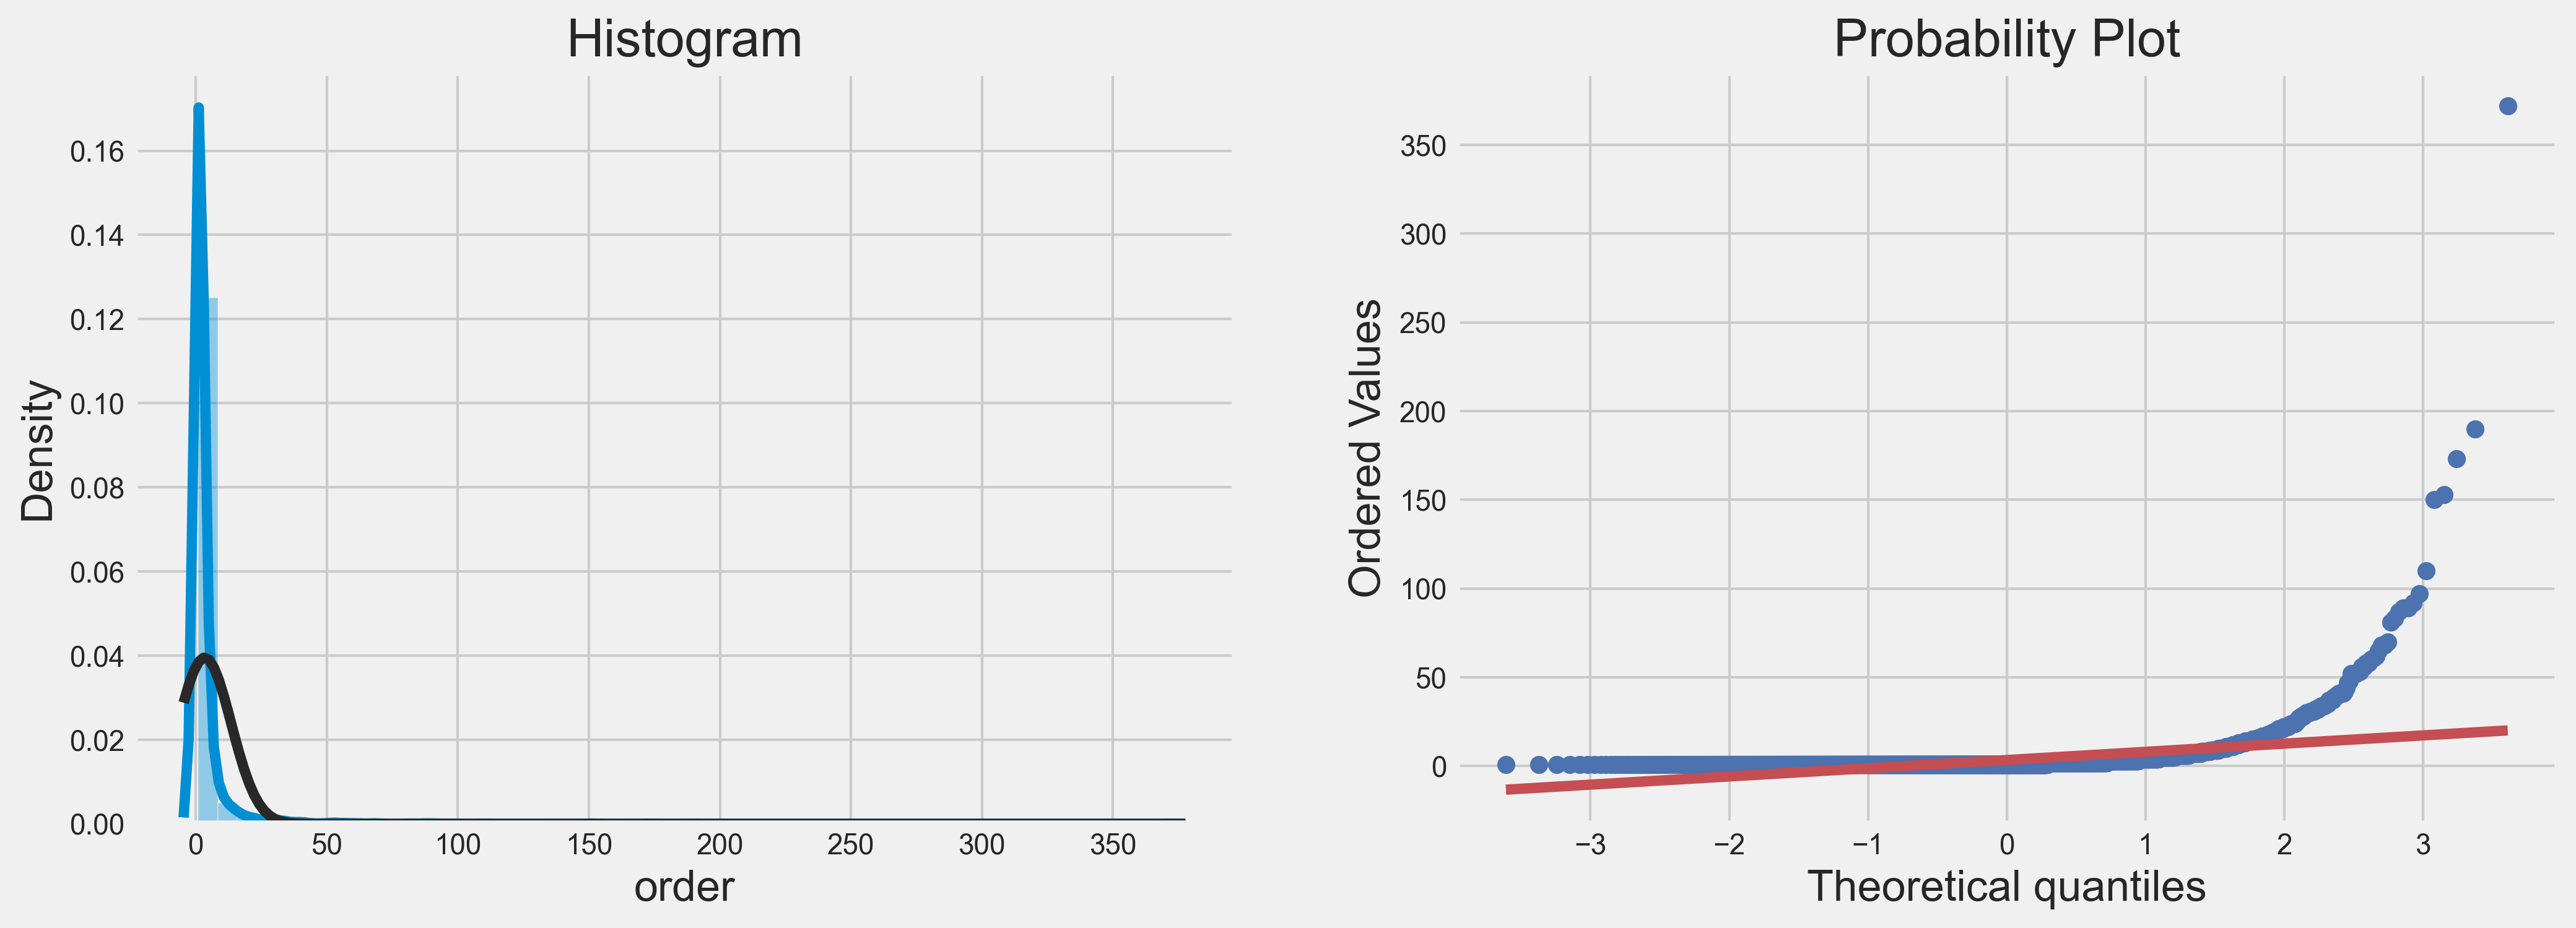

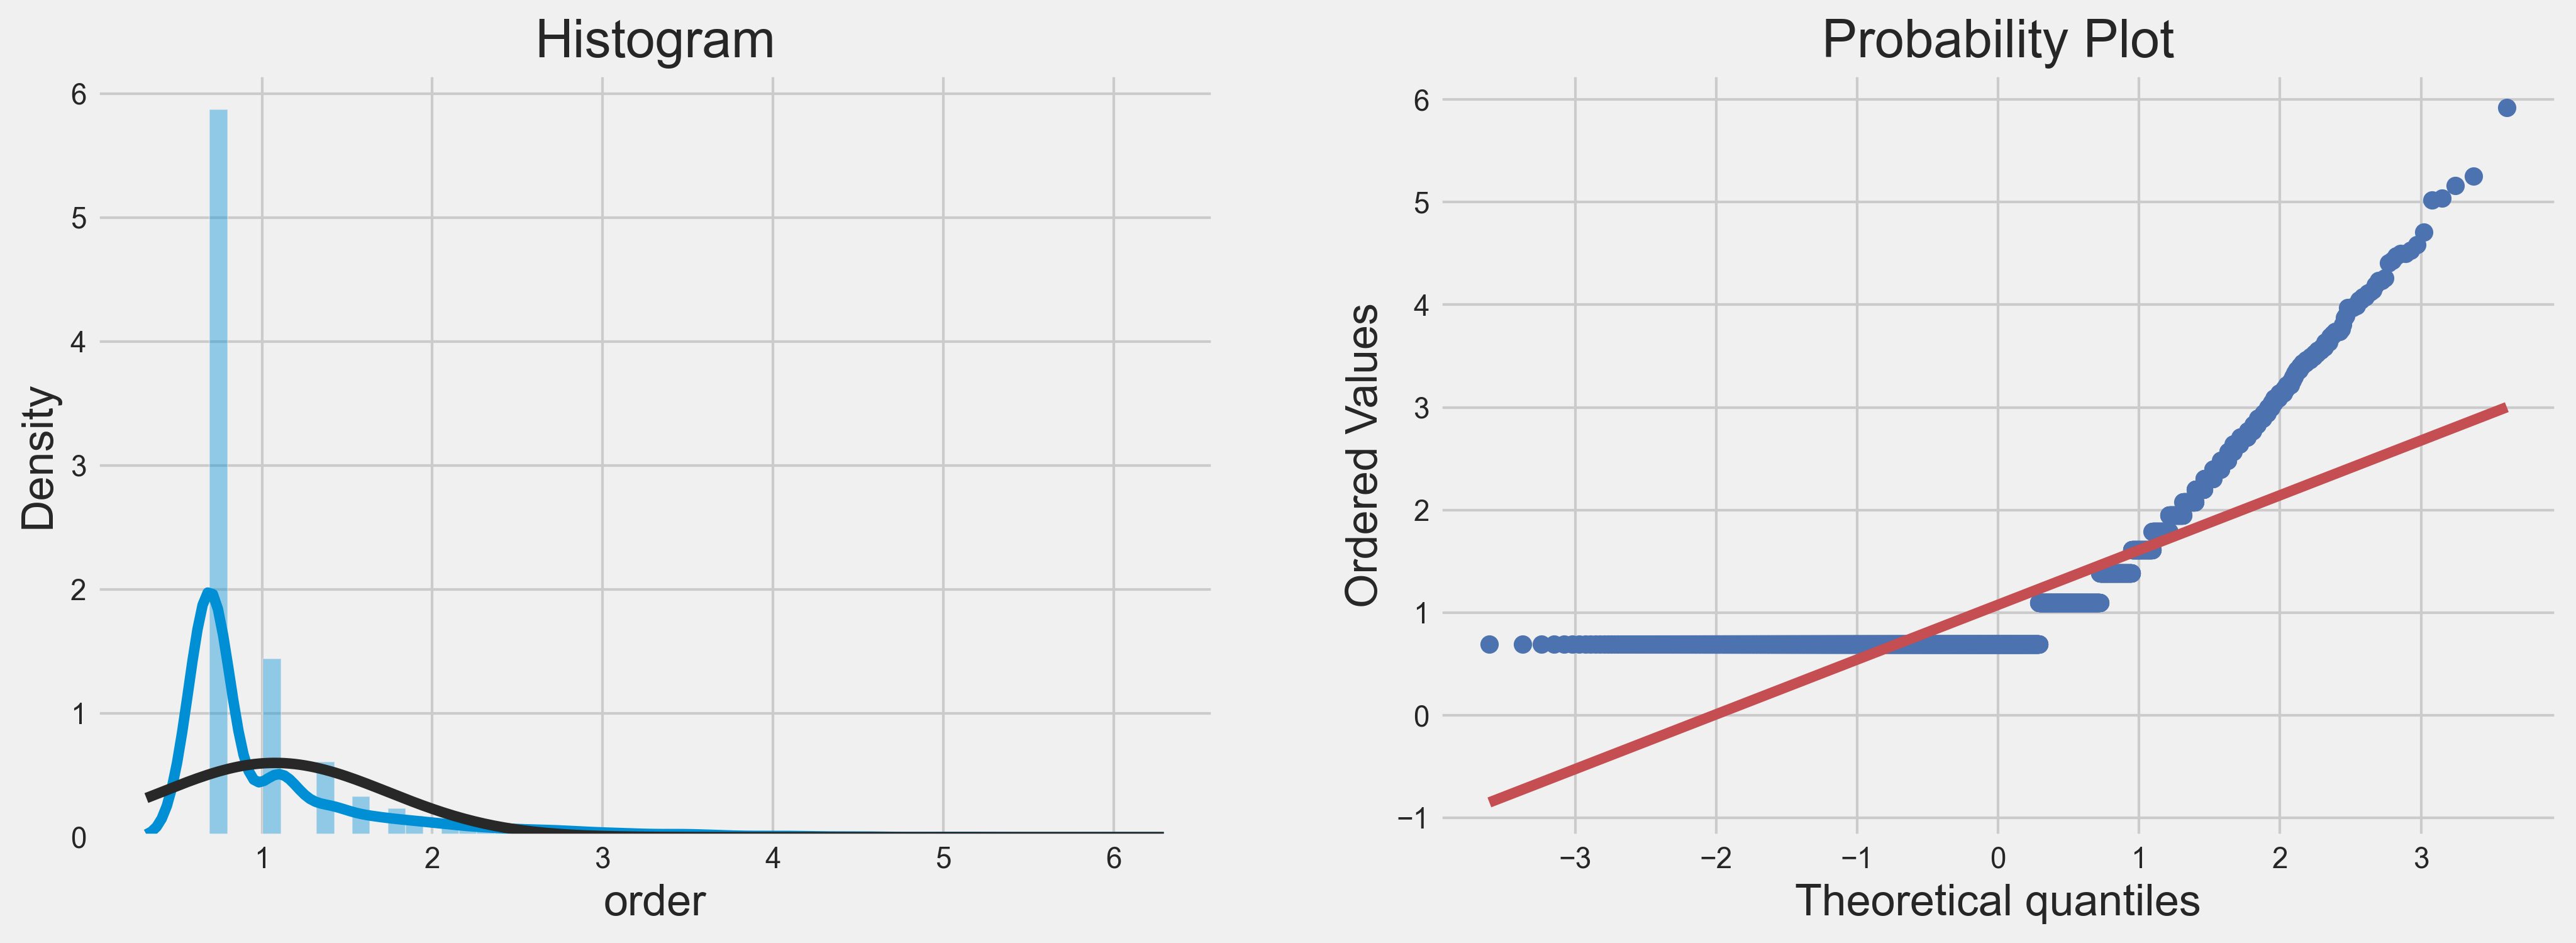

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['order'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['order'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['order'], plot=ax2)


df["order"] = np.log1p(df["order"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['order'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['order'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['order'], plot=ax2)

plt.show()

Skewness Co-efficient: 30.793
Skewness Co-efficient: 0.875312


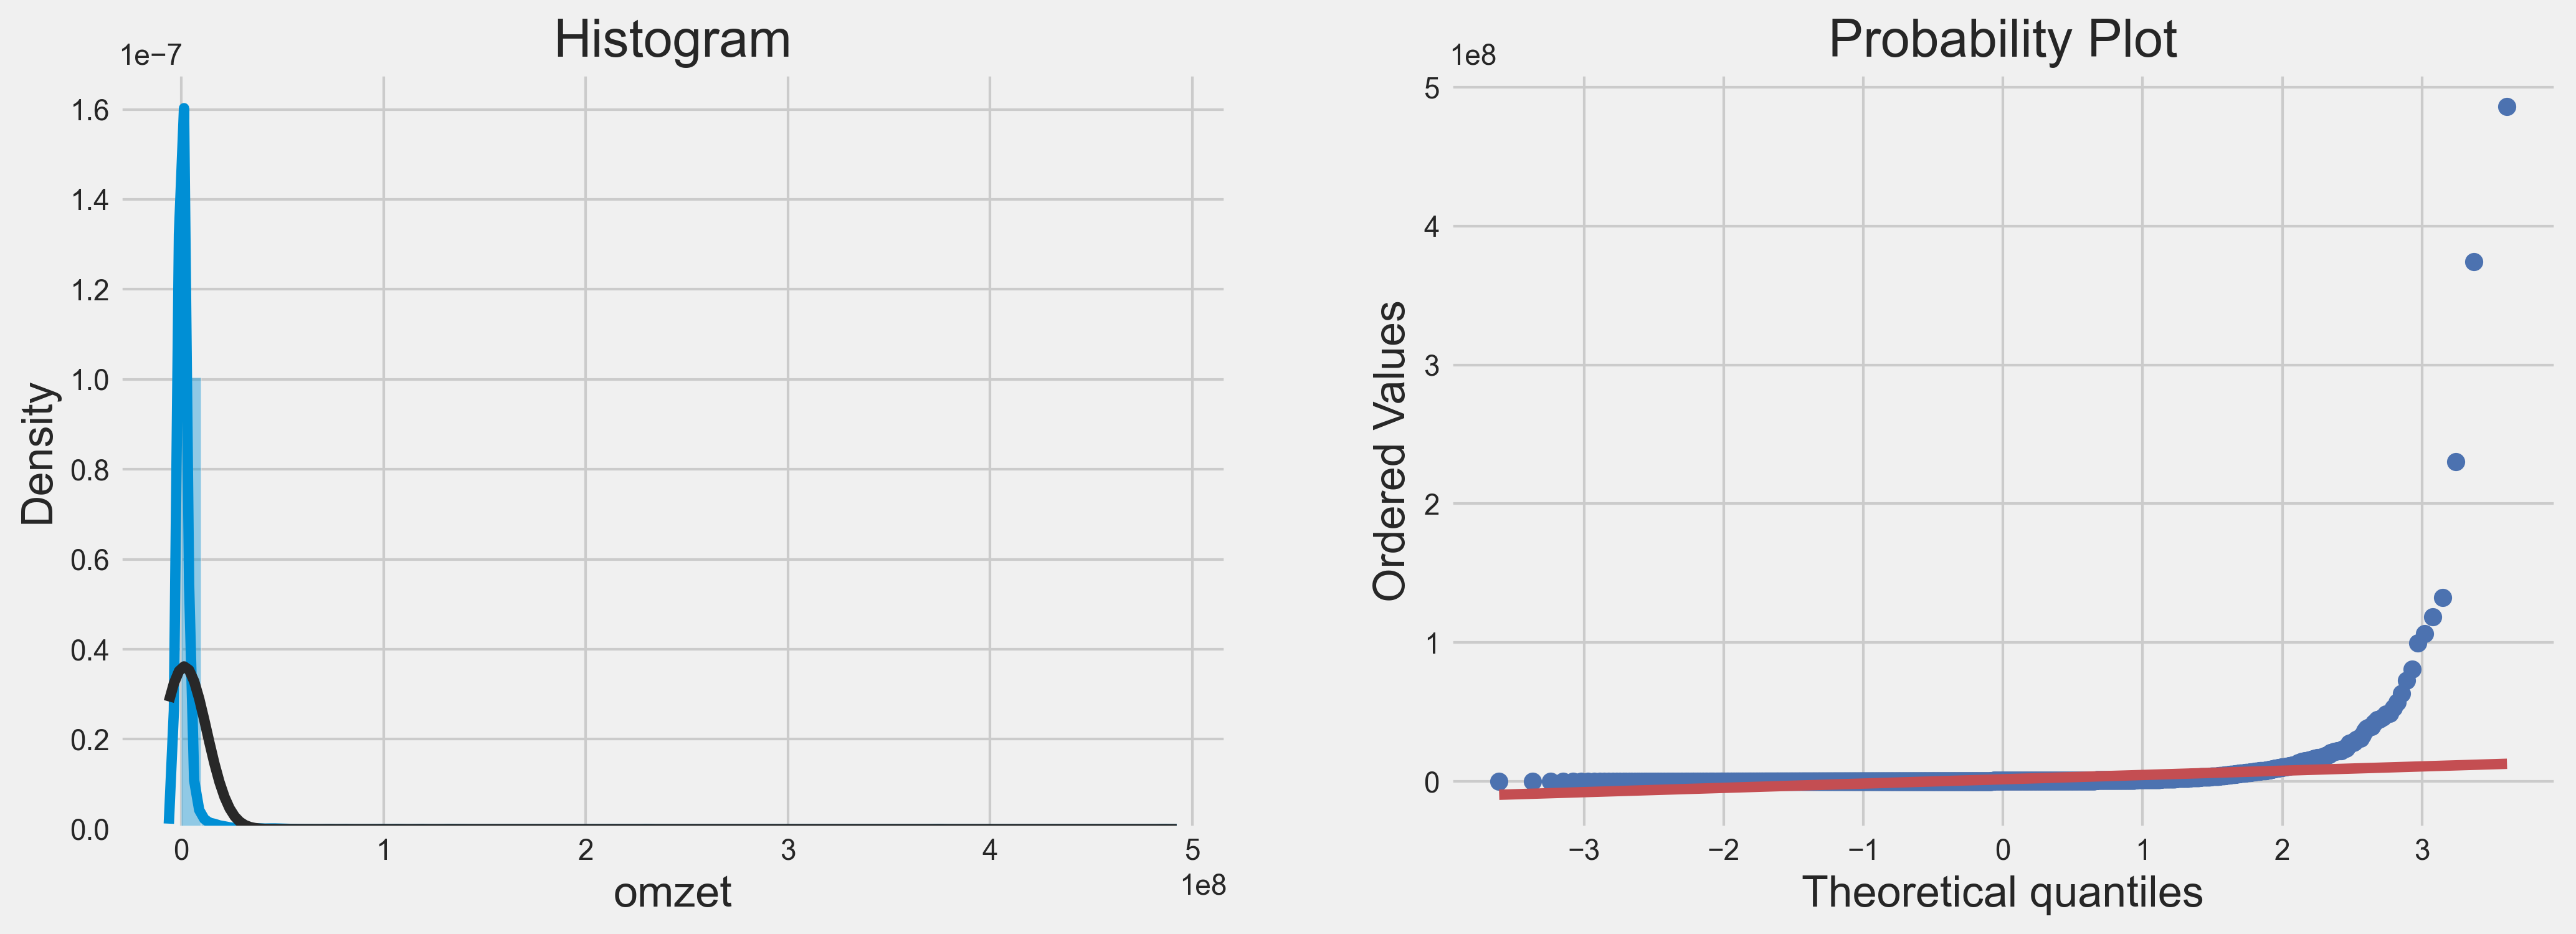

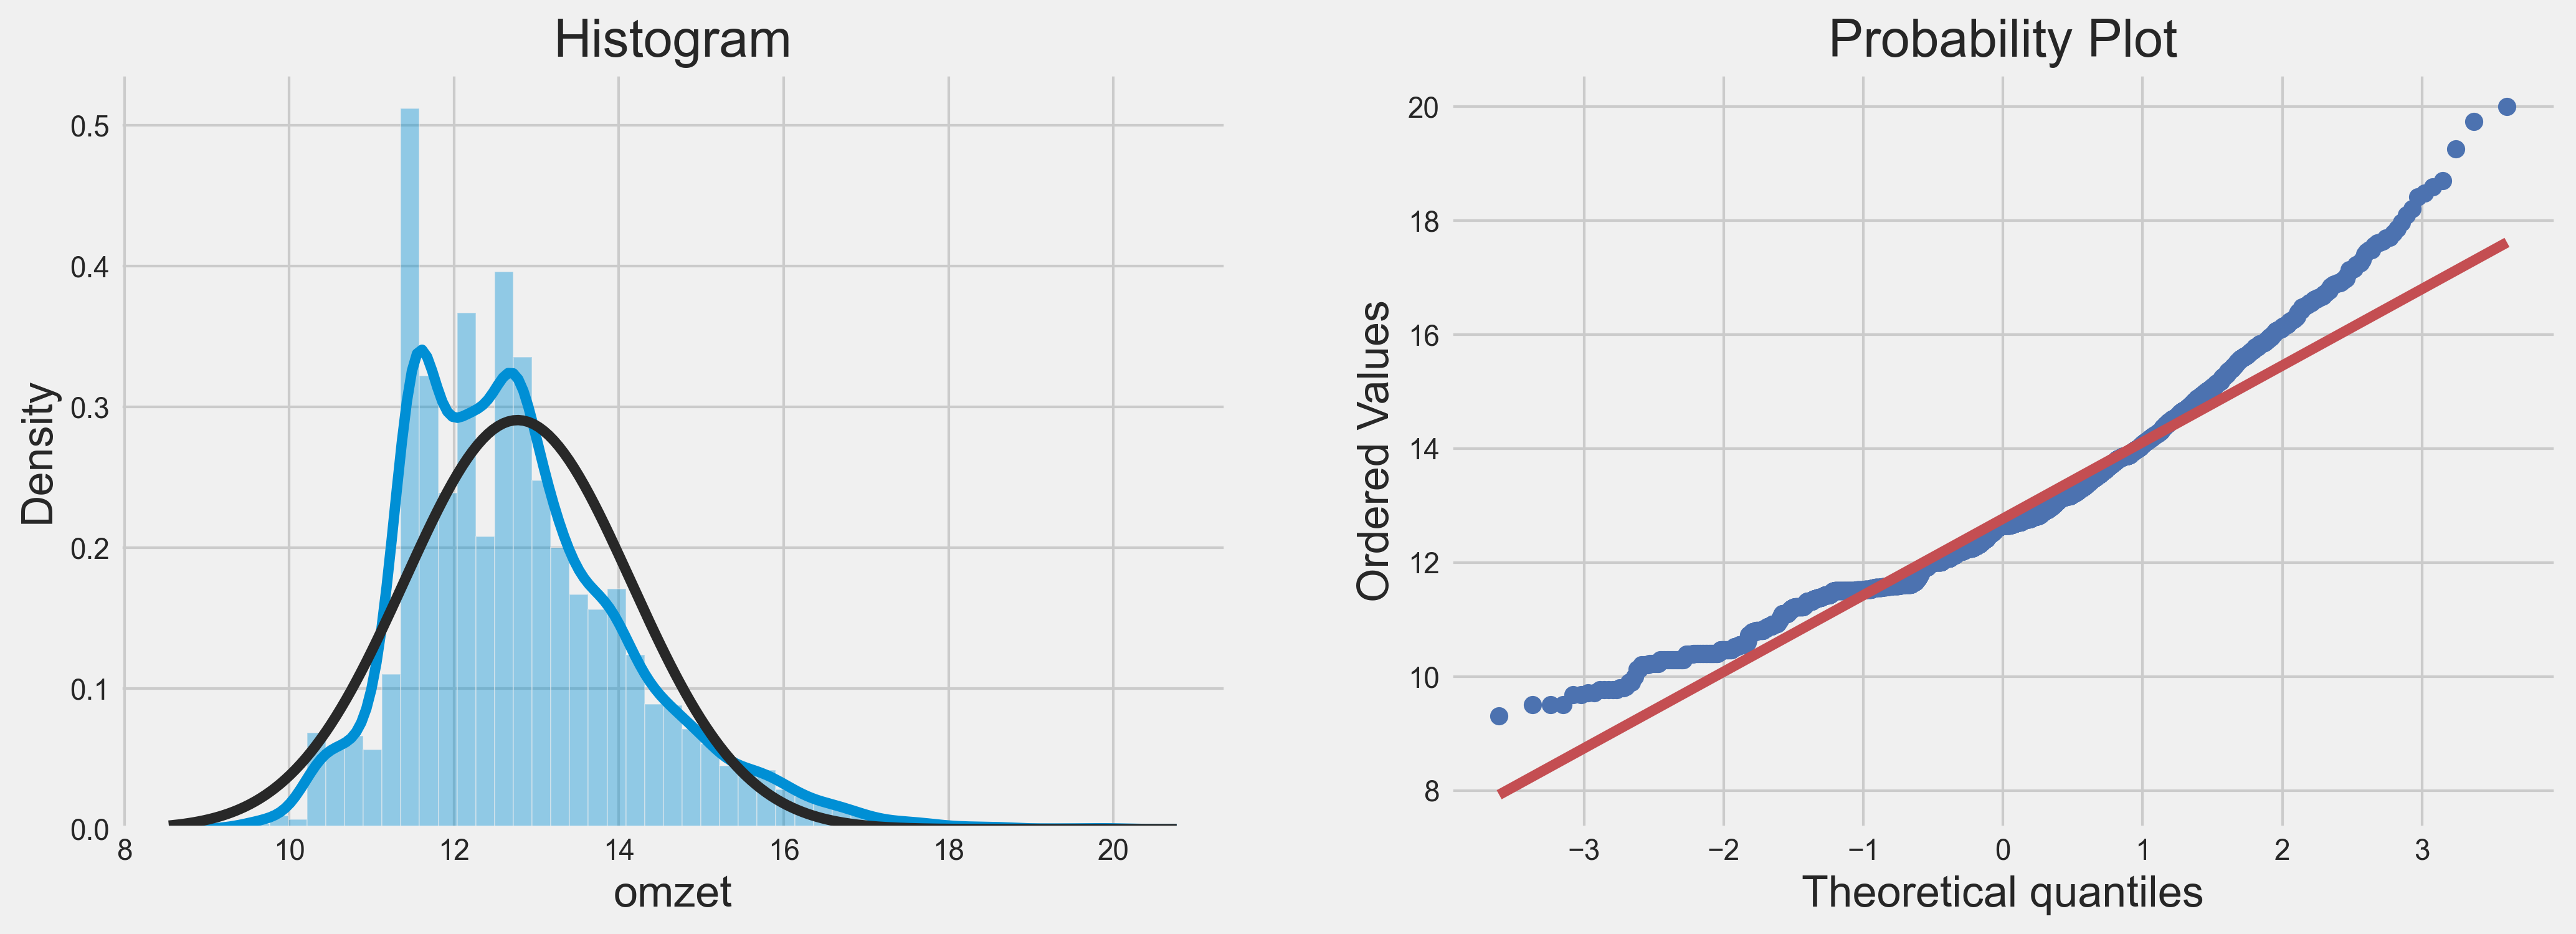

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['omzet'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['omzet'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['omzet'], plot=ax2)


df["omzet"] = np.log1p(df["omzet"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['omzet'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['omzet'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['omzet'], plot=ax2)

plt.show()

Skewness Co-efficient: 31.926
Skewness Co-efficient: 0.940301


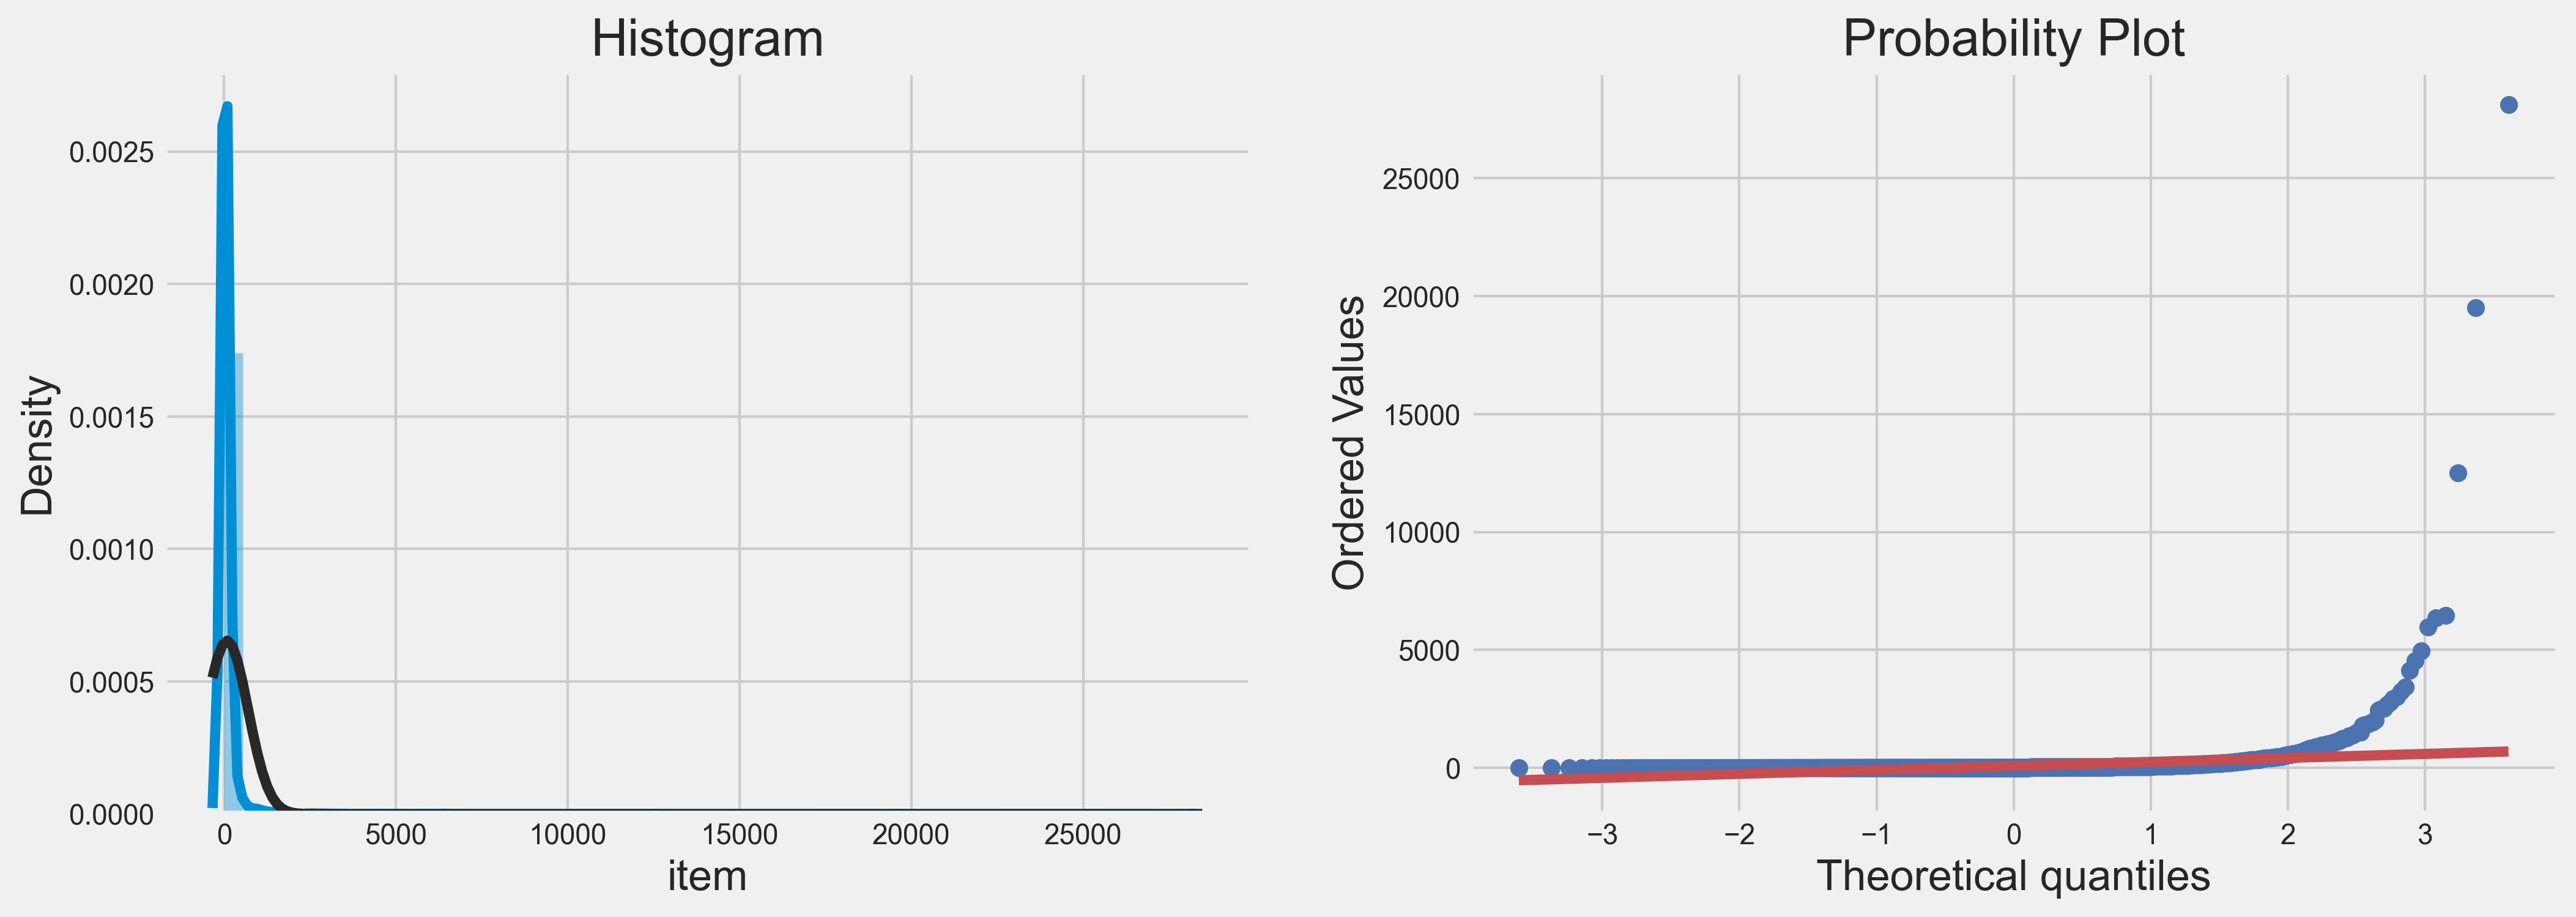

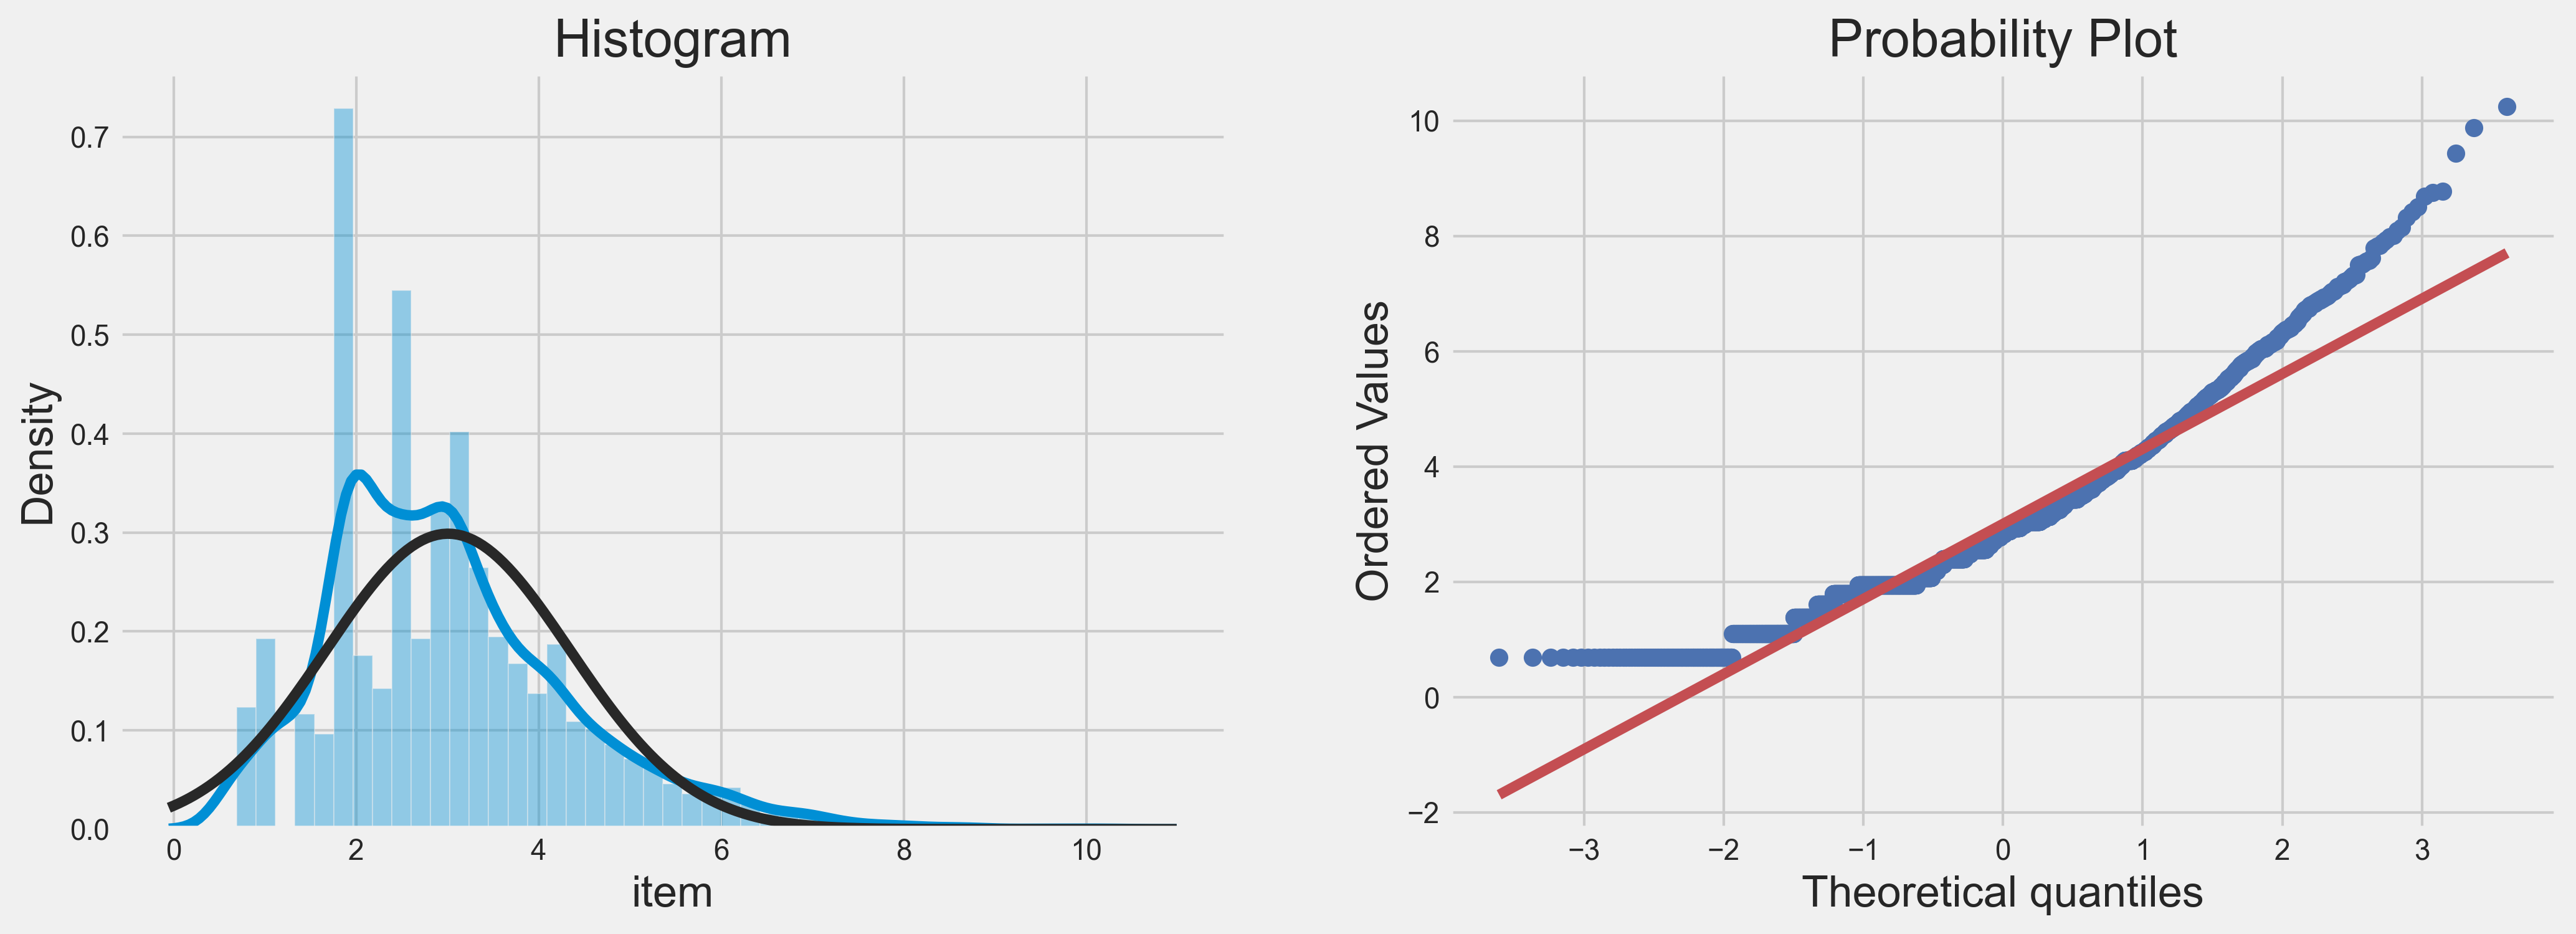

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['item'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['item'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['item'], plot=ax2)


df["item"] = np.log1p(df["item"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['item'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['item'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['item'], plot=ax2)

plt.show()

Skewness Co-efficient: 21.725
Skewness Co-efficient: -2.093146


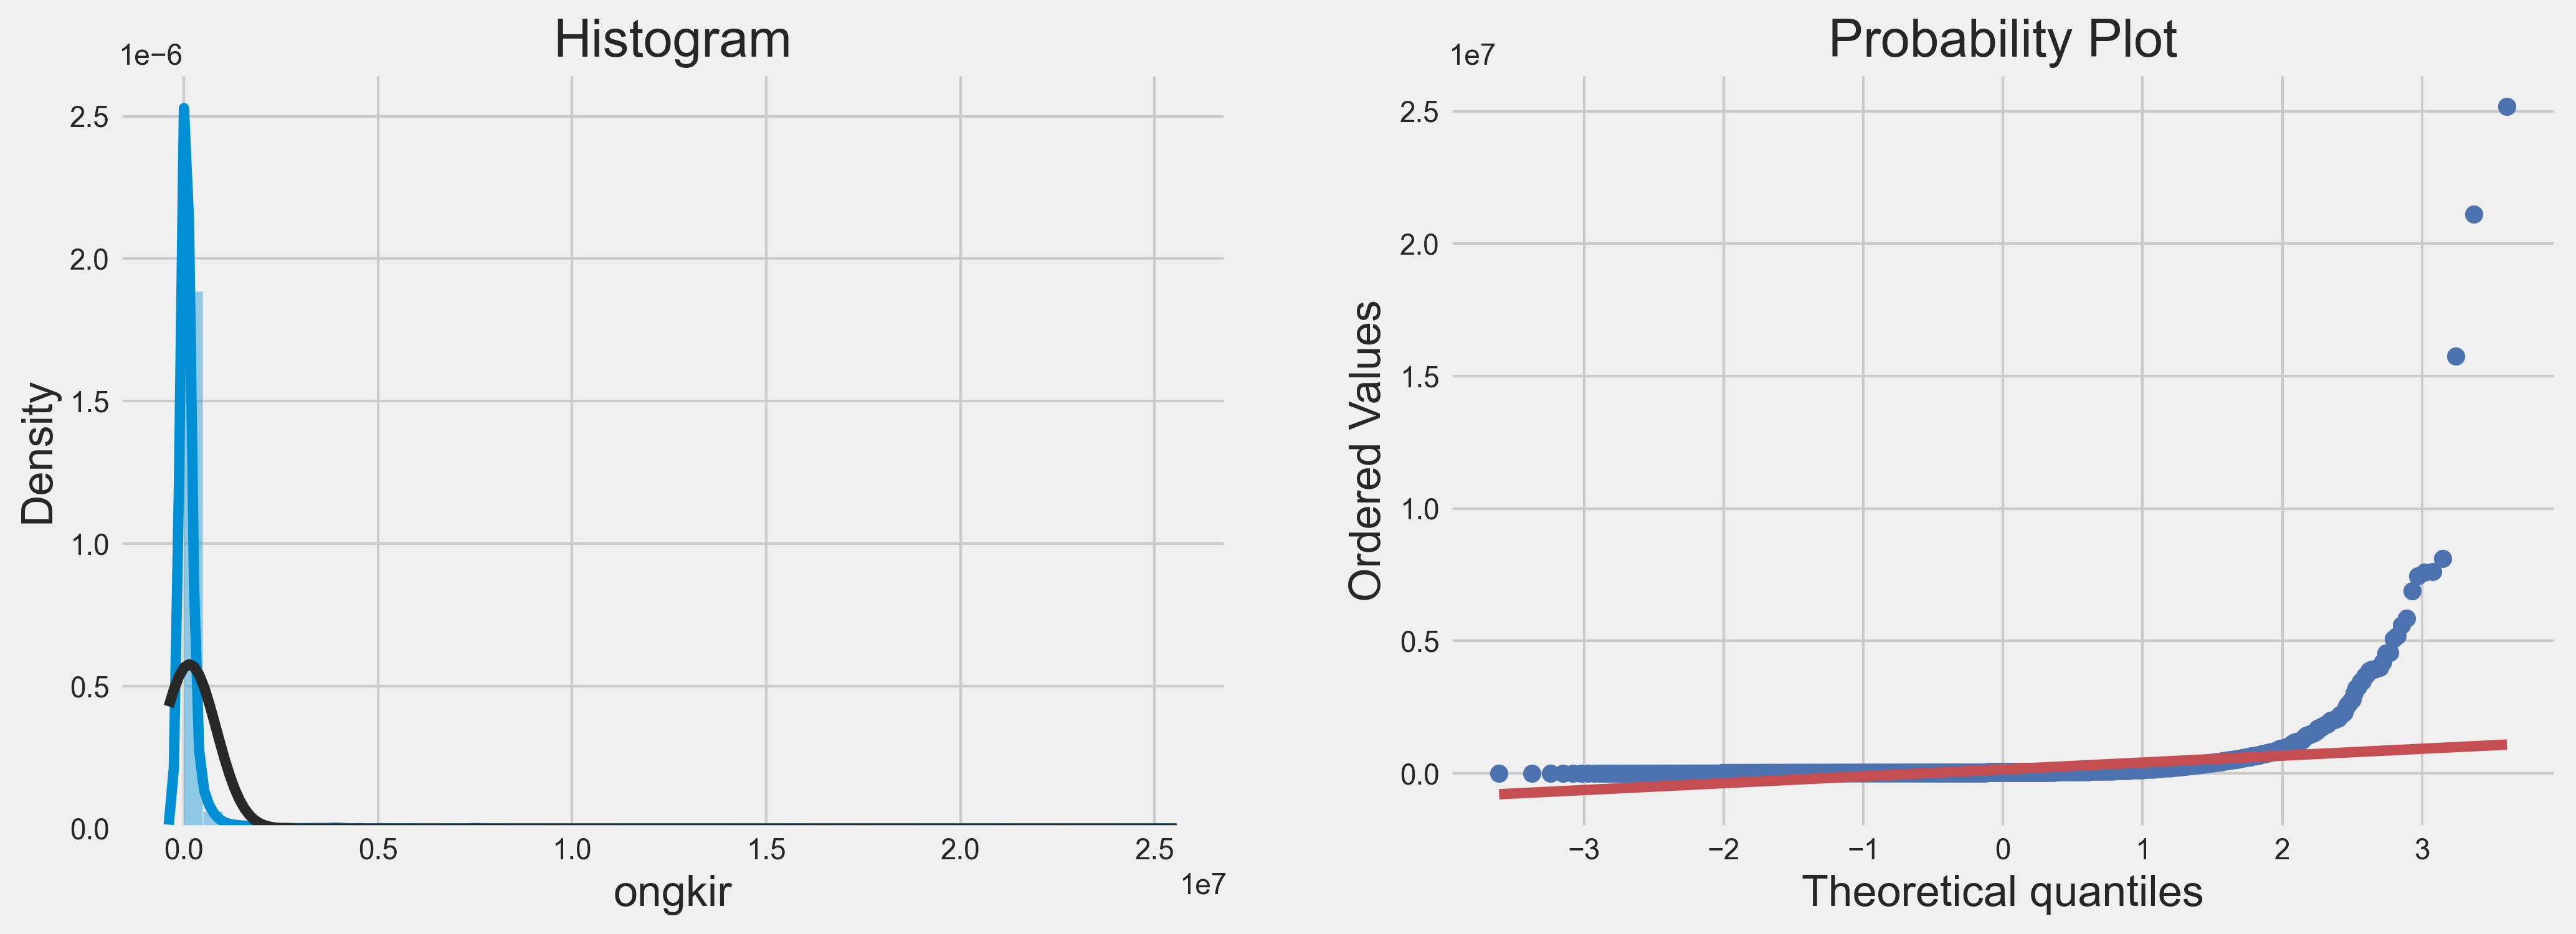

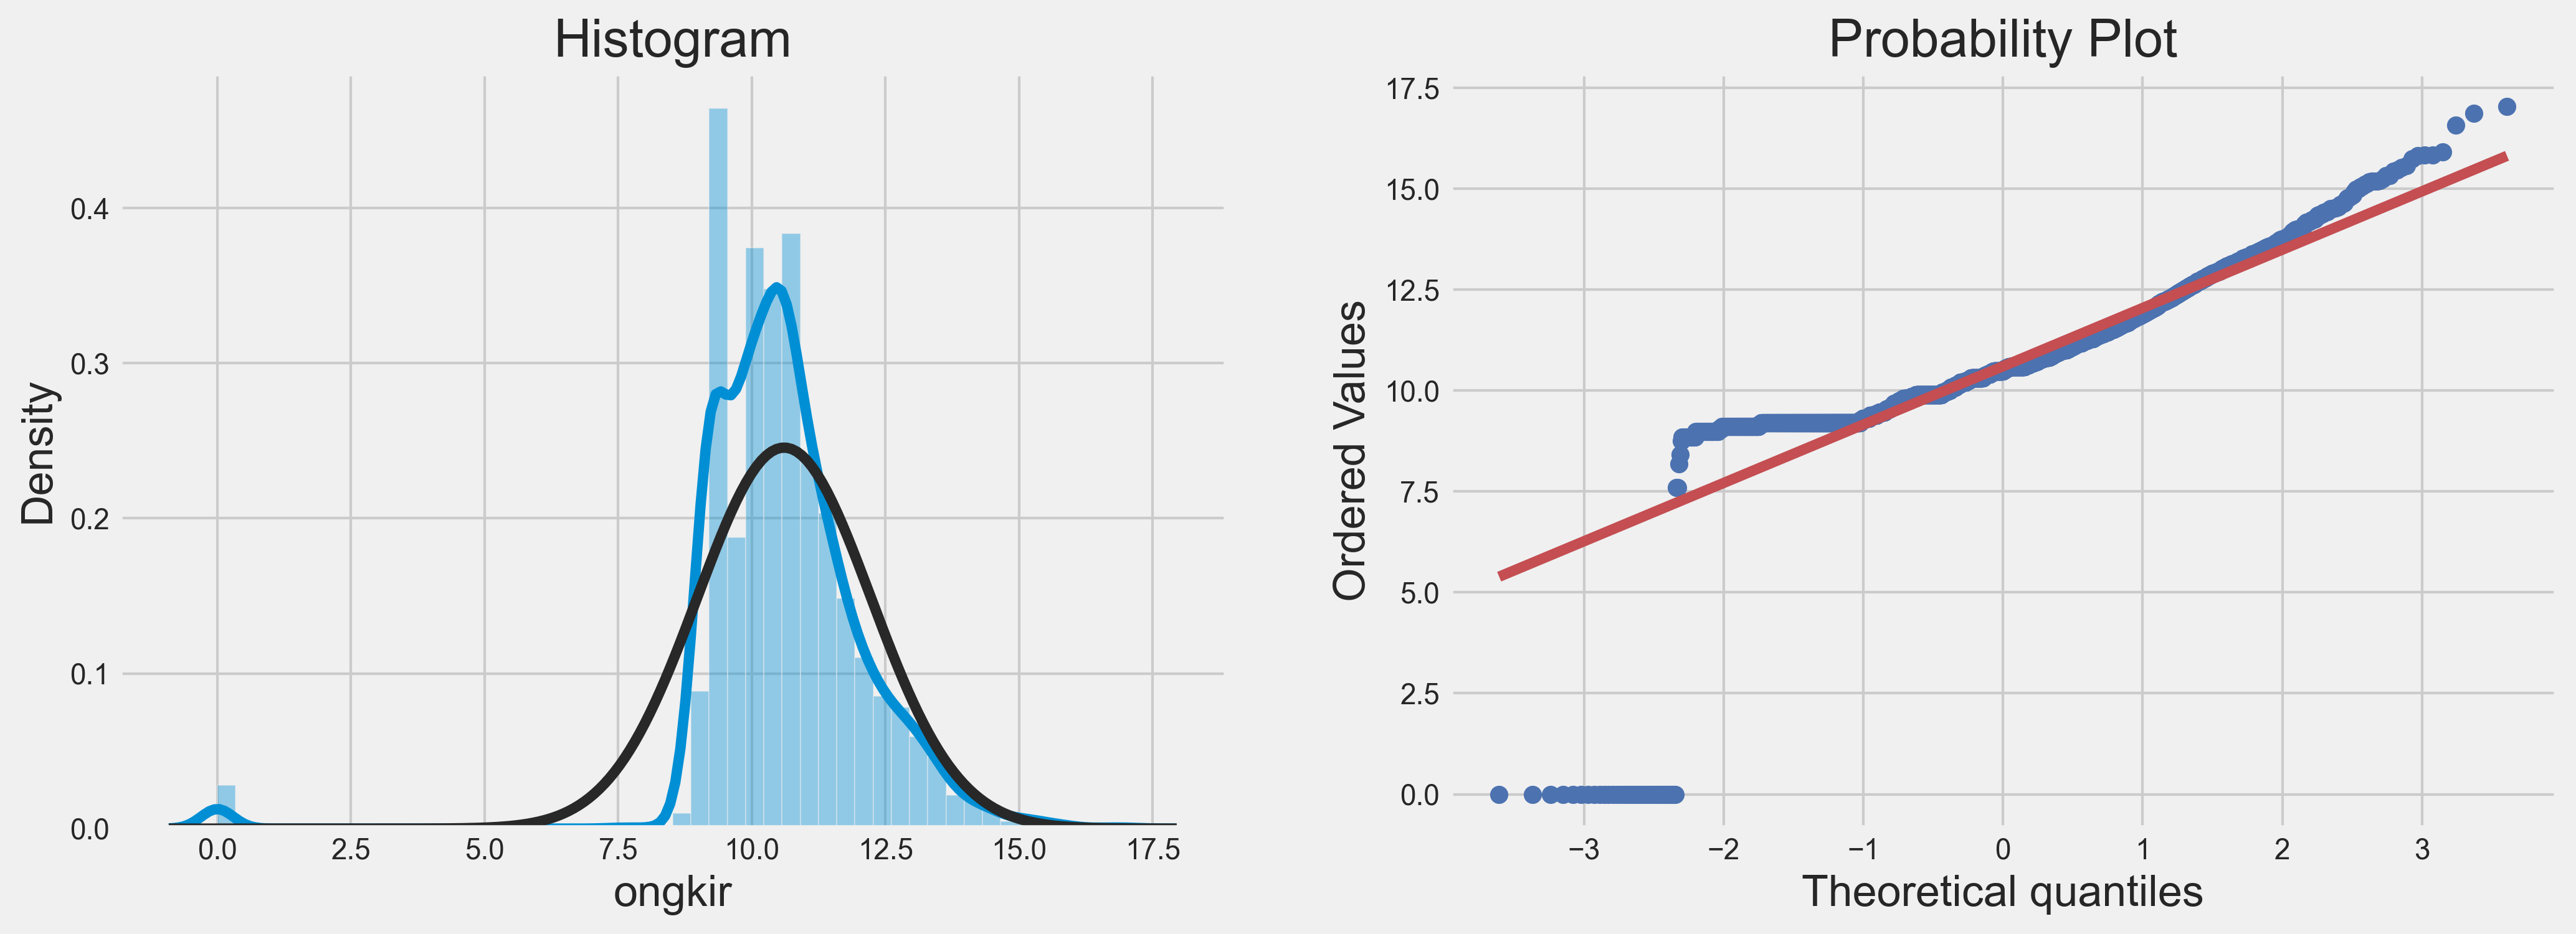

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['ongkir'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['ongkir'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['ongkir'], plot=ax2)


df['ongkir'] = np.log1p(df["ongkir"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['ongkir'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['ongkir'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['ongkir'], plot=ax2)

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Penerima        4505 non-null   object 
 1   order           4505 non-null   float64
 2   omzet           4505 non-null   float64
 3   item            4505 non-null   float64
 4   ongkir          4505 non-null   float64
 5   diskon          4505 non-null   int64  
 6   diskon(%)       4505 non-null   int64  
 7   omzet/order     4505 non-null   int64  
 8   omzet/bulan     4505 non-null   int64  
 9   jenjang         4505 non-null   object 
 10  kota            4505 non-null   object 
 11  promo           4505 non-null   int64  
 12  numer_of_promo  4505 non-null   int64  
 13  gender          4505 non-null   object 
 14  usia            4505 non-null   int64  
 15  tenure          4505 non-null   int64  
 16  pekerjaan       4505 non-null   object 
 17  pendidikan      4505 non-null   o

Skewness Co-efficient: 29.456
Skewness Co-efficient: -2.12769


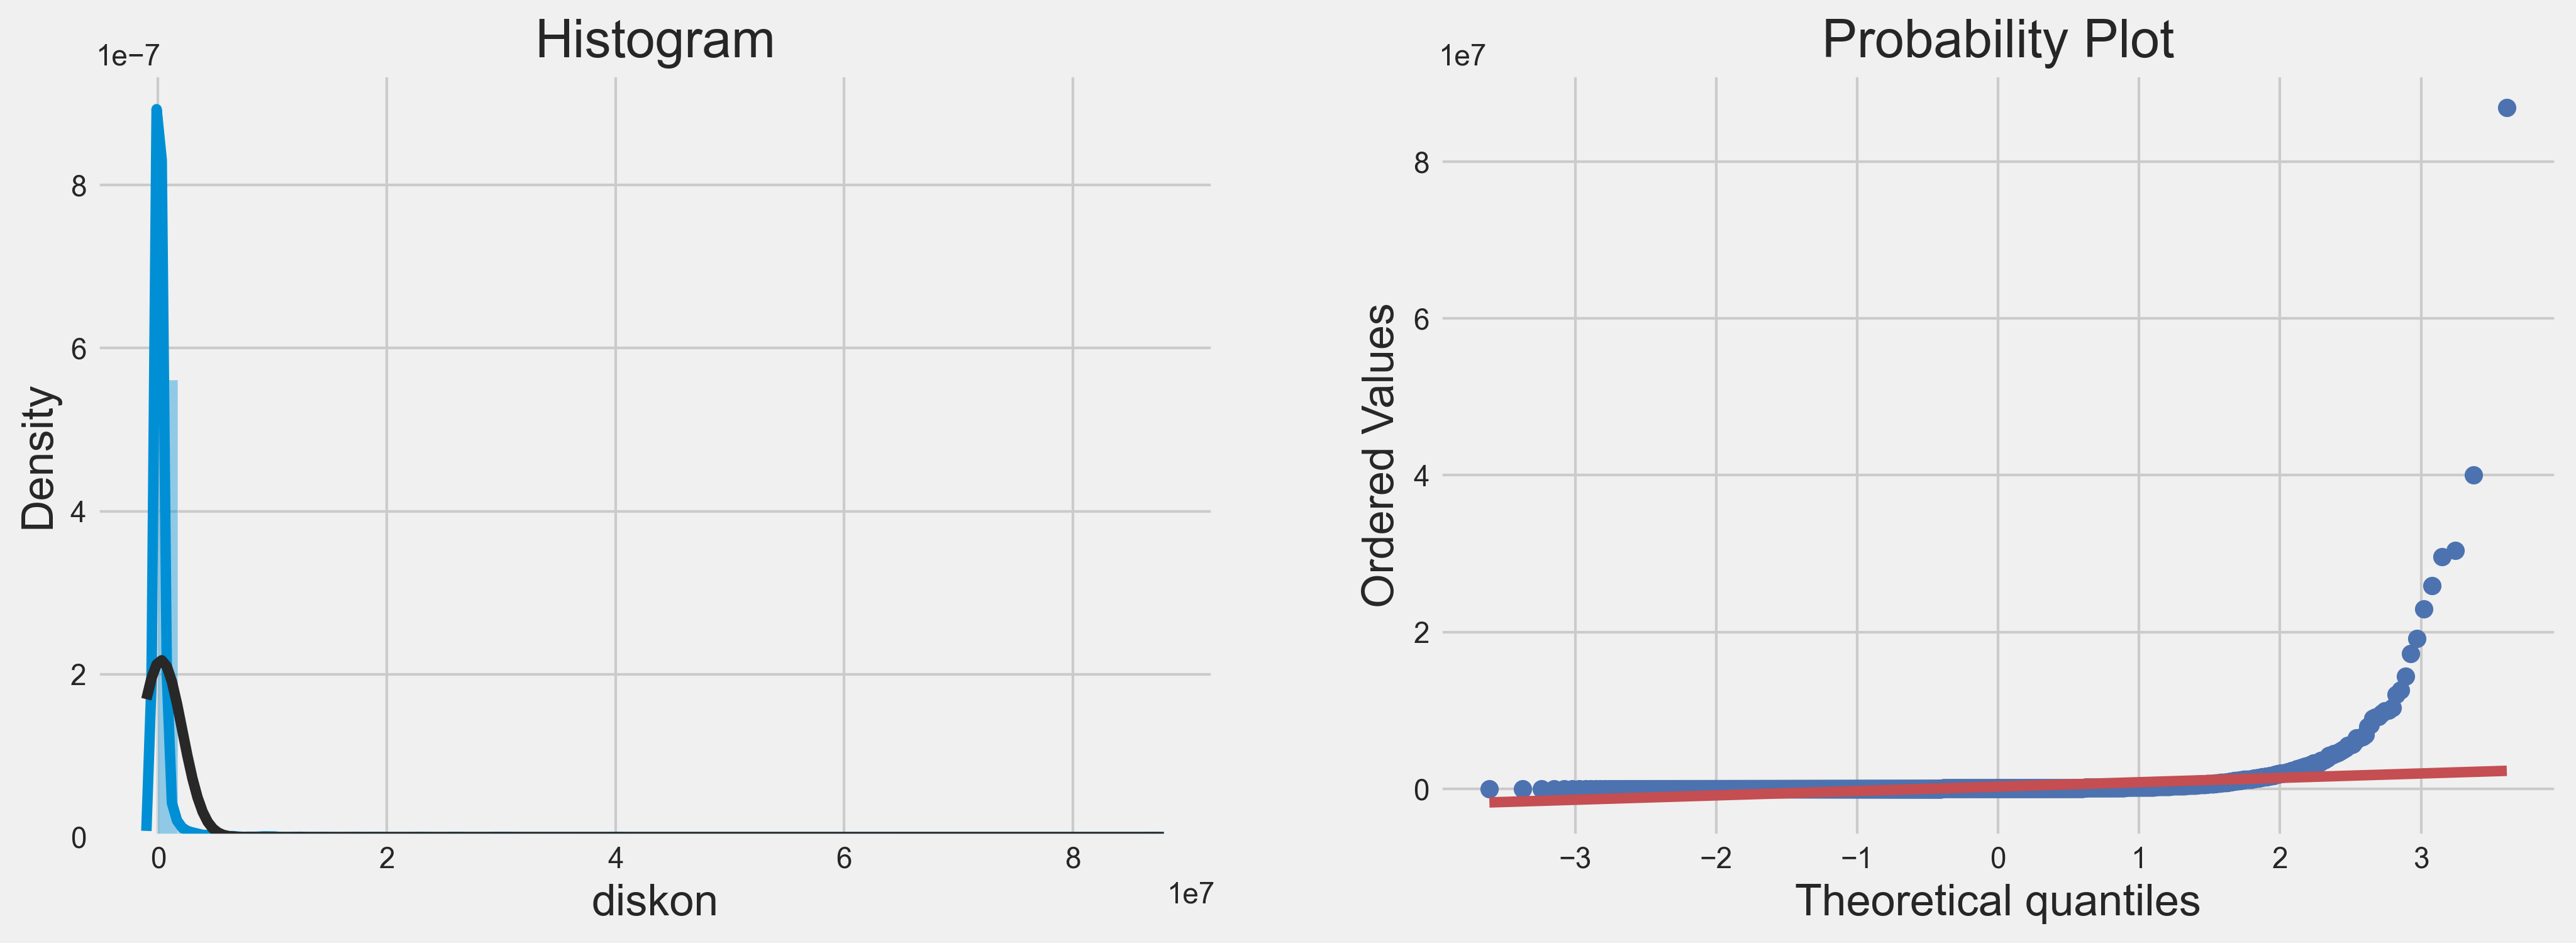

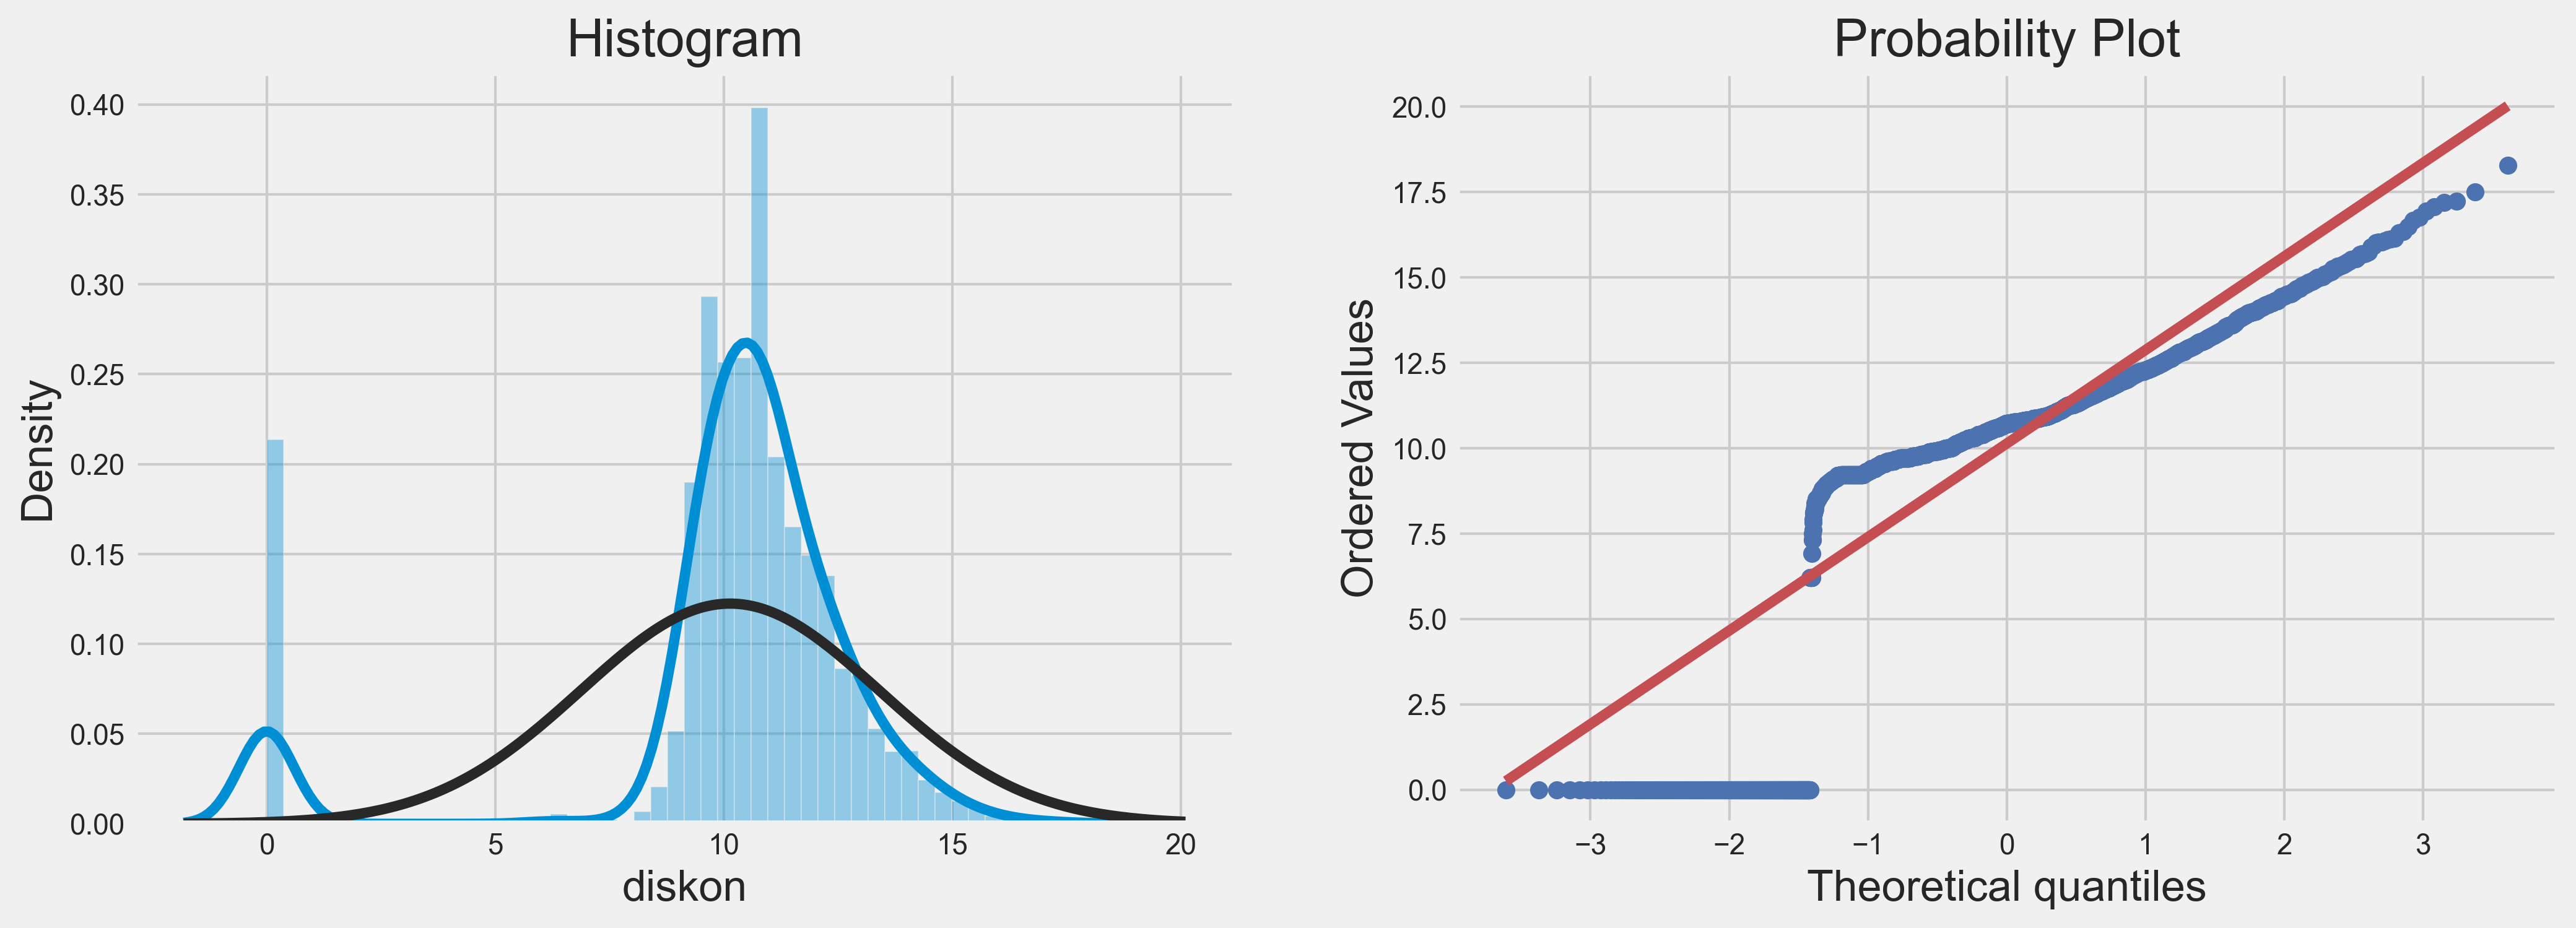

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['diskon'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['diskon'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['diskon'], plot=ax2)


df['diskon'] = np.log1p(df["diskon"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['diskon'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['diskon'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['diskon'], plot=ax2)

plt.show()

Skewness Co-efficient: 15.933
Skewness Co-efficient: -1.614466


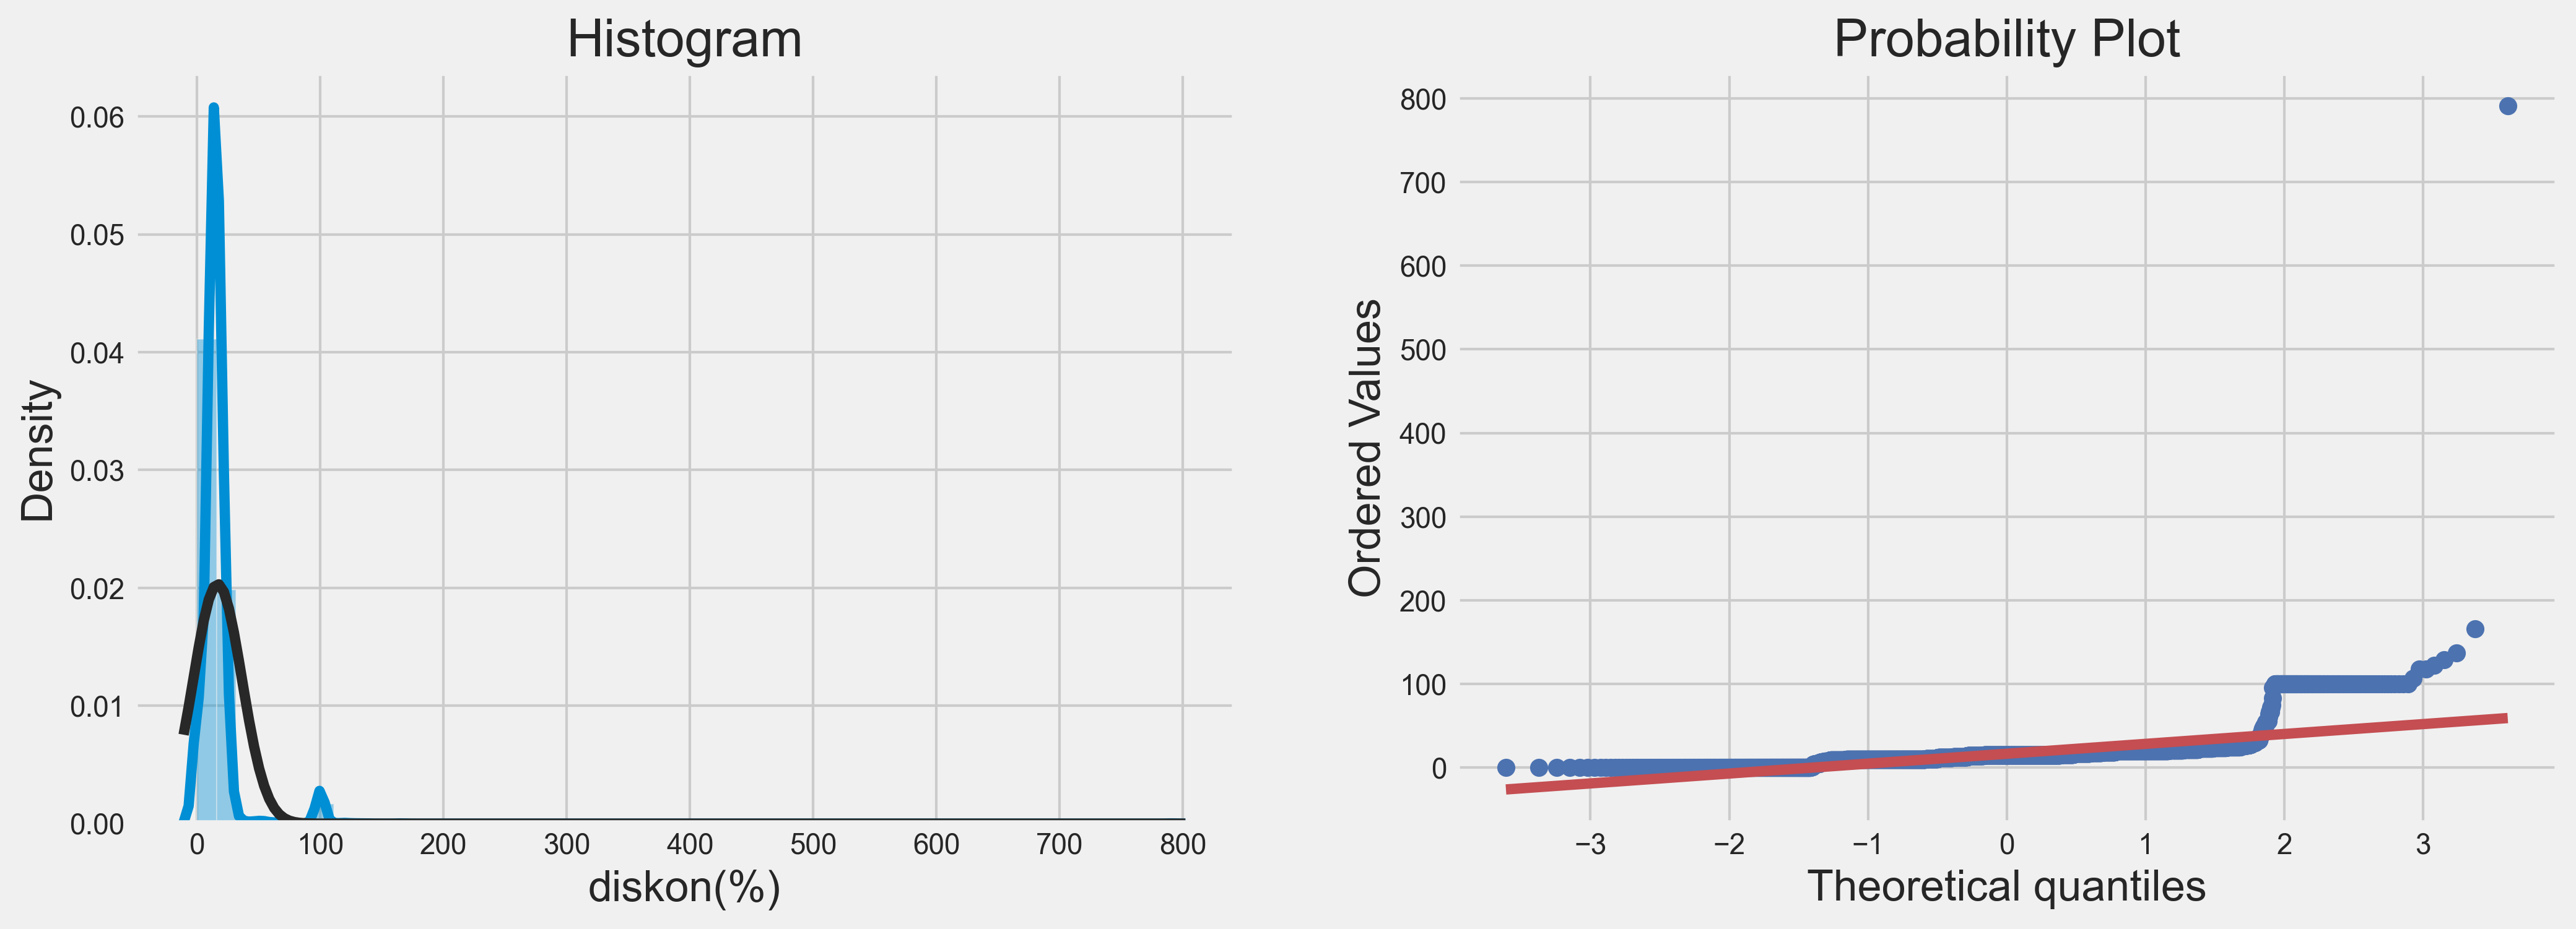

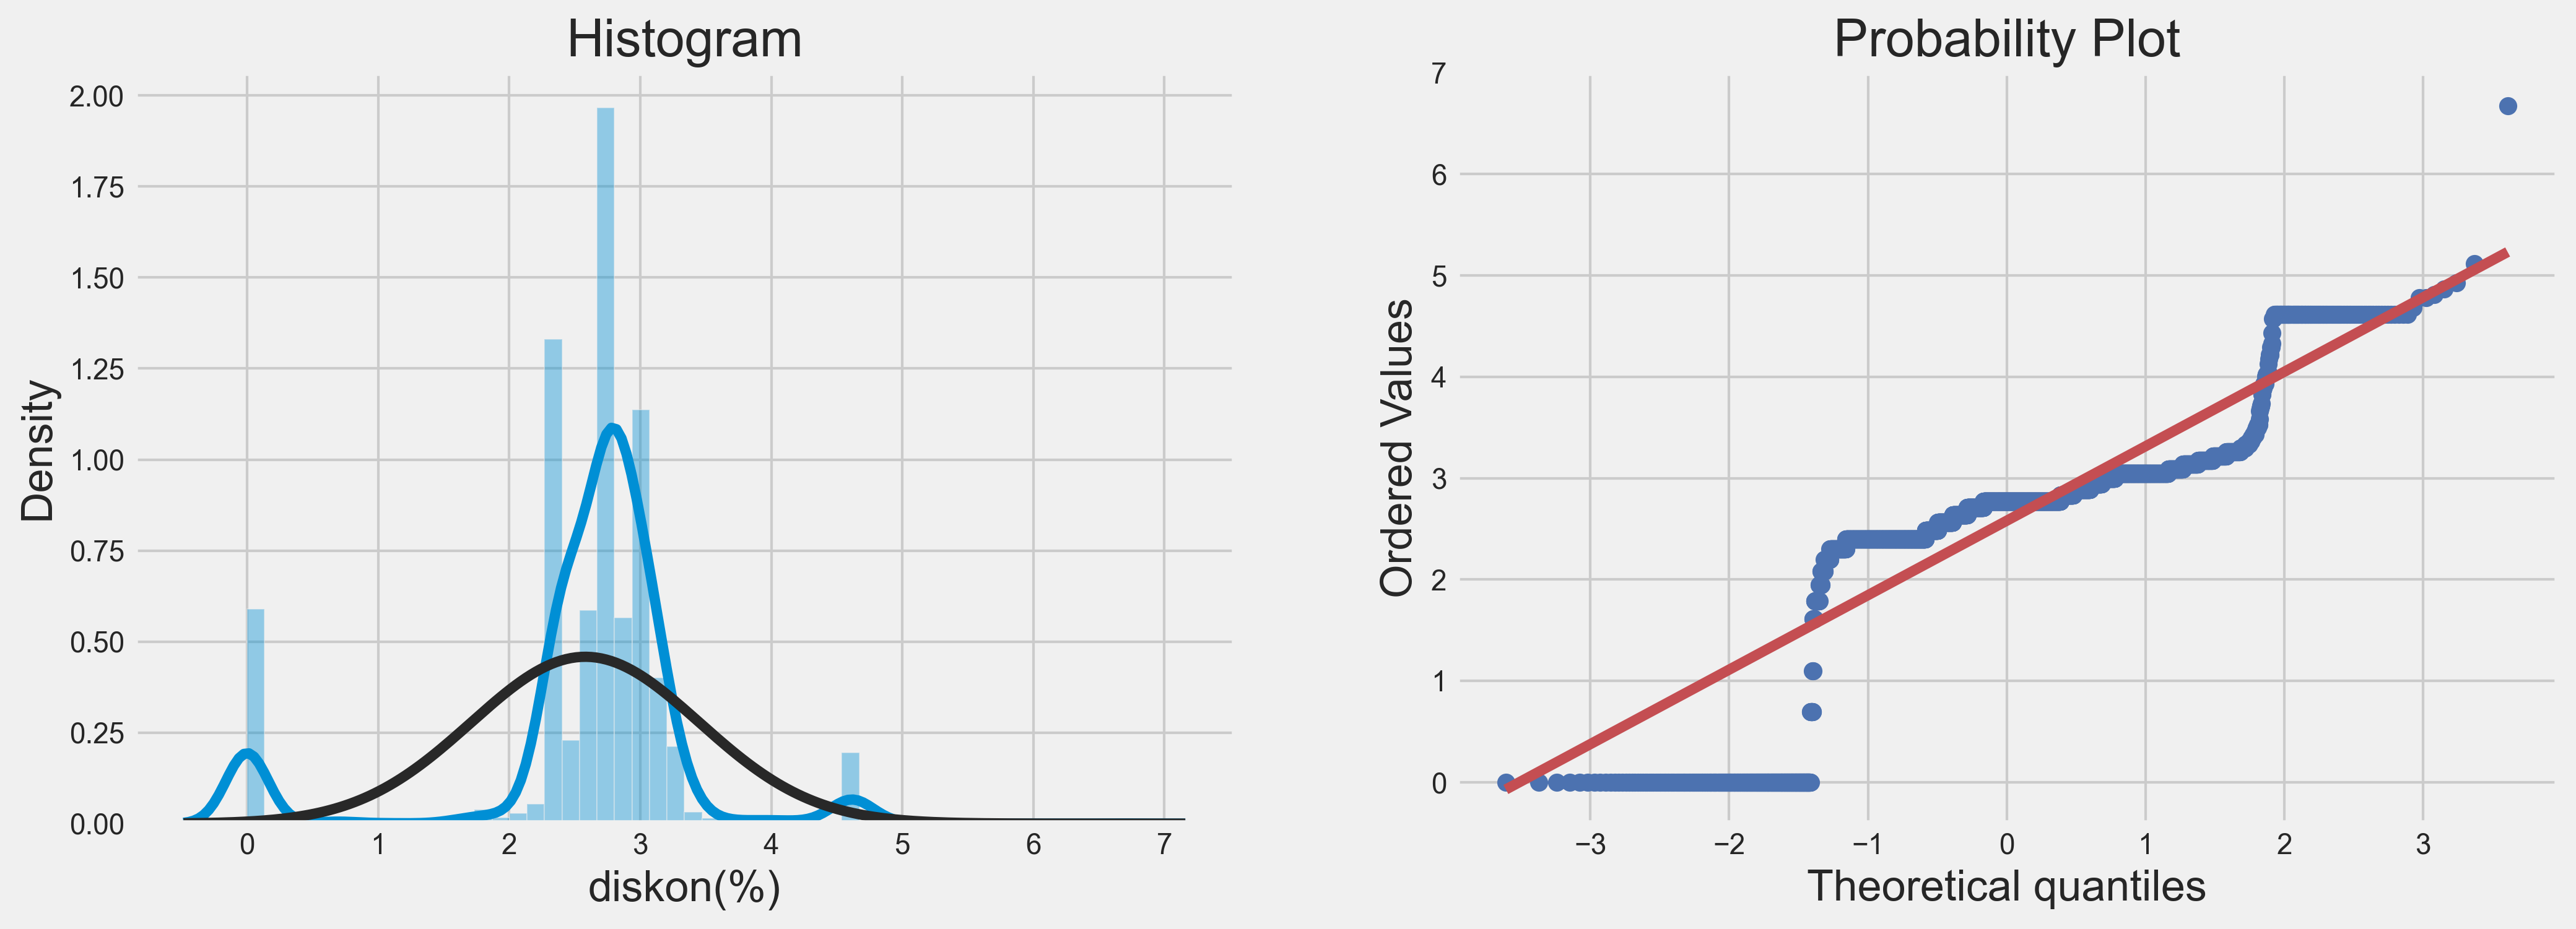

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['diskon(%)'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['diskon(%)'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['diskon(%)'], plot=ax2)


df['diskon(%)'] = np.log1p(df["diskon(%)"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['diskon(%)'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['diskon(%)'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['diskon(%)'], plot=ax2)

plt.show()

Skewness Co-efficient: 40.771
Skewness Co-efficient: 0.410095


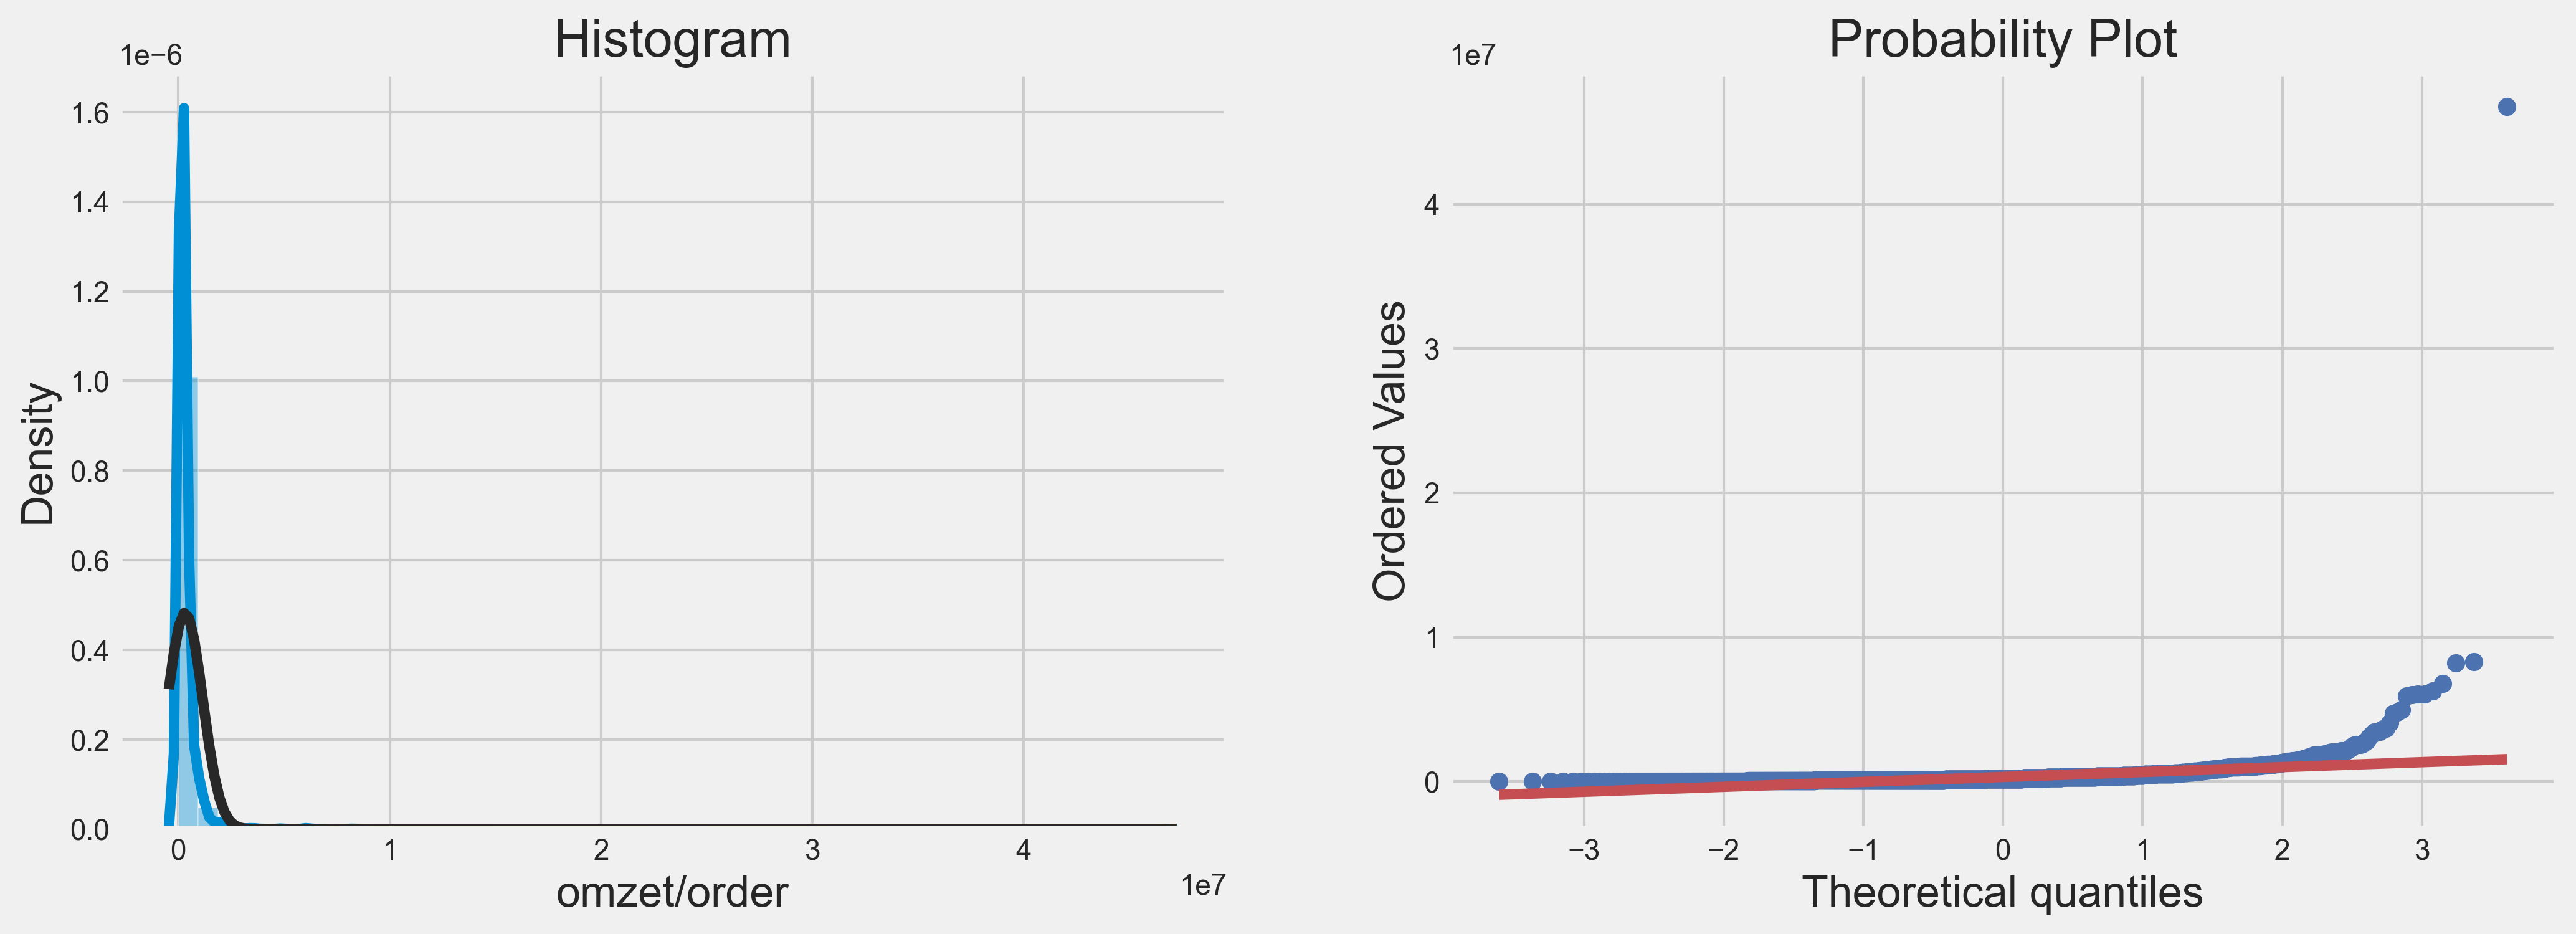

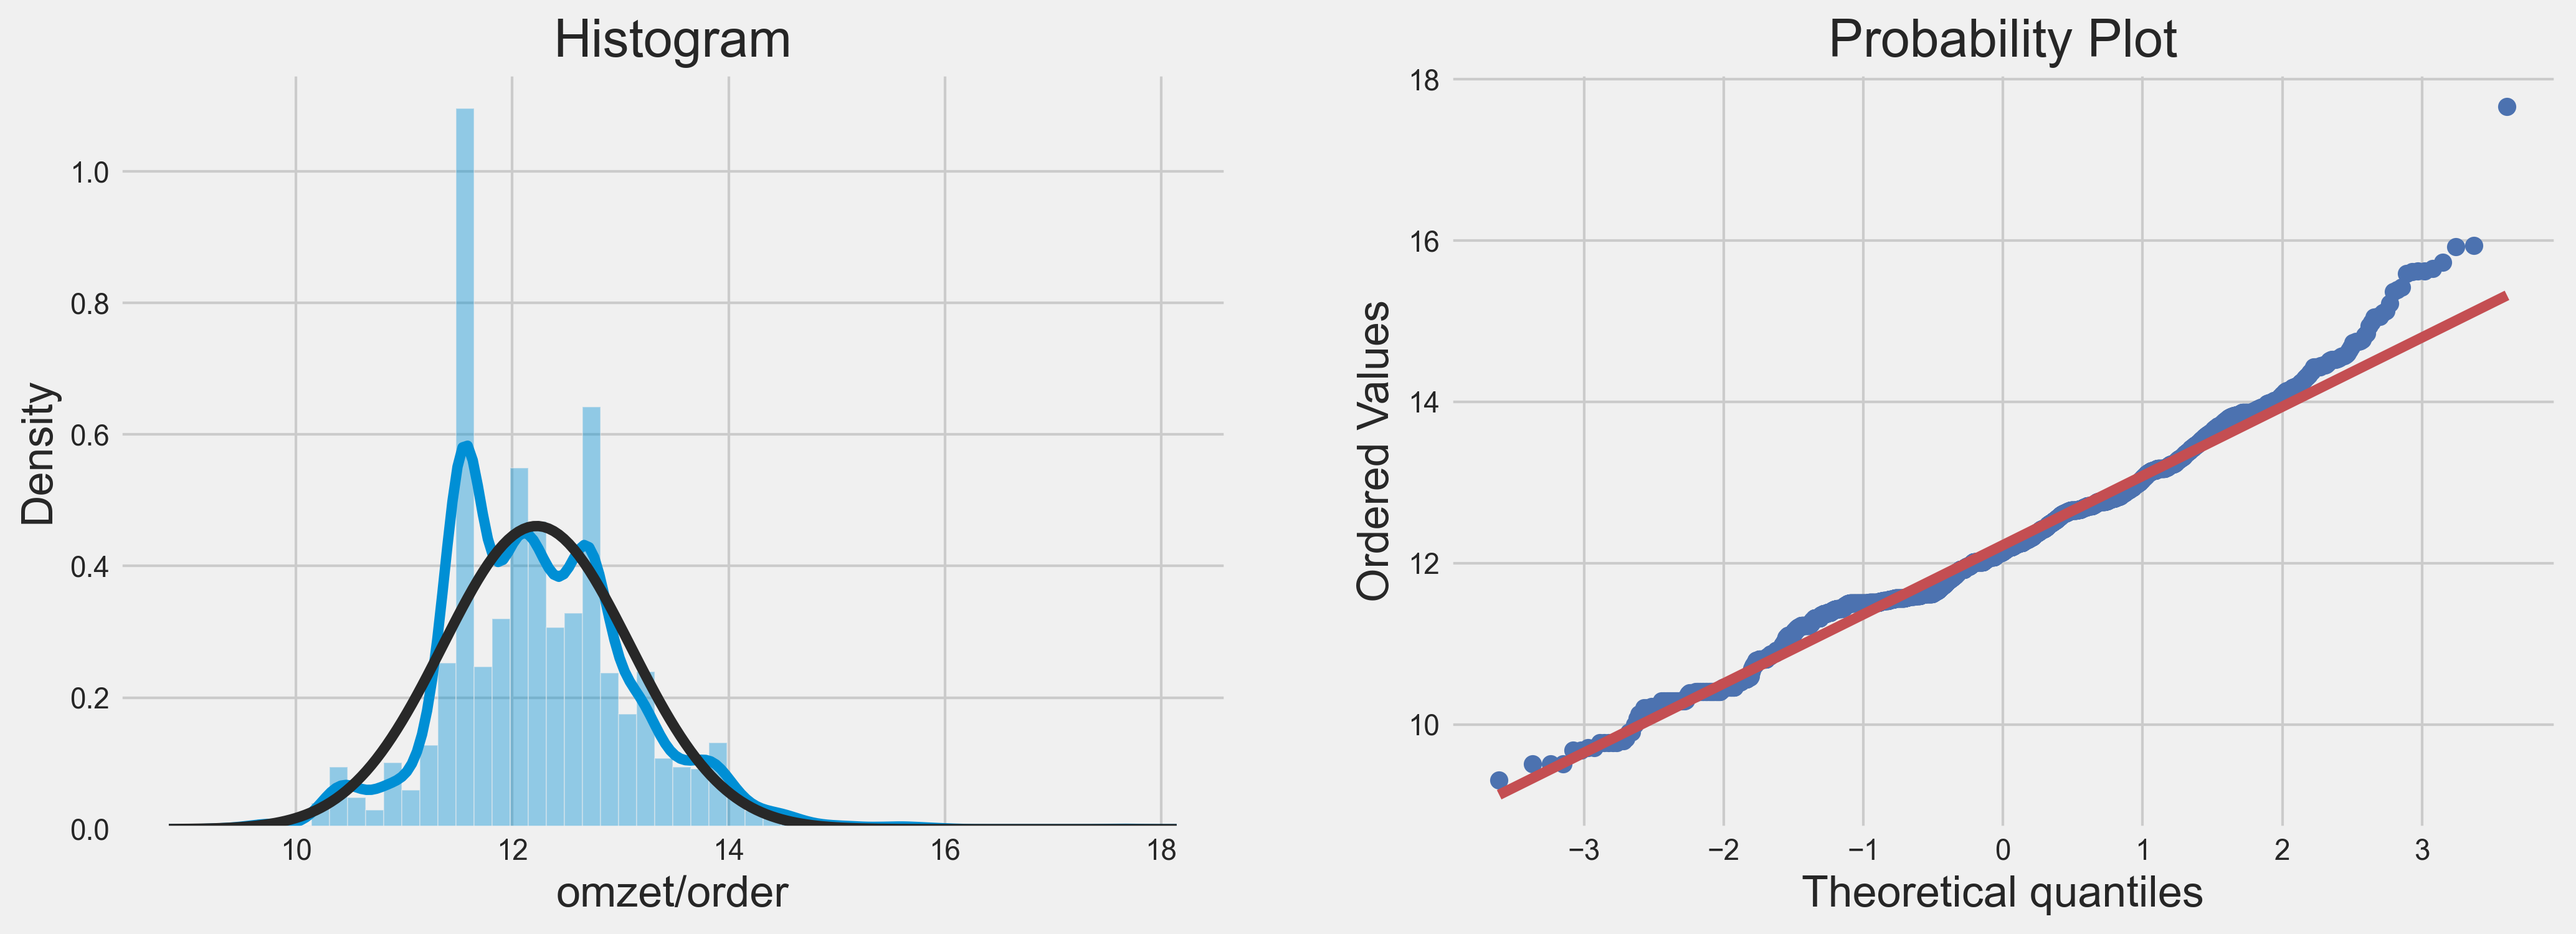

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['omzet/order'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['omzet/order'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['omzet/order'], plot=ax2)


df['omzet/order'] = np.log1p(df["omzet/order"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['omzet/order'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['omzet/order'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['omzet/order'], plot=ax2)

plt.show()

Skewness Co-efficient: 30.793
Skewness Co-efficient: 0.875451


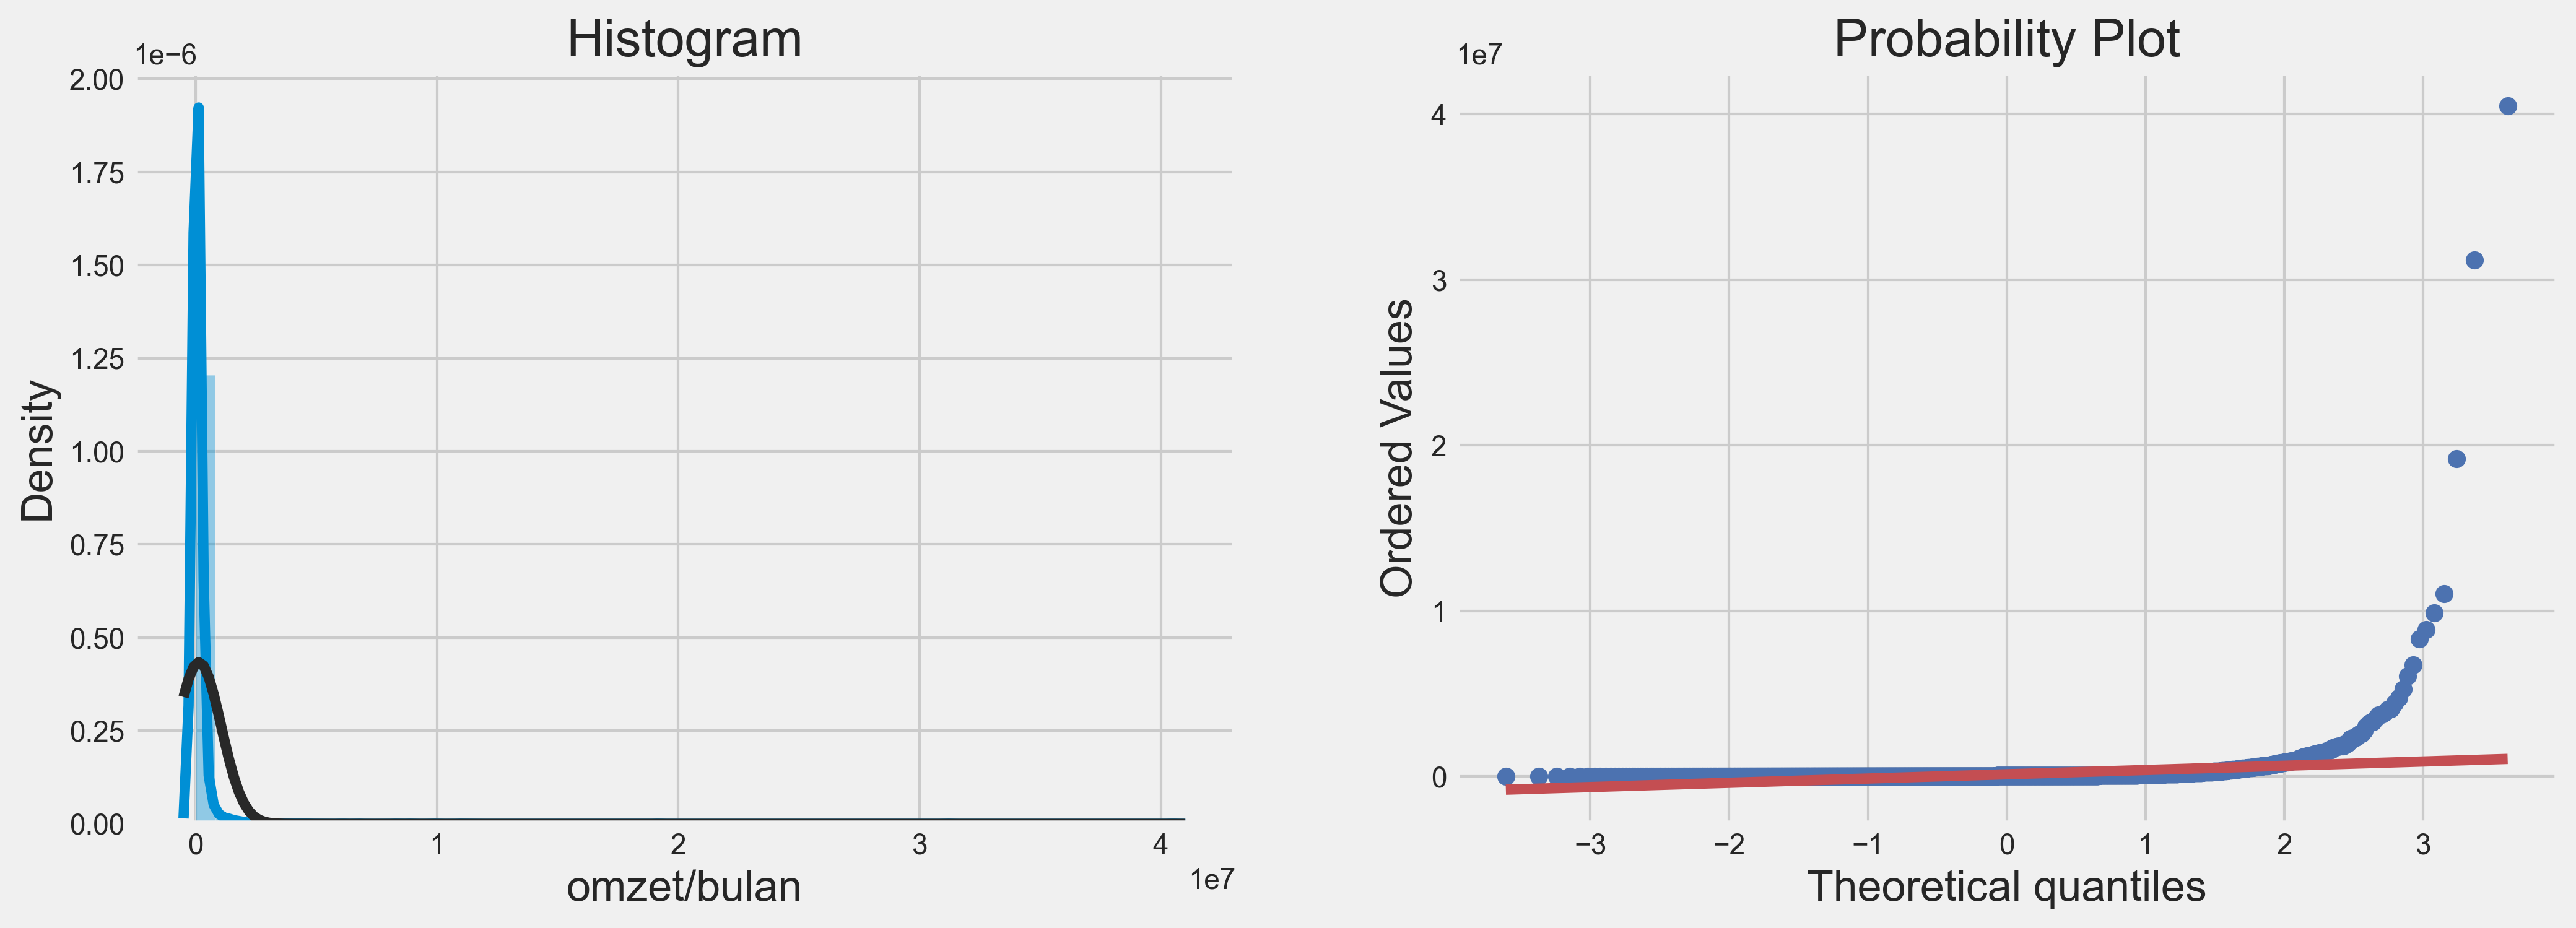

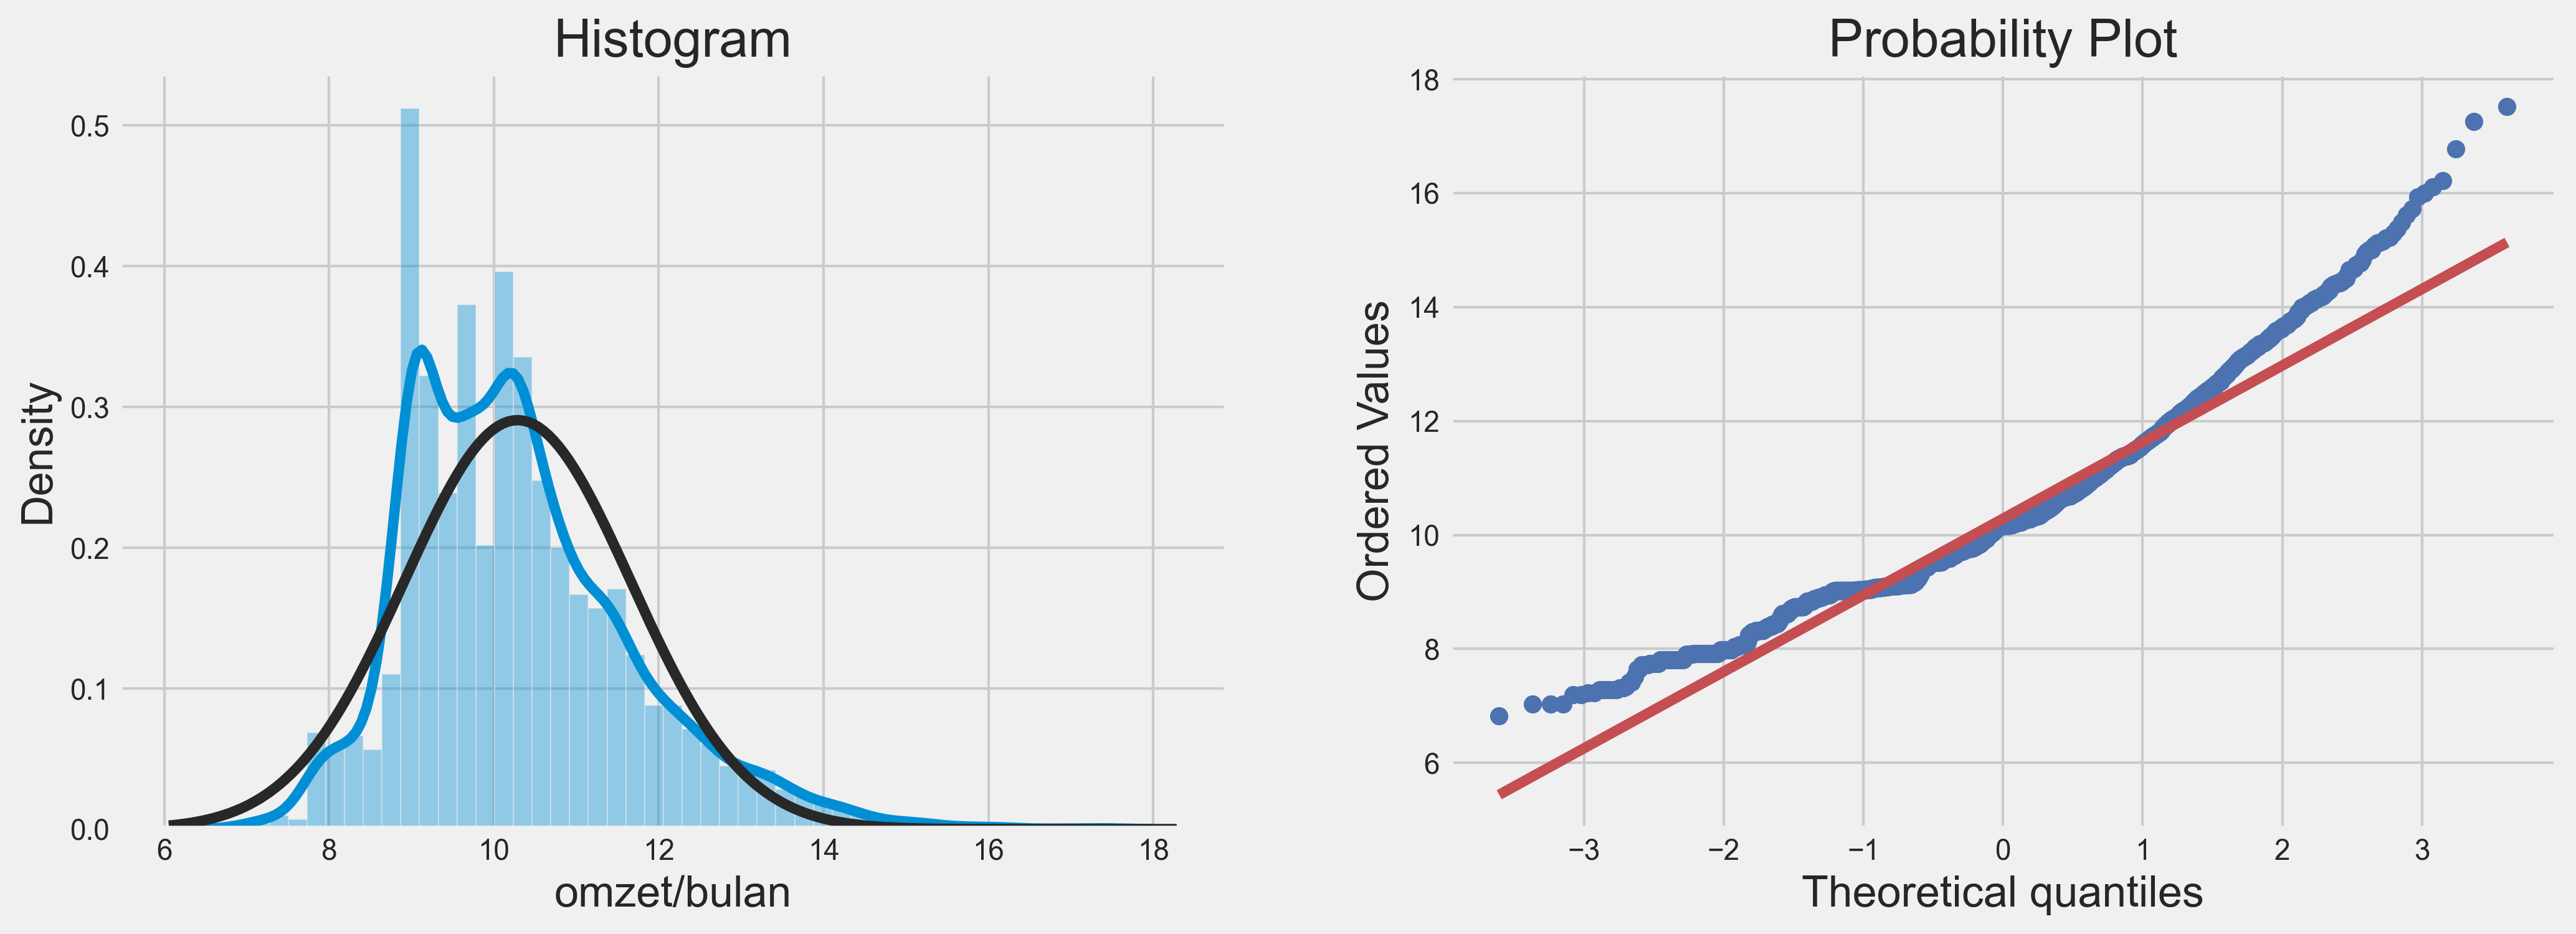

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['omzet/bulan'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['omzet/bulan'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['omzet/bulan'], plot=ax2)


df['omzet/bulan'] = np.log1p(df["omzet/bulan"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['omzet/bulan'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['omzet/bulan'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['omzet/bulan'], plot=ax2)

plt.show()

Skewness Co-efficient: 2.132
Skewness Co-efficient: 0.762559


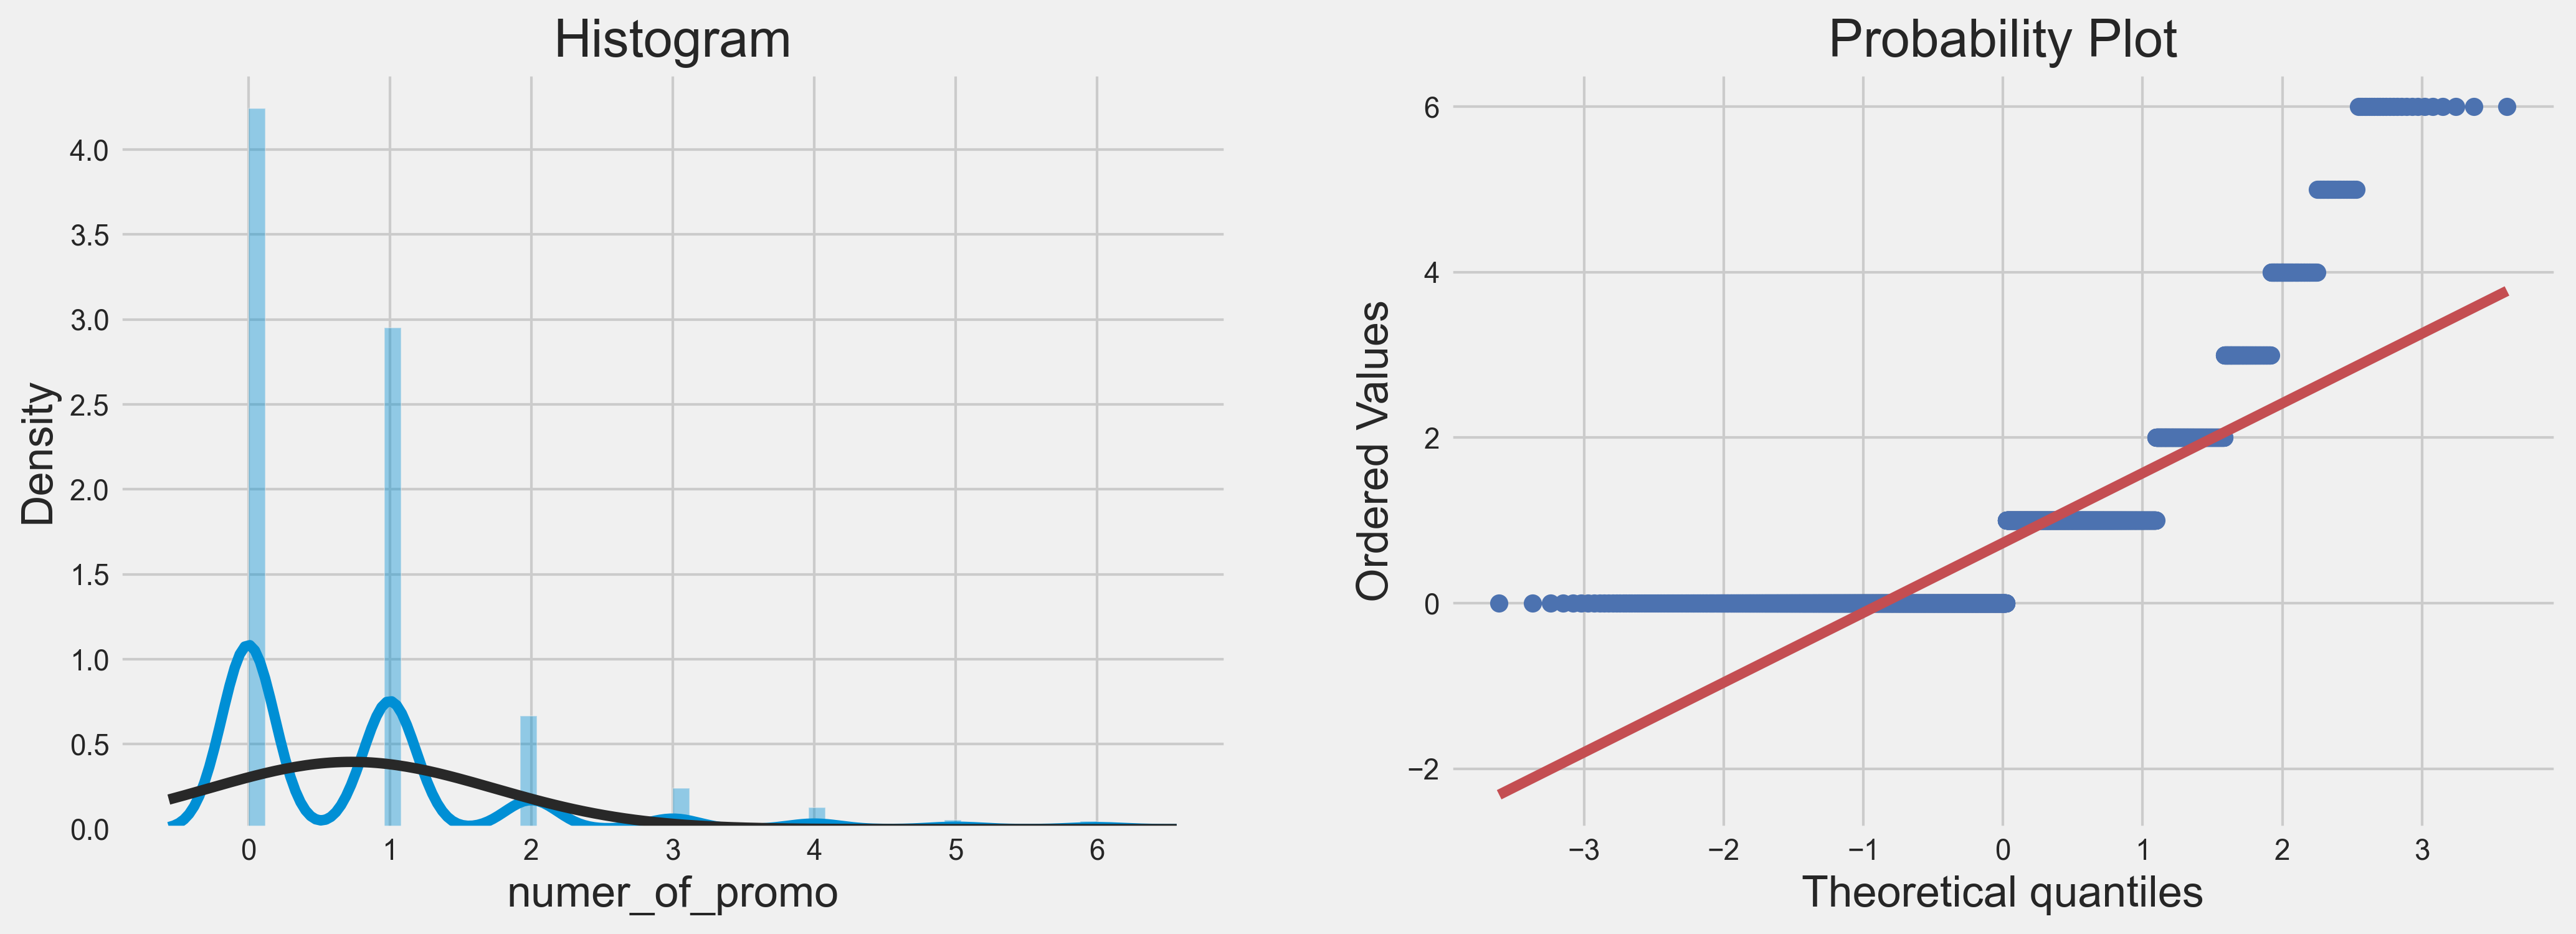

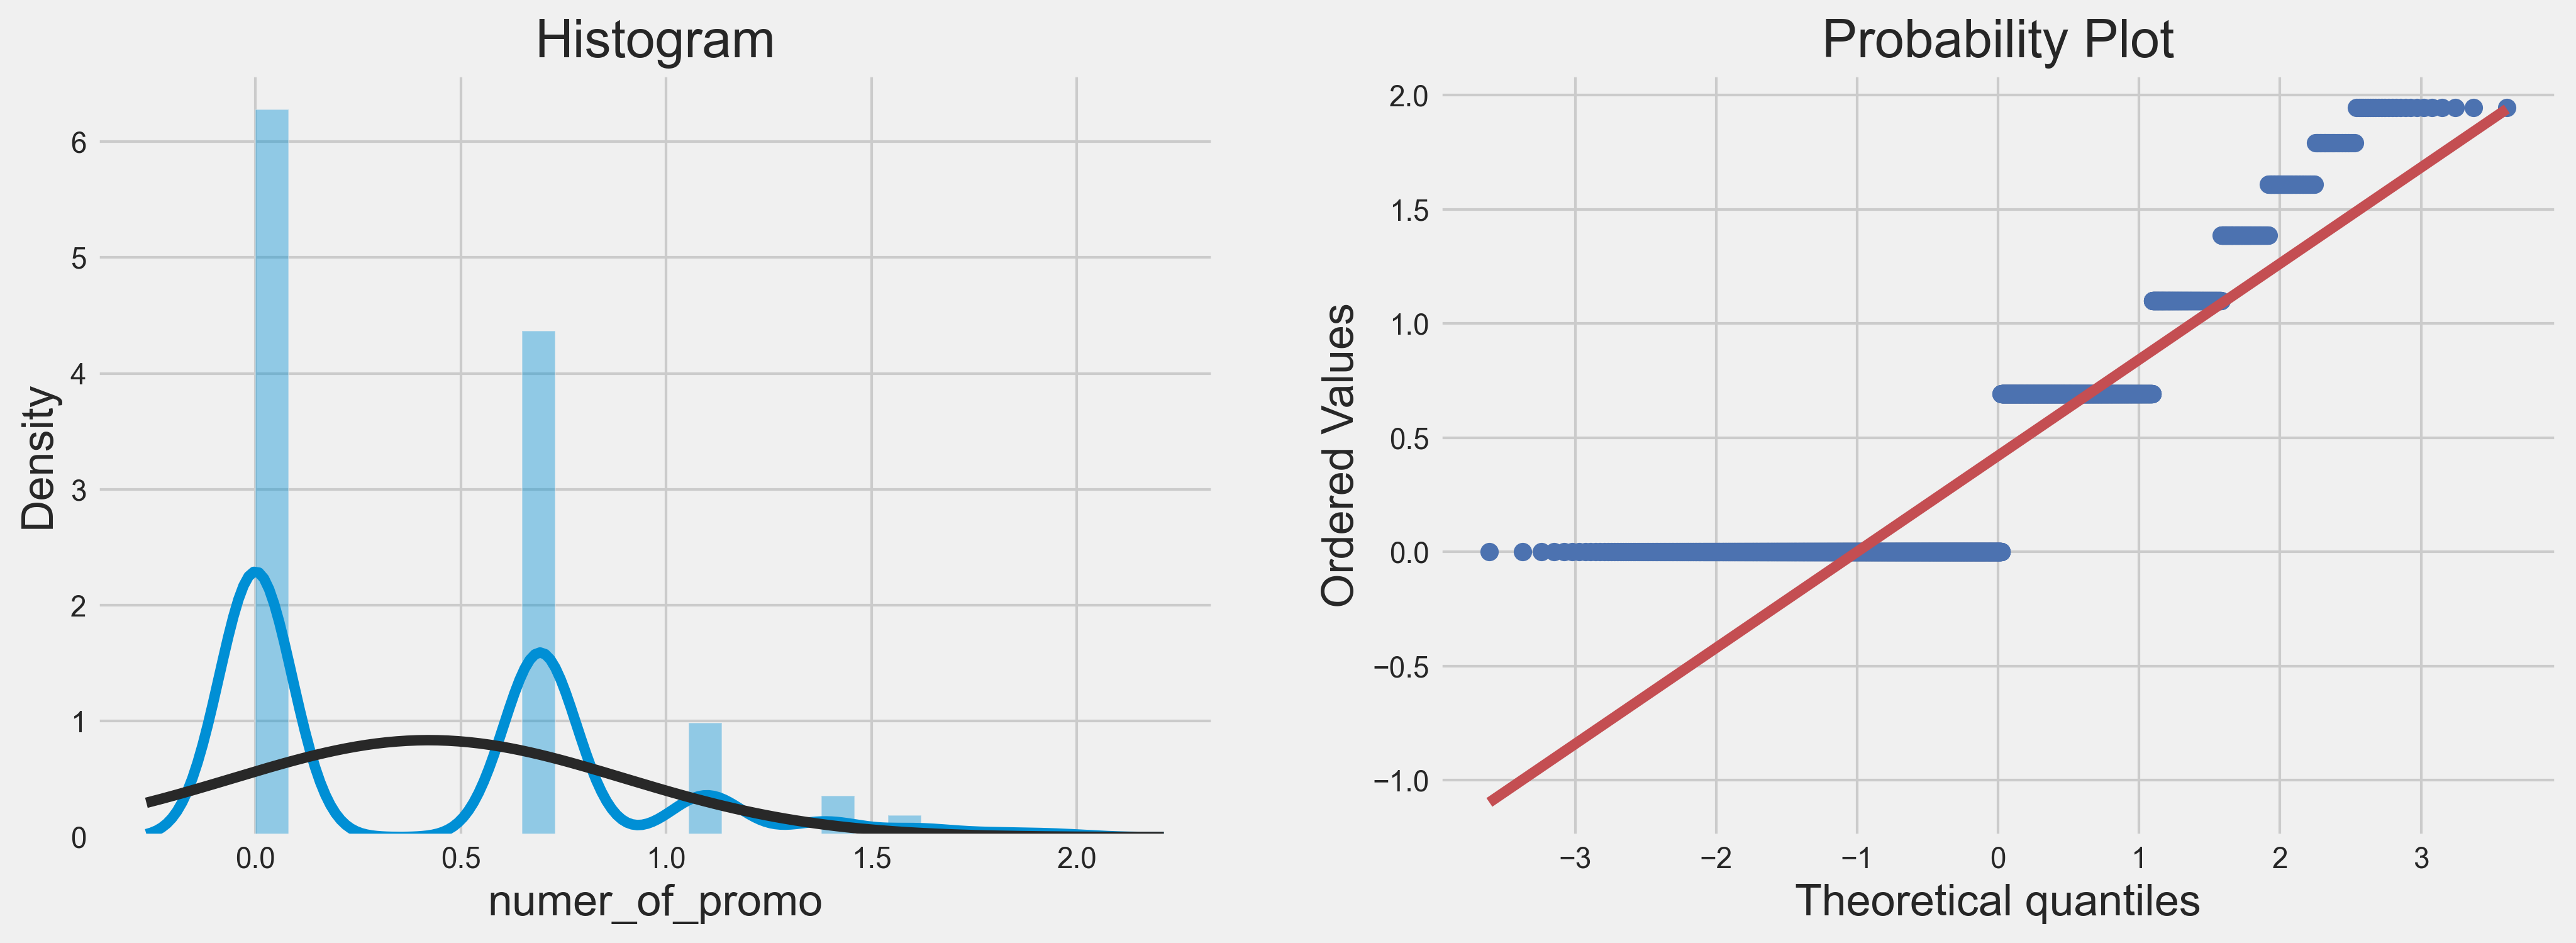

In [ ]:
# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['numer_of_promo'].skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['numer_of_promo'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['numer_of_promo'], plot=ax2)


df['numer_of_promo'] = np.log1p(df["numer_of_promo"])

# GET SKEWNESS
print(f"Skewness Co-efficient: {round(df['numer_of_promo'].skew(), 6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM
from scipy import stats
sns.distplot(df['numer_of_promo'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['numer_of_promo'], plot=ax2)

plt.show()

# Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['order'] = MinMaxScaler().fit_transform(df['order'].values.reshape(len(df), 1))
df['omzet'] = MinMaxScaler().fit_transform(df['omzet'].values.reshape(len(df), 1))
df['item'] = MinMaxScaler().fit_transform(df['item'].values.reshape(len(df), 1))
df['ongkir'] = MinMaxScaler().fit_transform(df['ongkir'].values.reshape(len(df), 1))
df['diskon'] = MinMaxScaler().fit_transform(df['diskon'].values.reshape(len(df), 1))
df['diskon(%)'] = MinMaxScaler().fit_transform(df['diskon(%)'].values.reshape(len(df), 1))
df['omzet/order'] = MinMaxScaler().fit_transform(df['omzet/order'].values.reshape(len(df), 1))
df['omzet/bulan'] = MinMaxScaler().fit_transform(df['omzet/bulan'].values.reshape(len(df), 1))
df['numer_of_promo'] = MinMaxScaler().fit_transform(df['numer_of_promo'].values.reshape(len(df), 1))
df['usia'] = MinMaxScaler().fit_transform(df['usia'].values.reshape(len(df), 1))
df['tenure'] = MinMaxScaler().fit_transform(df['tenure'].values.reshape(len(df), 1))

In [ ]:
df.describe()

order        omzet         item       ongkir       diskon  \
count  4505.000000  4505.000000  4505.000000  4505.000000  4505.000000   
mean      0.073145     0.324014     0.242284     0.622249     0.554543   
std       0.127353     0.128385     0.139839     0.095339     0.178236   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.216112     0.131162     0.574955     0.533823   
50%       0.000000     0.312583     0.224061     0.616356     0.586115   
75%       0.077550     0.394170     0.316233     0.666692     0.638035   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         diskon(%)  omzet/order  omzet/bulan        promo  numer_of_promo  \
count  4505.000000  4505.000000  4505.000000  4505.000000     4505.000000   
mean      0.386654     0.349191     0.323934     0.490788        0.216422   
std       0.130432     0.103636     0.128397     0.499971        0.245095   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.359259     0.272833     0.216022     0.000000        0.000000   
50%       0.415396     0.339987     0.312498     0.000000        0.000000   
75%       0.441143     0.412656     0.394094     1.000000        0.356207   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

              usia       tenure        churn           no  
count  4505.000000  4505.000000  4505.000000  4505.000000  
mean      0.503814     0.557078     0.918313  2253.000000  
std       0.299853     0.307216     0.273918  1300.625811  
min       0.000000     0.000000     0.000000     1.000000  
25%       0.240000     0.272727     1.000000  1127.000000  
50%       0.520000     0.636364     1.000000  2253.000000  
75%       0.760000     0.818182     1.000000  3379.000000  
max       1.000000     1.000000     1.000000  4505.000000

# Feature Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Penerima        4505 non-null   object 
 1   order           4505 non-null   float64
 2   omzet           4505 non-null   float64
 3   item            4505 non-null   float64
 4   ongkir          4505 non-null   float64
 5   diskon          4505 non-null   float64
 6   diskon(%)       4505 non-null   float64
 7   omzet/order     4505 non-null   float64
 8   omzet/bulan     4505 non-null   float64
 9   jenjang         4505 non-null   object 
 10  kota            4505 non-null   object 
 11  promo           4505 non-null   int64  
 12  numer_of_promo  4505 non-null   float64
 13  gender          4505 non-null   object 
 14  usia            4505 non-null   float64
 15  tenure          4505 non-null   float64
 16  pekerjaan       4505 non-null   object 
 17  pendidikan      4505 non-null   o

In [ ]:
df_new = pd.get_dummies(df, columns = ['jenjang','gender','pekerjaan','pendidikan','status'])
df_new.head()

Penerima     order     omzet      item    ongkir    diskon  \
0            Nia Insyirah   0.000000  0.219422  0.131162  0.530931  0.511486   
1       Ratih Yusi Pratiwi  0.000000  0.214840  0.131162  0.657510  0.546721   
2                        [  0.563159  0.792828  0.763814  0.785525  0.858585   
3                  99 Cell  0.000000  0.258675  0.178484  0.568044  0.534452   
4  A. Fidal Delima Dahyati  0.077550  0.289750  0.187594  0.651726  0.582341   

   diskon(%)  omzet/order  omzet/bulan                               kota  \
0   0.359259     0.280905     0.219328                    Kabupaten Bogor   
1   0.456138     0.275039     0.214750  Kabupaten Bolaang Mongondow Timur   
2   0.384287     0.582793     0.792801                   Kabupaten Natuna   
3   0.359259     0.331156     0.258584                  Kabupaten Cianjur   
4   0.433043     0.287977     0.289662              Kabupaten Tanah Datar   

   ...  pekerjaan_PNS  pekerjaan_ibu rumah tangga  pekerjaan_karyawan  \
0  ...              0                           1                   0   
1  ...              0                           1                   0   
2  ...              0                           0                   0   
3  ...              0                           0                   0   
4  ...              0                           1                   0   

   pekerjaan_wirausaha  pendidikan_d3  pendidikan_s1  pendidikan_sma  \
0                    0              0              0               1   
1                    0              0              0               1   
2                    1              0              1               0   
3                    1              0              0               1   
4                    0              0              0               0   

   pendidikan_smp  status_menikah  status_tidak menikah  
0               0               1                     0  
1               0               1                     0  
2               0               1                     0  
3               0               1                     0  
4               1               1                     0  

[5 rows x 32 columns]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Penerima                    4505 non-null   object 
 1   order                       4505 non-null   float64
 2   omzet                       4505 non-null   float64
 3   item                        4505 non-null   float64
 4   ongkir                      4505 non-null   float64
 5   diskon                      4505 non-null   float64
 6   diskon(%)                   4505 non-null   float64
 7   omzet/order                 4505 non-null   float64
 8   omzet/bulan                 4505 non-null   float64
 9   kota                        4505 non-null   object 
 10  promo                       4505 non-null   int64  
 11  numer_of_promo              4505 non-null   float64
 12  usia                        4505 non-null   float64
 13  tenure                      4505 

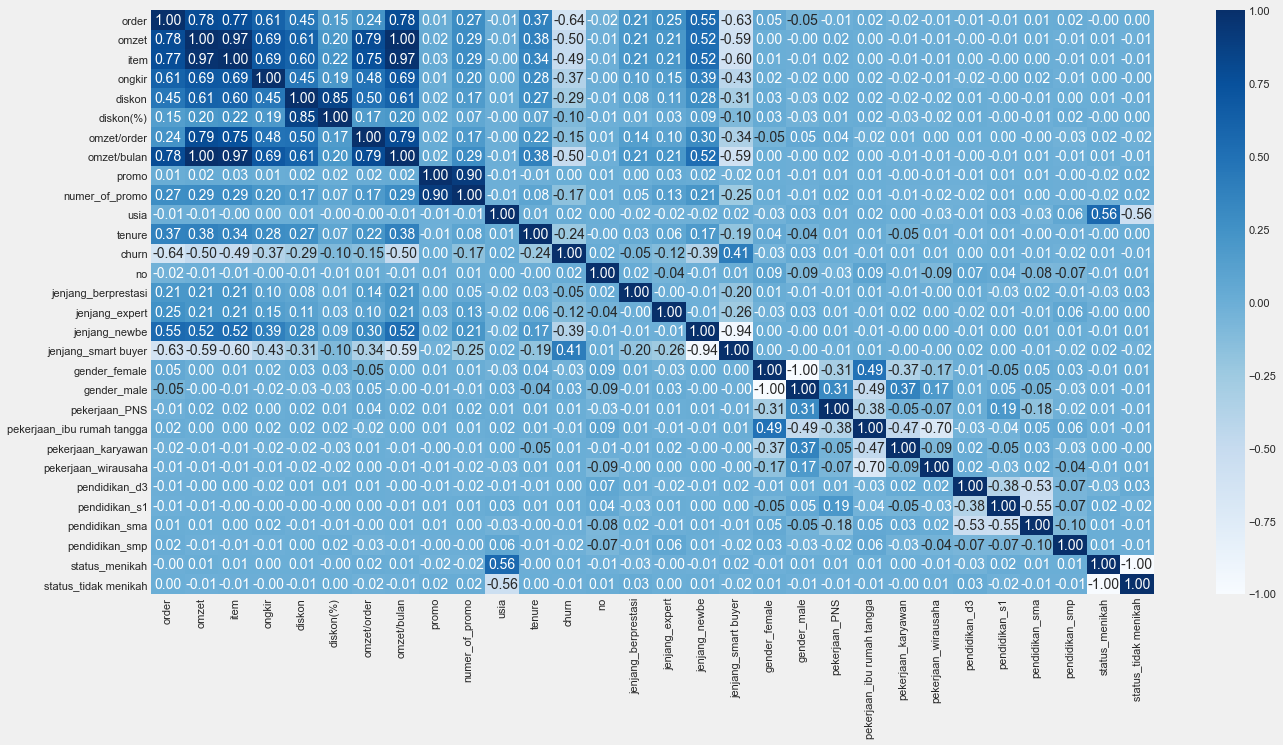

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.savefig('korelasi churn')

Berdasarkan data heatmap diatas, kita akan drop feature yang memiliki korelasi sangat tinggi dengan feature lain, yaitu :
1. order
2. item
3. ongkir
4. diskon
5. omzet/bulan
6. numer_of_promo
7. jenjang_expert
8. jenjang_newbe
9. gender_male
10. pekerjaan_PNS
11. pekerjaan_wirausaha
12. pendidikan_d3
13. pendidikan_s1
14. pendidikan_smp
15. status_tidak_menikah

# Class Imbalance

In [ ]:
no = []

for index, kolom in df.iterrows():
    no_urut = index+1
    no.append(no_urut)

df_new['no'] = no

df_new.head()

Penerima     order     omzet      item    ongkir    diskon  \
0            Nia Insyirah   0.000000  0.219422  0.131162  0.530931  0.511486   
1       Ratih Yusi Pratiwi  0.000000  0.214840  0.131162  0.657510  0.546721   
2                        [  0.563159  0.792828  0.763814  0.785525  0.858585   
3                  99 Cell  0.000000  0.258675  0.178484  0.568044  0.534452   
4  A. Fidal Delima Dahyati  0.077550  0.289750  0.187594  0.651726  0.582341   

   diskon(%)  omzet/order  omzet/bulan                               kota  \
0   0.359259     0.280905     0.219328                    Kabupaten Bogor   
1   0.456138     0.275039     0.214750  Kabupaten Bolaang Mongondow Timur   
2   0.384287     0.582793     0.792801                   Kabupaten Natuna   
3   0.359259     0.331156     0.258584                  Kabupaten Cianjur   
4   0.433043     0.287977     0.289662              Kabupaten Tanah Datar   

   ...  pekerjaan_PNS  pekerjaan_ibu rumah tangga  pekerjaan_karyawan  \
0  ...              0                           1                   0   
1  ...              0                           1                   0   
2  ...              0                           0                   0   
3  ...              0                           0                   0   
4  ...              0                           1                   0   

   pekerjaan_wirausaha  pendidikan_d3  pendidikan_s1  pendidikan_sma  \
0                    0              0              0               1   
1                    0              0              0               1   
2                    1              0              1               0   
3                    1              0              0               1   
4                    0              0              0               0   

   pendidikan_smp  status_menikah  status_tidak menikah  
0               0               1                     0  
1               0               1                     0  
2               0               1                     0  
3               0               1                     0  
4               1               1                     0  

[5 rows x 32 columns]

In [ ]:
data_target = df_new.groupby(['churn'])['no'].count().reset_index()
data_target['total'] = data_target['no'].sum()
data_target.columns = ['churn','jumlah','total']
data_target['percentage'] = data_target['jumlah']/data_target['total']*100
data_target

churn  jumlah  total  percentage
0      0     368   4505    8.168701
1      1    4137   4505   91.831299

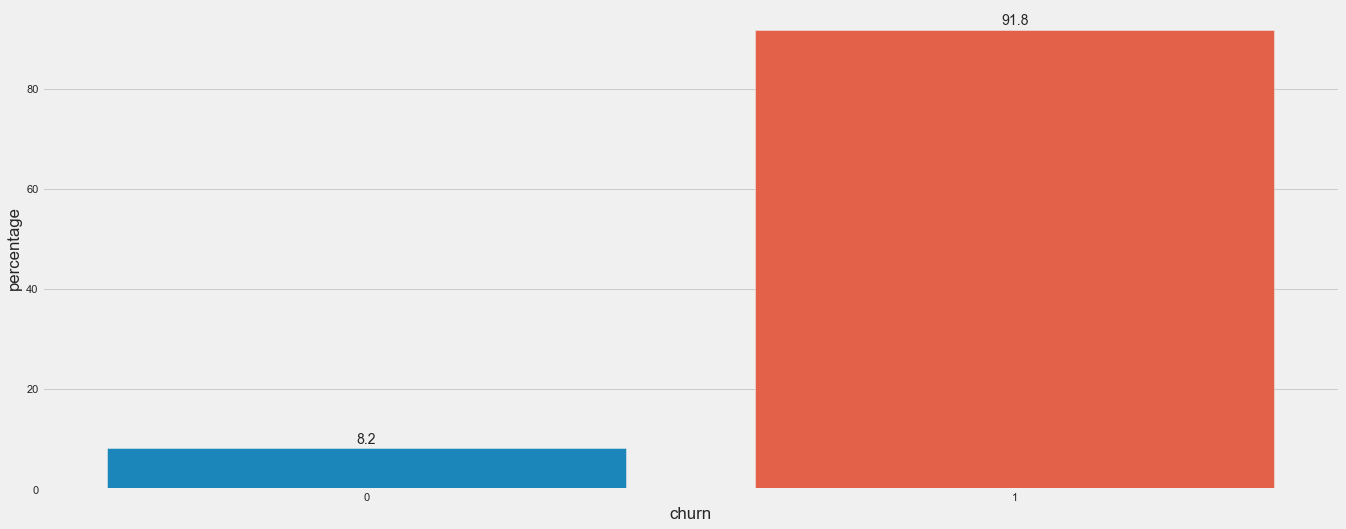

In [ ]:
splot = sns.barplot(x='churn',y='percentage',data=data_target)
for i in splot.patches:
    splot.annotate(format(i.get_height(), '.1f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

dari grafik target diatas, dapat disimpulkan data target sangat normal.

dimana persentase antara target tidak terlalu jauh, yaitu :
- disastified customer  : 53.2%
- satisfied customer : 46.8%

In [ ]:
from imblearn import under_sampling, over_sampling

X = df_new.drop(['churn'],axis=1)
y = df_new['churn']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)


In [ ]:
print(pd.Series(y).value_counts())

1    4137
0     368
Name: churn, dtype: int64


In [ ]:
print(pd.Series(y_under).value_counts())

0    368
1    368
Name: churn, dtype: int64


In [ ]:
print(pd.Series(y_over).value_counts())

0    4137
1    4137
Name: churn, dtype: int64


In [ ]:
y_over = y_over.to_frame()
y_over.head(2)

churn
0      1
1      1

In [ ]:
df_over = pd.concat([X_over, y_over], axis=1)
df_over

Penerima     order     omzet      item    ongkir  \
0               Nia Insyirah   0.000000  0.219422  0.131162  0.530931   
1          Ratih Yusi Pratiwi  0.000000  0.214840  0.131162  0.657510   
2                           [  0.563159  0.792828  0.763814  0.785525   
3                     99 Cell  0.000000  0.258675  0.178484  0.568044   
4     A. Fidal Delima Dahyati  0.077550  0.289750  0.187594  0.651726   
...                       ...       ...       ...       ...       ...   
8269              Eti Juhaeti  0.265145  0.587533  0.538933  0.744755   
8270        Dewi Ratnaningsih  0.458626  0.526146  0.465137  0.753503   
8271        Amelia Putri Ersa  0.326053  0.493822  0.400852  0.778818   
8272           Deasy / Faisal  0.640709  0.639428  0.558326  0.806375   
8273           Wiwit Maharani  0.287673  0.461442  0.388804  0.713086   

        diskon  diskon(%)  omzet/order  omzet/bulan  \
0     0.511486   0.359259     0.280905     0.219328   
1     0.546721   0.456138     0.275039     0.214750   
2     0.858585   0.384287     0.582793     0.792801   
3     0.534452   0.359259     0.331156     0.258584   
4     0.582341   0.433043     0.287977     0.289662   
...        ...        ...          ...          ...   
8269  0.759074   0.441143     0.519258     0.587481   
8270  0.701054   0.384287     0.309178     0.526086   
8271  0.691075   0.405727     0.356599     0.493758   
8272  0.802447   0.476144     0.336807     0.639382   
8273  0.656940   0.372295     0.341854     0.461375   

                                   kota  ...  pekerjaan_ibu rumah tangga  \
0                       Kabupaten Bogor  ...                           1   
1     Kabupaten Bolaang Mongondow Timur  ...                           1   
2                      Kabupaten Natuna  ...                           0   
3                     Kabupaten Cianjur  ...                           0   
4                 Kabupaten Tanah Datar  ...                           1   
...                                 ...  ...                         ...   
8269                   Kabupaten Bekasi  ...                           1   
8270                  Kabupaten Bandung  ...                           1   
8271                 Kabupaten Kuningan  ...                           1   
8272                    Kabupaten Bogor  ...                           0   
8273                 Kabupaten Banyumas  ...                           0   

      pekerjaan_karyawan  pekerjaan_wirausaha  pendidikan_d3  pendidikan_s1  \
0                      0                    0              0              0   
1                      0                    0              0              0   
2                      0                    1              0              1   
3                      0                    1              0              0   
4                      0                    0              0              0   
...                  ...                  ...            ...            ...   
8269                   0                    0              1              0   
8270                   0                    0              0              1   
8271                   0                    0              0              1   
8272                   0                    1              0              1   
8273                   1                    0              0              0   

      pendidikan_sma  pendidikan_smp  status_menikah  status_tidak menikah  \
0                  1               0               1                     0   
1                  1               0               1                     0   
2                  0               0               1                     0   
3                  1               0               1                     0   
4                  0               1               1                     0   
...              ...             ...             ...                   ...   
8269               0               0               1                     0 

In [ ]:
df_over.duplicated().sum()

3769

In [ ]:
df_over = df_over.drop_duplicates()
df_over.shape

(4505, 32)

In [ ]:
df_over.duplicated().sum()

0

# Feature Selection

In [ ]:
df_model = df_over.drop(['jenjang_berprestasi','omzet','item','ongkir','diskon','diskon(%)','omzet/bulan','promo','pekerjaan_karyawan','Penerima','kota','jenjang_expert','jenjang_newbe','gender_male','pekerjaan_PNS','pekerjaan_wirausaha','pendidikan_d3','pendidikan_smp','pendidikan_s1','status_tidak menikah','no'], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4505 entries, 0 to 4504
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order                       4505 non-null   float64
 1   omzet/order                 4505 non-null   float64
 2   numer_of_promo              4505 non-null   float64
 3   usia                        4505 non-null   float64
 4   tenure                      4505 non-null   float64
 5   jenjang_smart buyer         4505 non-null   uint8  
 6   gender_female               4505 non-null   uint8  
 7   pekerjaan_ibu rumah tangga  4505 non-null   uint8  
 8   pendidikan_sma              4505 non-null   uint8  
 9   status_menikah              4505 non-null   uint8  
 10  churn                       4505 non-null   int64  
dtypes: float64(5), int64(1), uint8(5)
memory usage: 268.4 KB


# Modelling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
X = df_model.drop(columns=['churn']) # menggunakan semua feature kecuali target
y = df_model['churn']

In [ ]:
# membagi dataframe menjadi data train dan data test ( dengan perbandingan 7 : 3 )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 2258 to 2927
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order                       1352 non-null   float64
 1   omzet/order                 1352 non-null   float64
 2   numer_of_promo              1352 non-null   float64
 3   usia                        1352 non-null   float64
 4   tenure                      1352 non-null   float64
 5   jenjang_smart buyer         1352 non-null   uint8  
 6   gender_female               1352 non-null   uint8  
 7   pekerjaan_ibu rumah tangga  1352 non-null   uint8  
 8   pendidikan_sma              1352 non-null   uint8  
 9   status_menikah              1352 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 70.0 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153 entries, 3899 to 860
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order                       3153 non-null   float64
 1   omzet/order                 3153 non-null   float64
 2   numer_of_promo              3153 non-null   float64
 3   usia                        3153 non-null   float64
 4   tenure                      3153 non-null   float64
 5   jenjang_smart buyer         3153 non-null   uint8  
 6   gender_female               3153 non-null   uint8  
 7   pekerjaan_ibu rumah tangga  3153 non-null   uint8  
 8   pendidikan_sma              3153 non-null   uint8  
 9   status_menikah              3153 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 163.2 KB


## Random Forest

In [ ]:
# random forest process to classification data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.81


In [ ]:
print("Precision (Train Set): %.2f" % precision_score(y_pred, y_test))

Precision (Train Set): 0.96


In [ ]:
print("train Accuracy : ",rf.score(X_train,y_train))
print("test Accuracy : ",rf.score(X_test,y_test))

train Accuracy :  1.0
test Accuracy :  0.9356508875739645


In [ ]:
#confusion matrix before tuning
from sklearn.metrics import confusion_matrix # import package dari sklearn
confusion_matrix(y_test, y_pred) # lihat hasil confusion matrix-nya

array([[  70,   37],
       [  50, 1195]], dtype=int64)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 50)], # Jumlah subtree
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.98
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.88


In [ ]:
y_pred_train = rf_tuned.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.99


In [ ]:
print("train Accuracy : ",rf_tuned.score(X_train,y_train))
print("test Accuracy : ",rf_tuned.score(X_test,y_test))

train Accuracy :  0.9935965848452508
test Accuracy :  0.9826446280991735


In [ ]:
#confusion matrix after tuning
from sklearn.metrics import confusion_matrix # import package dari sklearn
confusion_matrix(y_test, y_pred) # lihat hasil confusion matrix-nya

array([[  86,   21],
       [  56, 1189]], dtype=int64)

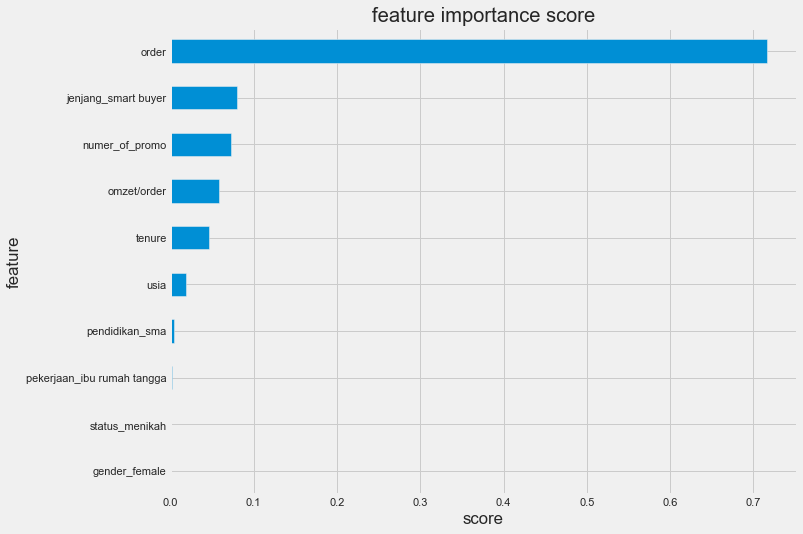

In [ ]:
#feature importance after tuning
show_feature_importance(rf_tuned.best_estimator_)
plt.savefig("feature importance random forest")

## Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [ ]:
# Split Feature and Label
X = df_model.drop(columns=['churn']) # menggunakan semua feature kecuali target
y = df_model['churn']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 2258 to 2927
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order                       1352 non-null   float64
 1   omzet/order                 1352 non-null   float64
 2   numer_of_promo              1352 non-null   float64
 3   usia                        1352 non-null   float64
 4   tenure                      1352 non-null   float64
 5   jenjang_smart buyer         1352 non-null   uint8  
 6   gender_female               1352 non-null   uint8  
 7   pekerjaan_ibu rumah tangga  1352 non-null   uint8  
 8   pendidikan_sma              1352 non-null   uint8  
 9   status_menikah              1352 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 70.0 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153 entries, 3899 to 860
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order                       3153 non-null   float64
 1   omzet/order                 3153 non-null   float64
 2   numer_of_promo              3153 non-null   float64
 3   usia                        3153 non-null   float64
 4   tenure                      3153 non-null   float64
 5   jenjang_smart buyer         3153 non-null   uint8  
 6   gender_female               3153 non-null   uint8  
 7   pekerjaan_ibu rumah tangga  3153 non-null   uint8  
 8   pendidikan_sma              3153 non-null   uint8  
 9   status_menikah              3153 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 163.2 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Precission Result

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluation

In [ ]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.98
F1-Score (Test Set): 0.96
AUC: 0.64


In [ ]:
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.94


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9270535997462734
Test score:0.9275147928994083


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.92
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
AUC: 0.50


In [ ]:
y_pred_train = model.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.92


In [ ]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.0001


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.917221693625119
Test score:0.9208579881656804


In [ ]:
#melihat korelasi

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.163219
         Iterations 8
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.423      
Dependent Variable:     churn                AIC:                  1490.6021  
Date:                   2021-06-29 18:34     BIC:                  1554.7315  
No. Observations:       4505                 Log-Likelihood:       -735.30    
Df Model:               9                    LL-Null:              -1274.3    
Df Residuals:           4495                 LLR p-value:          2.5117e-226
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         8.0000                                                
------------------------------------------------------------------------------
                            Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------

# Boosting Adaboost

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [ ]:
# Split Feature and Label
X = df_model.drop(columns=['churn']) # menggunakan semua feature kecuali target
y = df_model['churn']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 2258 to 2927
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order                       1352 non-null   float64
 1   omzet/order                 1352 non-null   float64
 2   numer_of_promo              1352 non-null   float64
 3   usia                        1352 non-null   float64
 4   tenure                      1352 non-null   float64
 5   jenjang_smart buyer         1352 non-null   uint8  
 6   gender_female               1352 non-null   uint8  
 7   pekerjaan_ibu rumah tangga  1352 non-null   uint8  
 8   pendidikan_sma              1352 non-null   uint8  
 9   status_menikah              1352 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 70.0 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153 entries, 3899 to 860
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order                       3153 non-null   float64
 1   omzet/order                 3153 non-null   float64
 2   numer_of_promo              3153 non-null   float64
 3   usia                        3153 non-null   float64
 4   tenure                      3153 non-null   float64
 5   jenjang_smart buyer         3153 non-null   uint8  
 6   gender_female               3153 non-null   uint8  
 7   pekerjaan_ibu rumah tangga  3153 non-null   uint8  
 8   pendidikan_sma              3153 non-null   uint8  
 9   status_menikah              3153 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 163.2 KB


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.98
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.86


In [ ]:
print('Train score: ' + str(ab.score(X_train, y_train))) #accuracy
print('Test score:' + str(ab.score(X_test, y_test))) #accuracy

Train score: 0.9575007928956549
Test score:0.9430473372781065


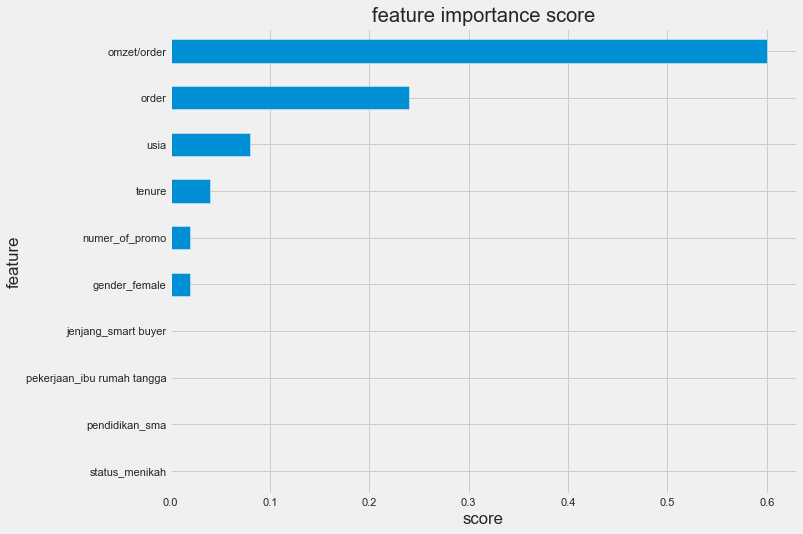

In [ ]:
show_feature_importance(ab)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
                       algorithm = ['SAMME', 'SAMME.R']
                      )
# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='precision')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 1.00
Recall (Test Set): 0.94
F1-Score (Test Set): 0.97
AUC: 0.97


In [ ]:
print('Train score: ' + str(ab_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(ab_tuned.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:1.0


In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best learning_rate: 0.01663157894736842
Best algorithm: SAMME


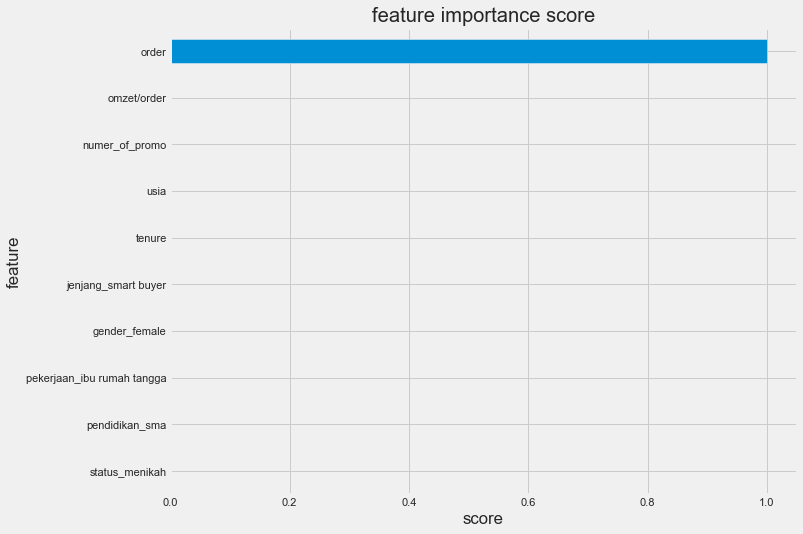

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

## XGBoost

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [ ]:
# Split Feature and Label
X = df_model.drop(columns=['churn']) # menggunakan semua feature kecuali target
y = df_model['churn']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

[18:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.94
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
AUC: 0.80


In [ ]:
confusion_matrix(y_test, y_pred)

array([[  68,   39],
       [  41, 1204]], dtype=int64)

In [ ]:
print('Train score: ' + str(xg.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.9408284023668639


In [ ]:
y_pred_train = xg.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 1.00


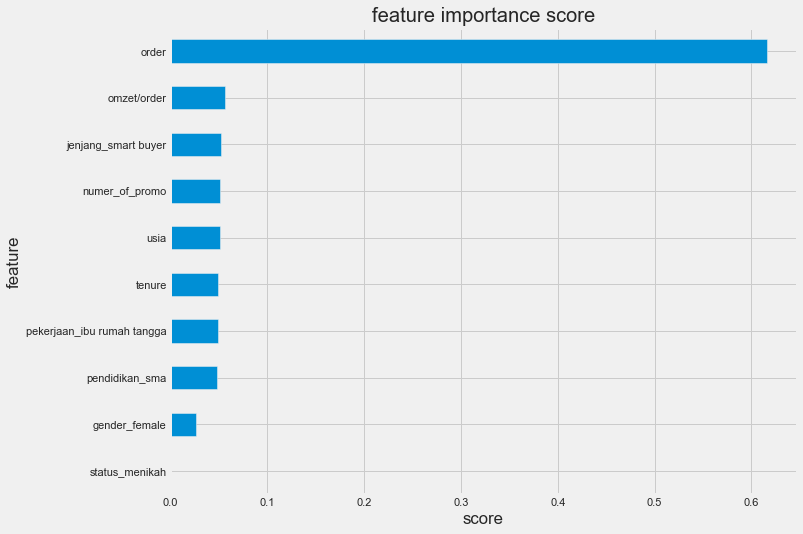

In [ ]:
show_feature_importance(xg)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='precision')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

[18:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
confusion_matrix(y_test, y_pred)

array([[  66,   41],
       [  50, 1195]], dtype=int64)

In [ ]:
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.79


In [ ]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg_tuned.score(X_test, y_test))) #accuracy

Train score: 0.9839441535776614
Test score:0.9668284789644013


In [ ]:
y_pred_train = xg_tuned.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.98


In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 80
Best min_child_weight: 16
Best gamma: 0.30000000000000004
Best tree_method: approx
Best colsample_bytree: 0.4
Best eta: 0.4040404040404041
Best lambda: 0.6000000000000001
Best alpha: 1.0


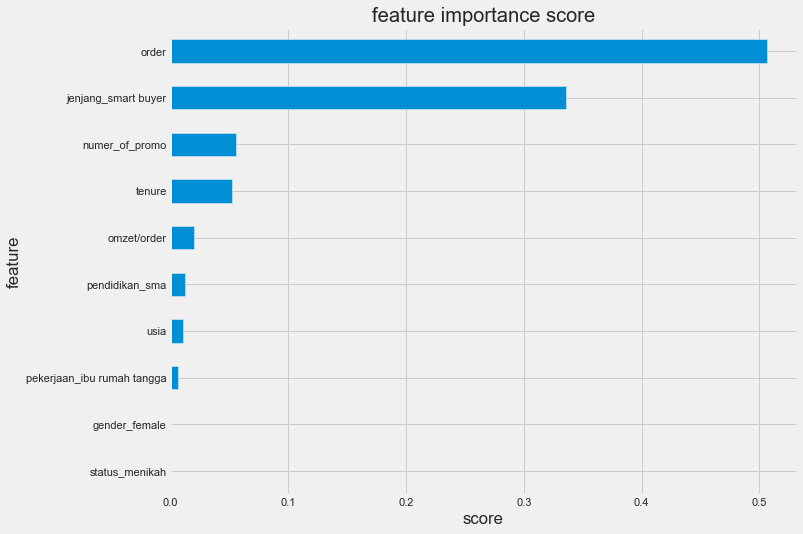

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

# Decission Tree

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [ ]:
# Split Feature and Label
X = df_model.drop(columns=['churn']) # menggunakan semua feature kecuali target
y = df_model['churn']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.96
Recall (Test Set): 0.97
F1-Score (Test Set): 0.96
AUC: 0.75


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.9326923076923077


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.78


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 50
Best max_features: auto


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.9656726768377254
Test score:0.9654340836012861


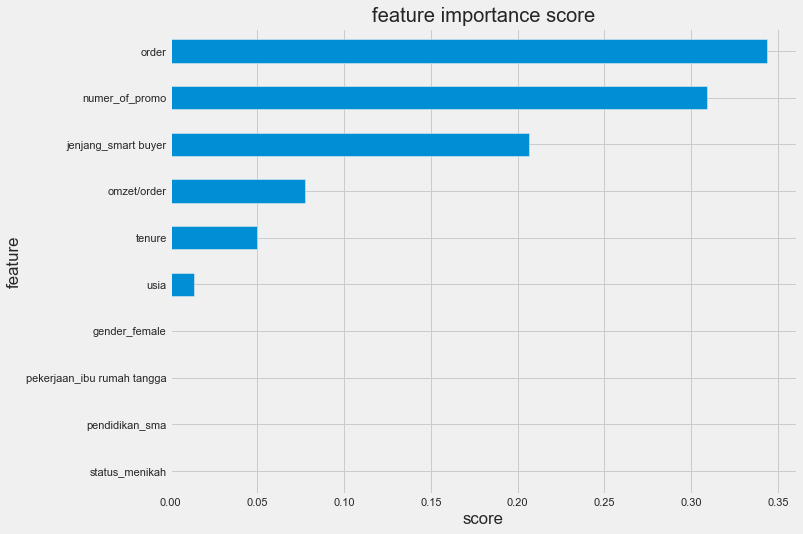

In [ ]:
show_feature_importance(model.best_estimator_)

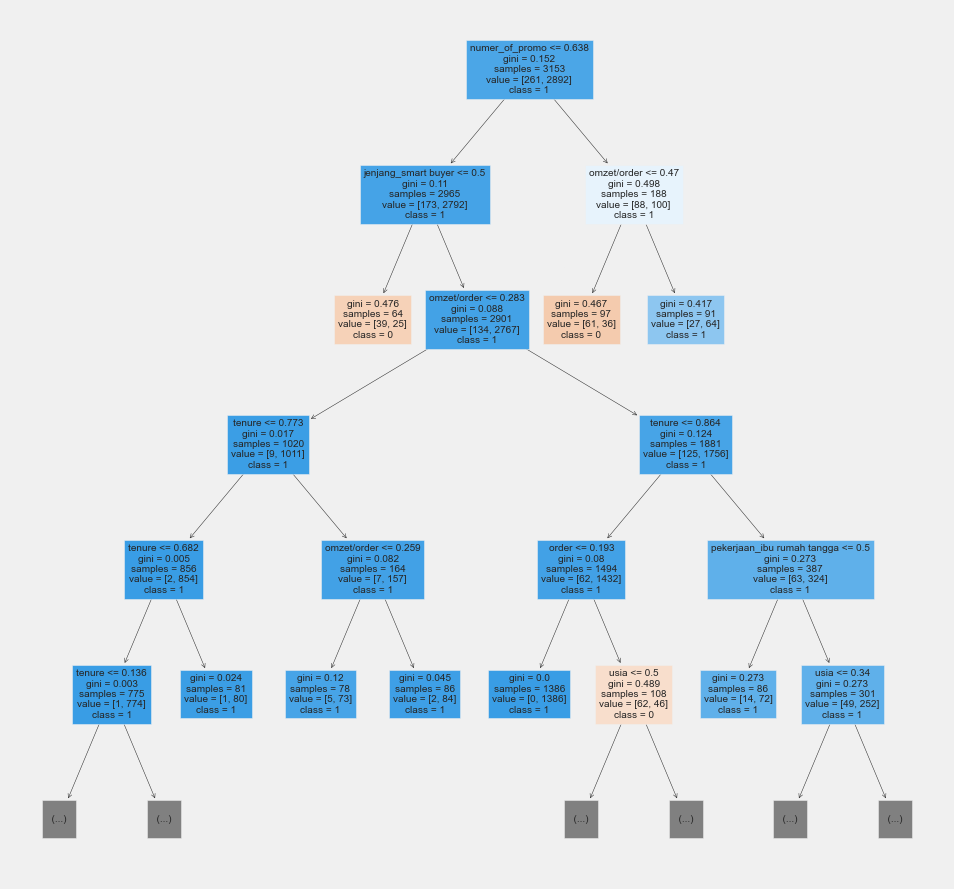

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(),
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

# Business Recomendation

Program untuk customer
- Meningkatkan jumlah order setiap customer dengan promo
- Mendorong smart buyer untuk order dengan memperbanyak promo yang ditawarkan
- Memberikan gratis ongkir kepada customer
- Memperbanyak konten untuk ibu rumah tangga yang merupakan customer terbanyak
- Konten perempuan dengan usia 25-35 tahun
- Membuat program loyalitas customer untuk menambah lama gabung
- Tetap berkomunikasi dengan customer yang tidak melakukan pembelian

Target Market Audience
- Menargetkan audience dengan pendidikan minimal sma
- Menargetkan audience dengan usia 25-35 tahun
- Menargetkan audience (customer akhir) di JABODETABEK
- Menargetkan Ibu rumah tangga produktif